# **Capstone Project Module 2 - Data Analysis**

## **AWS SaaS Sales: Discount Impact and Profitability Analysis – Regional and Country Insights**

## `Business Understanding`

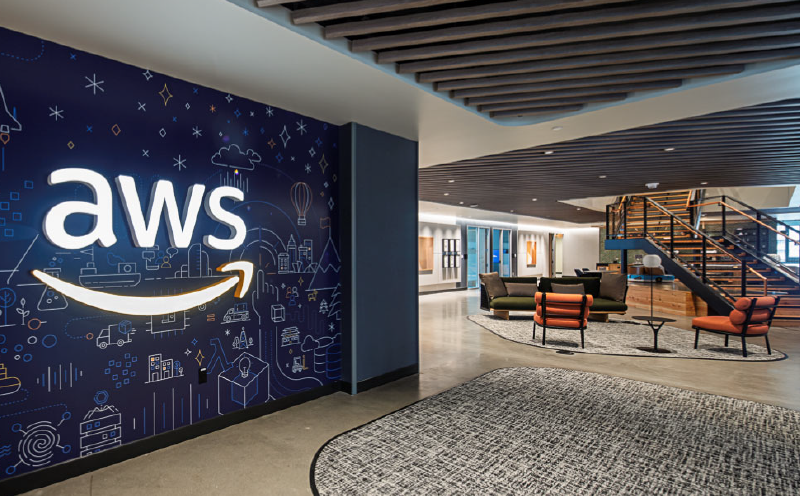

### **Background Context**
Perusahaan fiktif AWS SaaS Sales ingin memastikan program diskon yang dijalankan benar-benar memberikan dampak positif terhadap profit. Selama ini, pemberian diskon dilakukan secara umum tanpa segmentasi yang mendalam, dan dicurigai banyak persebaran diskon yang tidak merata justru membuat profit menurun.

Analisis data penjualan yang memuat informasi diskon, profit, wilayah (region, sub-region, country, city), produk, serta segmen pelanggan menjadi kunci untuk mengukur efektivitas strategi diskon. Tujuan analisis ini adalah mengidentifikasi wilayah, produk, dan segmen pelanggan yang paling berdampak terhadap profit negatif, serta merumuskan strategi rekomendasi untuk menekan dampak diskon, menghentikan penjualan merugi, dan mengembalikan profit ke arah positif.

### **Stakeholder**
- *`Sales & Marketing`*
  - Mengoptimalkan strategi diskon agar tepat sasaran pada region, produk, dan segmen pelanggan yang paling potensial.
  - Meningkatkan profitabilitas dengan menekan dampak negatif dari diskon yang tidak merata.
  - Menyusun rekomendasi kebijakan harga dan promosi yang lebih terukur, berdasarkan hasil analisis data penjualan dan profit.

### **Problem Statement**

1. Apakah penerapan diskon yang tinggi secara signifikan meningkatkan profit atau bahkan menyebabkan kerugian?

2. Wilayah Kontributor (Region, Subregion, atau Country) mana yang menyumbang profit negatif akibat diskon besar, sehingga menjadi titik paling kritis bagi profit perusahaan?

3. Pada country paling bermasalah, produk dan segmen pelanggan mana yang transaksinya menghasilkan profit negatif, serta bagaimana proporsi profit penjualan pada masing-masing produk dan segment?

4. Langkah strategis apa yang perlu diambil untuk menekan dampak diskon, menghentikan penjualan merugi, dan mengembalikan profit ke arah positif?

### **Goals**

Tujuan dari analisis ini adalah untuk:

1. Mengukur hubungan antara besaran diskon dan profit untuk memastikan sejauh mana diskon tinggi menurunkan profit dan memicu kerugian.

2. Menentukan region, subregion, dan country dengan kontribusi terbesar terhadap profit negatif akibat diskon, sebagai dasar penentuan area prioritas perbaikan.

3. Mengungkap produk dan segmen pelanggan di country bermasalah yang mayoritas transaksinya rugi, termasuk menghitung proporsi penjualan yang negatif per produk/segment.

4. Memberikan rekomendasi strategi diskon berbasis data untuk meningkatkan profitabilitas.

### **Analytical Approach**

1. **Diskon vs Profit**  
   Melakukan data cleaning dan pengecekan outlier untuk memastikan kualitas data. Selanjutnya hubungan diskon dan profit dianalisis melalui visualisasi scatter plot, boxplot, serta heatmap. Korelasi Spearman digunakan untuk mengukur kekuatan dan arah hubungan diskon terhadap profit secara statistik.

2. **Identifikasi Wilayah Kritis**  
   Data dikelompokkan dan diagregasi berdasarkan region, subregion, dan country untuk menghitung total profit dan profit margin. Perbandingan dilakukan melalui bar chart dan scatter plot.

3. **Produk & Segmen Rugi**  
   Pada country yang paling bermasalah, dilakukan filter data dan pengelompokan berdasarkan produk dan segmen pelanggan untuk menghitung total profit serta proporsi transaksi negatif. Hasilnya divisualisasikan dengan bar chart dan pie chart untuk menyoroti produk dan segmen dengan kontribusi rugi terbesar.

4. **Rekomendasi Strategi**  
   Temuan dari analisis diskon–profit, identifikasi wilayah kritis, dan produk/segmen rugi disintesis untuk merumuskan langkah strategis berbasis data. Rekomendasi difokuskan pada pengendalian kebijakan diskon, evaluasi produk yang merugi, dan optimasi margin profit perusahaan.


-----

## `Data Understanding`

### **Import Modul**

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns', None)

### **Read Dataset**

In [31]:
# Import dan Membaca Data SaaS Sales dengan Pandas
df = pd.read_csv('SaaS-Sales.csv',parse_dates=['Order Date']) #parse_dates mengubah tipe data menjadi datetime
df

Row ID          Order ID Order Date  Date Key       Contact Name  \
0          1  EMEA-2022-152156 2022-11-09  20221109        Nathan Bell   
1          2  EMEA-2022-152156 2022-11-09  20221109        Nathan Bell   
2          3  AMER-2022-138688 2022-06-13  20220613     Deirdre Bailey   
3          4  EMEA-2021-108966 2021-10-11  20211011         Zoe Hodges   
4          5  EMEA-2021-108966 2021-10-11  20211011         Zoe Hodges   
...      ...               ...        ...       ...                ...   
9989    9990  EMEA-2020-110422 2020-01-22  20200122          Dan Allan   
9990    9991  AMER-2023-121258 2023-02-27  20230227  Anthony Sanderson   
9991    9992  AMER-2023-121258 2023-02-27  20230227  Anthony Sanderson   
9992    9993  AMER-2023-121258 2023-02-27  20230227  Anthony Sanderson   
9993    9994  AMER-2023-119914 2023-05-05  20230505   Jasmine Springer   

            Country           City Region Subregion           Customer  \
0           Ireland         Dublin   EMEA      UKIR            Chevron   
1           Ireland         Dublin   EMEA      UKIR            Chevron   
2     United States  New York City   AMER     NAMER        Phillips 66   
3           Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   
4           Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   
...             ...            ...    ...       ...                ...   
9989        Germany        Hamburg   EMEA   EU-WEST  Johnson & Johnson   
9990  United States      Milwaukee   AMER     NAMER   American Express   
9991  United States      Milwaukee   AMER     NAMER   American Express   
9992  United States      Milwaukee   AMER     NAMER   American Express   
9993  United States         Dallas   AMER     NAMER            Comcast   

      Customer ID        Industry    Segment                 Product  \
0            1017          Energy        SMB         Marketing Suite   
1            1017          Energy        SMB              FinanceHub   
2            1056          Energy  Strategic              FinanceHub   
3            1031          Energy        SMB          ContactMatcher   
4            1031          Energy        SMB  Marketing Suite - Gold   
...           ...             ...        ...                     ...   
9989         1055      Healthcare        SMB     SaaS Connector Pack   
9990         1005         Finance        SMB     SaaS Connector Pack   
9991         1005         Finance        SMB          Site Analytics   
9992         1005         Finance        SMB                 Support   
9993         1022  Communications        SMB                 OneView   

         License     Sales  Quantity  Discount    Profit  
0     16GRM07R1K  261.9600         2      0.00   41.9136  
1     QLIW57KZUV  731.9400         3      0.00  219.5820  
2     JI6BVL70HQ   14.6200         2      0.00    6.8714  
3     DE9GJKGD44  957.5775         5      0.45 -383.0310  
4     OIF7NY23WD   22.3680         2      0.20    2.5164  
...          ...       ...       ...       ...       ...  
9989  ETHXMB5TMD   25.2480         3      0.20    4.1028  
9990  LYHOKTRY7L   91.9600         2      0.00   15.6332  
9991  I5SVMI6M88  258.5760         2      0.20   19.3932  
9992  JHLW4P6LQ2   29.6000         4      0.00   13.3200  
9993  3NTBV9B3PS  243.1600         2      0.00   72.9480  

[9994 rows x 19 columns]

**Dataset AWS Saas Sales Kolom Fitur:**
| Kolom        | Definisi                                                                 |
|--------------|--------------------------------------------------------------------------|
| `Row ID`       | Nomor urut unik untuk setiap baris transaksi                             |
| `Order ID`     | Nomor pesanan unik untuk setiap order                                    |
| `Order Date`  | Tanggal saat pesanan dilakukan                                           |
| `Date Key`     | Representasi numerik dari tanggal pesanan (format YYYYMMDD)              |
| `Contact Name` | Nama kontak/pic (orang yang melakukan pemesanan)                         |
| `Country`      | Negara tempat pesanan dilakukan                                          |
| `City`         | Kota tempat pesanan dilakukan                                            |
| `Region`       | Wilayah geografis (misalnya: AMER, EMEA, APAC)                           |
| `Subregion`    | Sub-wilayah dalam region (misalnya: NAMER, UKIR, EU-WEST)                |
| `Customer`     | Nama perusahaan (klien B2B) yang melakukan pemesanan                     |
| `Customer ID`  | ID unik untuk setiap perusahaan pelanggan                                |
| `Industry`     | Industri tempat perusahaan pelanggan bergerak (contoh: Energy, Finance)  |
| `Segment`      | Segmen pelanggan (contoh: SMB, Strategic, Enterprise)                    |
| `Product`      | Produk SaaS yang dipesan (misalnya: Marketing Suite, FinanceHub)         |
| `License`      | Nomor/identifikasi lisensi software yang dikeluarkan                     |
| `Sales`        | Nilai penjualan (jumlah pendapatan kotor dari transaksi)                 |
| `Quantity`     | Jumlah unit produk/lisensi yang dibeli dalam transaksi                   |
| `Discount`     | Diskon yang diterapkan pada transaksi (dalam proporsi)                   |
| `Profit`       | Laba dari transaksi (setelah memperhitungkan biaya)                      |


## `Data Cleaning`

#### 1. Cek Struktur, Tipe Data, dan Pengecekan Anomali Data Numerik

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [33]:
display(df.describe(include='number'))
display(df.describe(include='object'))

Row ID      Date Key  Customer ID         Sales     Quantity  \
count  9994.000000  9.994000e+03  9994.000000   9994.000000  9994.000000   
mean   4997.500000  2.021803e+07  1049.771963    229.858001     3.789574   
std    2885.163629  1.123898e+04    29.719388    623.245101     2.225110   
min       1.000000  2.020010e+07  1001.000000      0.444000     1.000000   
25%    2499.250000  2.021052e+07  1024.000000     17.280000     2.000000   
50%    4997.500000  2.022063e+07  1049.000000     54.490000     3.000000   
75%    7495.750000  2.023052e+07  1076.000000    209.940000     5.000000   
max    9994.000000  2.023123e+07  1101.000000  22638.480000    14.000000   

          Discount       Profit  
count  9994.000000  9994.000000  
mean      0.156203    28.656896  
std       0.206452   234.260108  
min       0.000000 -6599.978000  
25%       0.000000     1.728750  
50%       0.200000     8.666500  
75%       0.200000    29.364000  
max       0.800000  8399.976000

Order ID   Contact Name        Country    City Region  \
count               9994           9994           9994    9994   9994   
unique              5009            793             48     262      3   
top     EMEA-2023-100111  Leonard Kelly  United States  London   EMEA   
freq                  14             37           2001     922   4219   

       Subregion Customer Industry Segment         Product     License  
count       9994     9994     9994    9994            9994        9994  
unique        12       99       10       3              14        9994  
top        NAMER  Allianz  Finance     SMB  ContactMatcher  3NTBV9B3PS  
freq        2507      192     2127    5191            1842           1

#### 2. Cek Unique Value per Kolom

In [34]:
df_unique = []

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

for i in df.columns:
    unique_count = df[i].nunique()
    unique_values = df[i].unique()
    data_type = df[i].dtype
    df_unique.append({
        "Kolom": i,
        "Jumlah Unique Value": unique_count,
        "Tipe Data": data_type,
        "Data Unique": unique_values
    })

df_unique = pd.DataFrame(df_unique)
display(df_unique)

Kolom  Jumlah Unique Value       Tipe Data  \
0         Row ID                 9994           int64   
1       Order ID                 5009          object   
2     Order Date                 1237  datetime64[ns]   
3       Date Key                 1237           int64   
4   Contact Name                  793          object   
5        Country                   48          object   
6           City                  262          object   
7         Region                    3          object   
8      Subregion                   12          object   
9       Customer                   99          object   
10   Customer ID                   99           int64   
11      Industry                   10          object   
12       Segment                    3          object   
13       Product                   14          object   
14       License                 9994          object   
15         Sales                 5825         float64   
16      Quantity                   14           int64   
17      Discount                   12         float64   
18        Profit                 7287         float64   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Data Unique  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

#### 3. Pengecekan Missing Value

In [35]:
df_null=pd.DataFrame(round(100*df.isna().sum()/len(df),2)).rename(columns={0:'Null Percentage'}).astype(str)+' %'
df_null['Null Count']=df.isna().sum()
df_null

Null Percentage  Null Count
Row ID                 0.0 %           0
Order ID               0.0 %           0
Order Date             0.0 %           0
Date Key               0.0 %           0
Contact Name           0.0 %           0
Country                0.0 %           0
City                   0.0 %           0
Region                 0.0 %           0
Subregion              0.0 %           0
Customer               0.0 %           0
Customer ID            0.0 %           0
Industry               0.0 %           0
Segment                0.0 %           0
Product                0.0 %           0
License                0.0 %           0
Sales                  0.0 %           0
Quantity               0.0 %           0
Discount               0.0 %           0
Profit                 0.0 %           0

Tidak ada missing value yang ditemukan pada data AWS Sales, apabila ada missing value ada berbagai strategi untuk penanganannya:

- Drop: jika kolom hanya sedikit null dan tidak krusial.

- Impute: pakai modus/median jika penting.

#### 4. Pengecekan Duplikat

In [36]:
print(f"Dataset AWS Saas Sales memiliki {df.duplicated().sum()} data dengan duplikat")

# Digunakan apabila ada kolom yang duplikat
# df.drop_duplicates(inplace=True)

Dataset AWS Saas Sales memiliki 0 data dengan duplikat


#### 5. Menghapus kolom yang tidak relevan atau tidak digunakan untuk keperluan analisis

In [37]:
df = df.drop(columns=['Row ID', 'Date Key'])

#### 6. Membuat kolom profit margin (%) untuk analisa profit lebih lanjut

In [38]:
# Membuat kolom profit margin dalam persen
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100    #(Berbentuk Persentase)
df.head()

Order ID Order Date    Contact Name        Country           City  \
0  EMEA-2022-152156 2022-11-09     Nathan Bell        Ireland         Dublin   
1  EMEA-2022-152156 2022-11-09     Nathan Bell        Ireland         Dublin   
2  AMER-2022-138688 2022-06-13  Deirdre Bailey  United States  New York City   
3  EMEA-2021-108966 2021-10-11      Zoe Hodges        Germany      Stuttgart   
4  EMEA-2021-108966 2021-10-11      Zoe Hodges        Germany      Stuttgart   

  Region Subregion           Customer  Customer ID Industry    Segment  \
0   EMEA      UKIR            Chevron         1017   Energy        SMB   
1   EMEA      UKIR            Chevron         1017   Energy        SMB   
2   AMER     NAMER        Phillips 66         1056   Energy  Strategic   
3   EMEA   EU-WEST  Royal Dutch Shell         1031   Energy        SMB   
4   EMEA   EU-WEST  Royal Dutch Shell         1031   Energy        SMB   

                  Product     License     Sales  Quantity  Discount    Profit  \
0         Marketing Suite  16GRM07R1K  261.9600         2      0.00   41.9136   
1              FinanceHub  QLIW57KZUV  731.9400         3      0.00  219.5820   
2              FinanceHub  JI6BVL70HQ   14.6200         2      0.00    6.8714   
3          ContactMatcher  DE9GJKGD44  957.5775         5      0.45 -383.0310   
4  Marketing Suite - Gold  OIF7NY23WD   22.3680         2      0.20    2.5164   

   Profit Margin  
0          16.00  
1          30.00  
2          47.00  
3         -40.00  
4          11.25

#### 7. Membuat kolom kategori Discount Level
- Low (0 - 20%)
- Medium (21 - 50%)
- High (51-100%)


In [39]:
bins = [0, 0.2, 0.5, 1.0]
labels = ['Low (0-20%)', 'Medium (20-50%)', 'High (50-100%)']

df['Discount_Level'] = pd.cut(
    df['Discount'],
    bins=bins,
    labels=labels,
    include_lowest=True
)
df.head()

Order ID Order Date    Contact Name        Country           City  \
0  EMEA-2022-152156 2022-11-09     Nathan Bell        Ireland         Dublin   
1  EMEA-2022-152156 2022-11-09     Nathan Bell        Ireland         Dublin   
2  AMER-2022-138688 2022-06-13  Deirdre Bailey  United States  New York City   
3  EMEA-2021-108966 2021-10-11      Zoe Hodges        Germany      Stuttgart   
4  EMEA-2021-108966 2021-10-11      Zoe Hodges        Germany      Stuttgart   

  Region Subregion           Customer  Customer ID Industry    Segment  \
0   EMEA      UKIR            Chevron         1017   Energy        SMB   
1   EMEA      UKIR            Chevron         1017   Energy        SMB   
2   AMER     NAMER        Phillips 66         1056   Energy  Strategic   
3   EMEA   EU-WEST  Royal Dutch Shell         1031   Energy        SMB   
4   EMEA   EU-WEST  Royal Dutch Shell         1031   Energy        SMB   

                  Product     License     Sales  Quantity  Discount    Profit  \
0         Marketing Suite  16GRM07R1K  261.9600         2      0.00   41.9136   
1              FinanceHub  QLIW57KZUV  731.9400         3      0.00  219.5820   
2              FinanceHub  JI6BVL70HQ   14.6200         2      0.00    6.8714   
3          ContactMatcher  DE9GJKGD44  957.5775         5      0.45 -383.0310   
4  Marketing Suite - Gold  OIF7NY23WD   22.3680         2      0.20    2.5164   

   Profit Margin   Discount_Level  
0          16.00      Low (0-20%)  
1          30.00      Low (0-20%)  
2          47.00      Low (0-20%)  
3         -40.00  Medium (20-50%)  
4          11.25      Low (0-20%)

#### 8. Pengecekan Outlier pada Kolom Numerik
Fungsi pengecekan outlier ini menghitung **Q1, Q3, IQR, serta batas bawah dan atas** untuk setiap kolom numerik yang dipilih (`Discount`, `Profit`, `Profit Margin `, `Sales`, `Quantity`).

Nilai yang berada di bawah batas bawah atau di atas batas atas dianggap ***outlier***.  

Proses ini membantu mendeteksi nilai ekstrem sehingga kita dapat memutuskan apakah data tersebut merupakan kesalahan input atau memang variasi yang wajar.


#### `Discount`

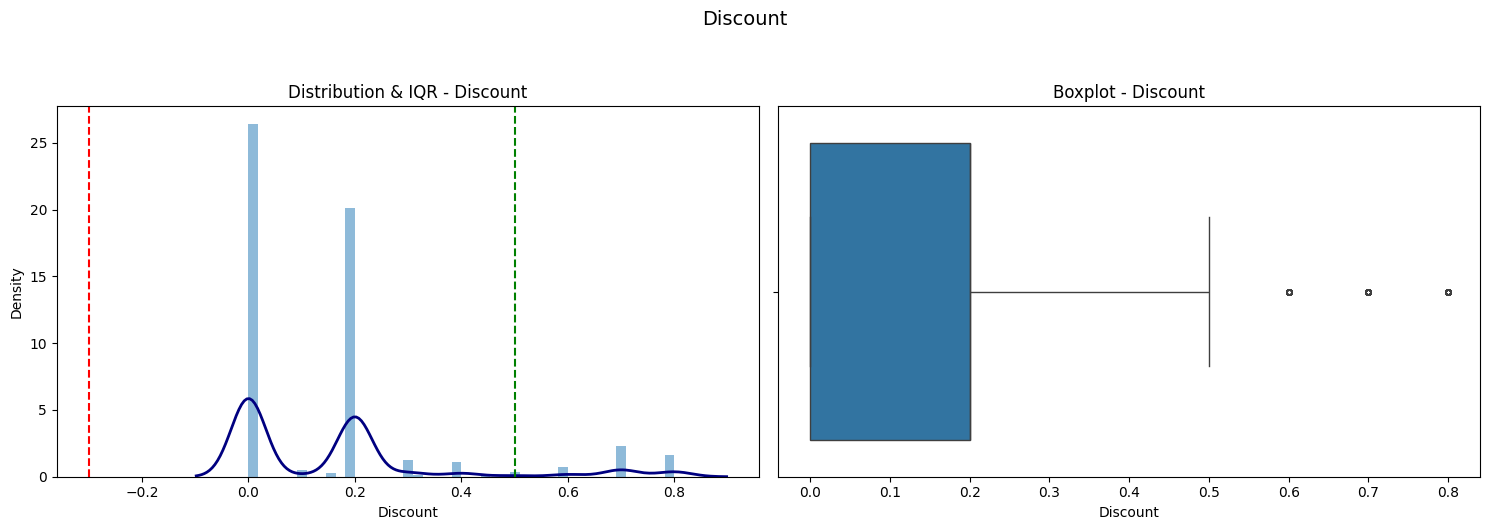

Field   Q1   Q3  IQR  Lower Bound  Upper Bound  Total Outliers
0  Discount  0.0  0.2  0.2         -0.3          0.5             856

In [40]:
feature = 'Discount'
results = []
s = pd.to_numeric(df[feature], errors='coerce').dropna()

q1, q3 = s.quantile([0.25, 0.75])
iqr = q3 - q1
low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr
mask = (s < low) | (s > high)

# visualisasi
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle(feature, fontsize=14, y=1.05)
axes[0].hist(s, bins='auto', alpha=0.5, density=True)
sns.kdeplot(s, ax=axes[0], color='navy', linewidth=2)
axes[0].axvline(low, color='red', linestyle='--', linewidth=1.5)
axes[0].axvline(high, color='green', linestyle='--', linewidth=1.5)
axes[0].set_title(f"Distribution & IQR - {feature}")
axes[1].set_title(f"Boxplot - {feature}")
sns.boxplot(x=s, ax=axes[1], fliersize=4)
plt.tight_layout()
plt.show()

# simpan ke results
results.append({
    "Field": feature,
    "Q1": round(q1,3),
    "Q3": round(q3,3),
    "IQR": round(iqr,3),
    "Lower Bound": round(low,3),
    "Upper Bound": round(high,3),
    "Total Outliers": int(mask.sum())
})

outlier_summary = pd.DataFrame(results)
outlier_summary

#### Analisis Outlier – Discount

**Ringkasan:**
- **Kuartil & IQR**
  - Q1 = 0.0, Q3 = 0.2, IQR = 0.2
  - Batas bawah = -0.3, Batas atas = 0.5
  - Total outlier = 856 data (Discount < -0.3 atau > 0.5)

- **Distribusi (Histogram & KDE)**
  - Sebagian besar data **berkumpul pada 0% dan 20%** diskon.
  - Distribusi **miring ke kanan (right-skewed)**, menunjukkan sebagian kecil transaksi dengan diskon sangat tinggi.

- **Boxplot**
  - Kotak menunjukkan rentang normal (0 – 0.2) dengan median sekitar 0.1 - 0.2
  - Titik-titik di atas 0.5 merupakan **outlier**.

- **Insight Utama**
  - Mayoritas transaksi memiliki diskon 0 – 20% → mencerminkan kebijakan diskon normal.
  - Outlier (>50% diskon) kemungkinan berasal dari **promosi khusus atau kesalahan strategi penjualan** -> perlu analisis lebih lanjut.
  - Diskon ekstrem dapat **menekan margin profit**, sehingga penting untuk pemantauan dan evaluasi.

**Kesimpulan:** Distribusi variabel *Discount* **tidak terdistribusi normal** karena bentuknya miring ke kanan dan terdapat banyak outlier di atas 0.5.

---
#### `Profit`

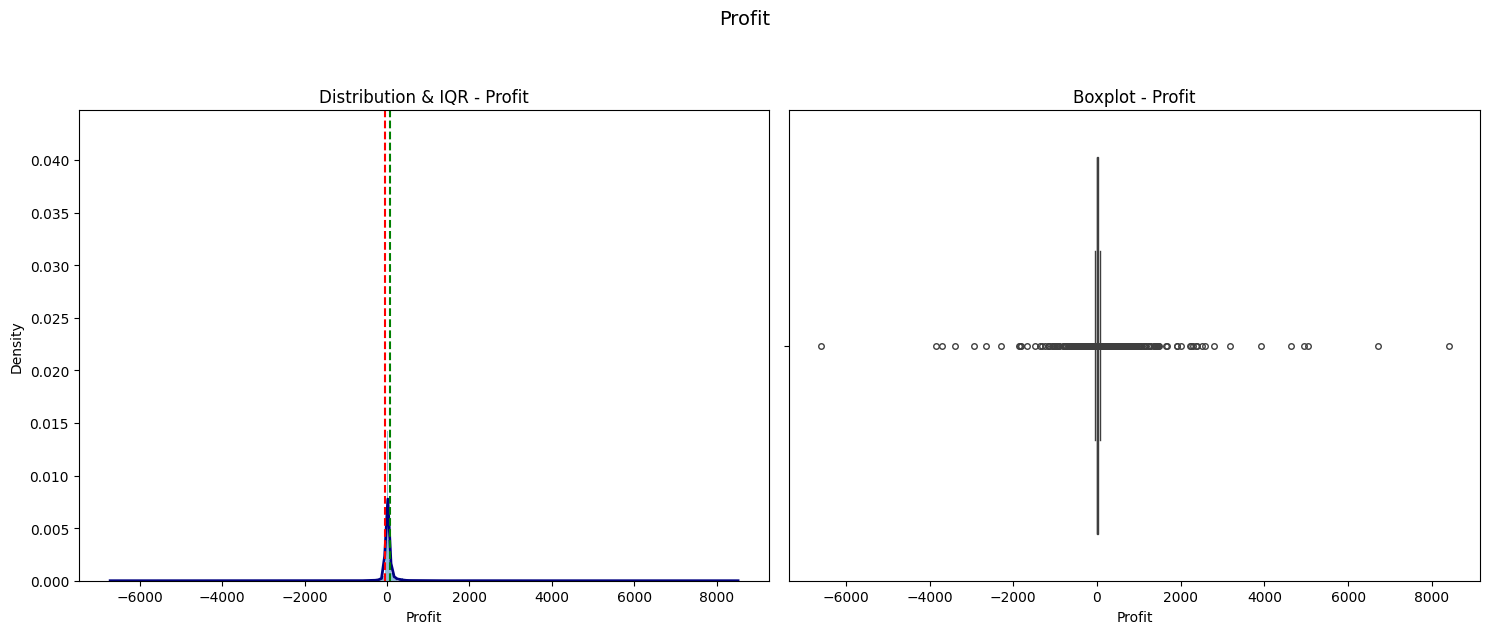

Field     Q1      Q3     IQR  Lower Bound  Upper Bound  Total Outliers
0  Profit  1.729  29.364  27.635      -39.724       70.817            1881

In [41]:
feature = 'Profit'
results = []
s = pd.to_numeric(df[feature], errors='coerce').dropna()

q1, q3 = s.quantile([0.25, 0.75])
iqr = q3 - q1
low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr
mask = (s < low) | (s > high)

# visualisasi
fig, axes = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle(feature, fontsize=14, y=1.05)
axes[0].hist(s, bins='auto', alpha=0.5, density=True)
sns.kdeplot(s, ax=axes[0], color='navy', linewidth=2)
axes[0].axvline(low, color='red', linestyle='--', linewidth=1.5)
axes[0].axvline(high, color='green', linestyle='--', linewidth=1.5)
axes[0].set_title(f"Distribution & IQR - {feature}")
axes[1].set_title(f"Boxplot - {feature}")
sns.boxplot(x=s, ax=axes[1], fliersize=4)
plt.tight_layout()
plt.show()

# simpan ke results
results.append({
    "Field": feature,
    "Q1": round(q1,3),
    "Q3": round(q3,3),
    "IQR": round(iqr,3),
    "Lower Bound": round(low,3),
    "Upper Bound": round(high,3),
    "Total Outliers": int(mask.sum())
})
outlier_summary = pd.DataFrame(results)
outlier_summary

#### Analisis Outlier – Profit

**Ringkasan:**
- **Kuartil & IQR**
  - Q1 = 1.729, Q3 = 29.364, IQR = 27.635
  - Batas bawah = -39.724, Batas atas = 70.817
  - Total outlier = 1.881 data (Profit < -39.724 atau > 70.817)

- **Distribusi (Histogram & KDE)**
  - Mayoritas data **terpusat sangat rapat di sekitar 0** dengan kepadatan tinggi.
  - Distribusi **sangat miring (heavy-tailed / leptokurtic)** dengan rentang ekstrem hingga ±8.000.
  - Terdapat ekor panjang (long tail) baik ke arah negatif maupun positif yang menandakan banyak nilai ekstrim.

- **Boxplot**
  - Kotak menunjukkan rentang normal (sekitar -40 sampai 70) dengan median mendekati nol.
  - Titik-titik di luar whisker adalah **outlier**, meliputi profit negatif besar maupun profit positif yang sangat tinggi.

- **Insight Utama**
  - Sebagian besar transaksi menghasilkan profit kecil atau mendekati nol.
  - Outlier besar (baik rugi besar maupun untung besar) dapat berasal dari **transaksi bernilai sangat besar, kesalahan strategi penjualan, atau transaksi khusus (misalnya project besar atau retur masif)**.
  - Sebaran yang ekstrem ini **berpengaruh pada rata-rata (mean)** sehingga analisis sebaiknya mempertimbangkan median atau metode robust lain.

**Kesimpulan:** Distribusi variabel *Profit* **tidak terdistribusi normal** karena sangat miring dan memiliki ekor panjang dengan banyak outlier besar di kedua sisi.

---
#### `Profit Margin`

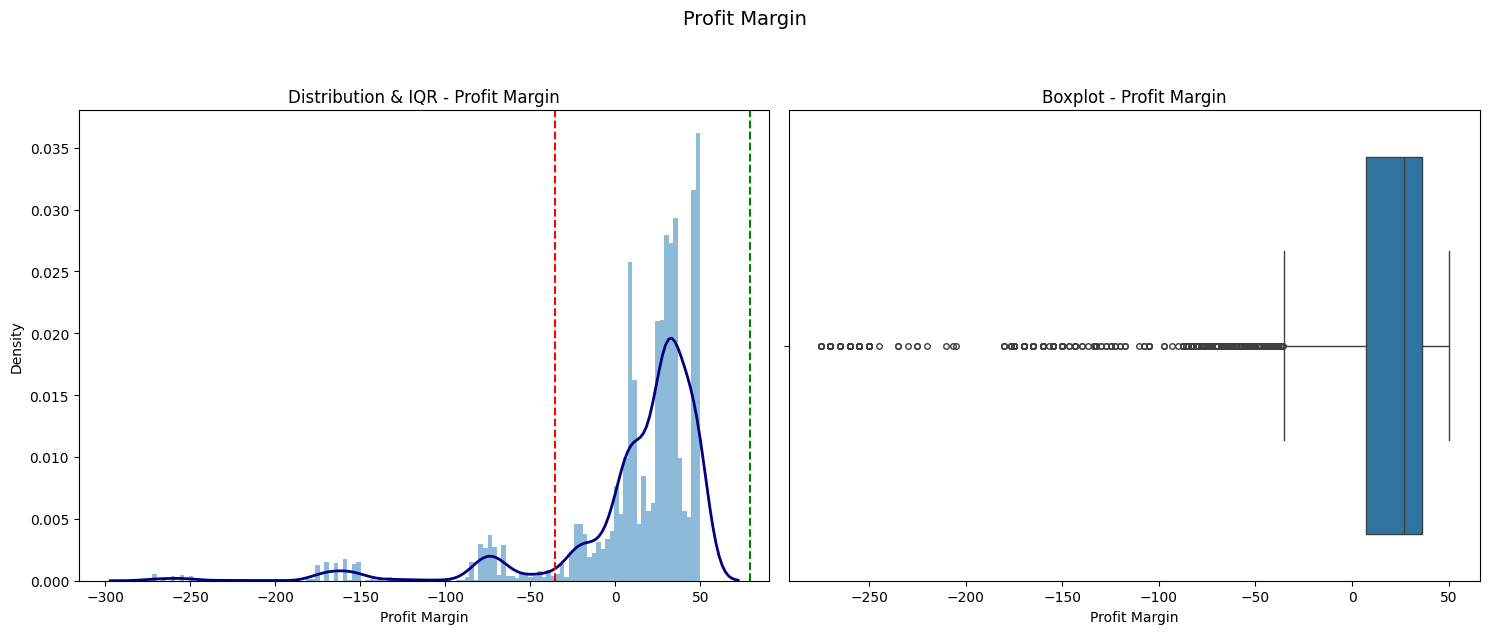

Field   Q1     Q3    IQR  Lower Bound  Upper Bound  Total Outliers
0  Profit Margin  7.5  36.25  28.75      -35.625       79.375             952

In [42]:
feature = 'Profit Margin'
results = []
s = pd.to_numeric(df[feature], errors='coerce').dropna()

q1, q3 = s.quantile([0.25, 0.75])
iqr = q3 - q1
low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr
mask = (s < low) | (s > high)

# visualisasi
fig, axes = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle(feature, fontsize=14, y=1.05)
axes[0].hist(s, bins='auto', alpha=0.5, density=True)
sns.kdeplot(s, ax=axes[0], color='navy', linewidth=2)
axes[0].axvline(low, color='red', linestyle='--', linewidth=1.5)
axes[0].axvline(high, color='green', linestyle='--', linewidth=1.5)
axes[0].set_title(f"Distribution & IQR - {feature}")
axes[1].set_title(f"Boxplot - {feature}")
sns.boxplot(x=s, ax=axes[1], fliersize=4)
plt.tight_layout()
plt.show()

# simpan ke results
results.append({
    "Field": feature,
    "Q1": round(q1,3),
    "Q3": round(q3,3),
    "IQR": round(iqr,3),
    "Lower Bound": round(low,3),
    "Upper Bound": round(high,3),
    "Total Outliers": int(mask.sum())
})
outlier_summary = pd.DataFrame(results)
outlier_summary


#### Analisis Outlier – Profit Margin

**Ringkasan:**
- **Kuartil & IQR**
  - Q1 = 7.5, Q3 = 36.25, IQR = 28.75
  - Batas bawah = -35.625, Batas atas = 79.375
  - Total outlier = 952 data (Profit Margin < -35.625 atau > 79.375)

- **Distribusi (Histogram & KDE)**
  - Sebagian besar nilai profit margin **terkonsentrasi di kisaran 0 – 60%**, dengan puncak sekitar 30–40%.
  - Distribusi **miring ke kiri (left-skewed) dengan ekor panjang ke negatif**. Terlihat adanya data dengan profit margin negatif ekstrim hingga sekitar -300%.
  - Terdapat kelompok kecil dengan margin sangat tinggi (>80%) yang juga termasuk outlier.

- **Boxplot**
  - Kotak menunjukkan rentang normal (sekitar -35 s/d 79) dengan median di sekitar 25–30%.
  - Banyak titik di bawah -35% menunjukkan **outlier kerugian margin besar**, dan sebagian kecil di atas 79% menunjukkan **outlier keuntungan margin sangat tinggi**.

- **Insight Utama**
  - Mayoritas transaksi menghasilkan margin sehat (0 – 60%).
  - Outlier negatif besar kemungkinan menunjukkan **transaksi rugi atau kesalahan strategi penjualan/penetapan harga**.
  - Outlier positif sangat tinggi dapat berasal dari **produk dengan margin luar biasa atau harga jual tanpa pemberian discount**.
  - Karena distribusi sangat asimetris, analisis profitabilitas sebaiknya mempertimbangkan **median dan metode robust** (misalnya IQR filtering) ketimbang rata-rata.

**Kesimpulan:** Variabel *Profit Margin* **tidak terdistribusi normal** karena miring ke kiri dengan banyak outlier negatif ekstrem dan beberapa outlier positif sangat tinggi.

---
#### `Sales`

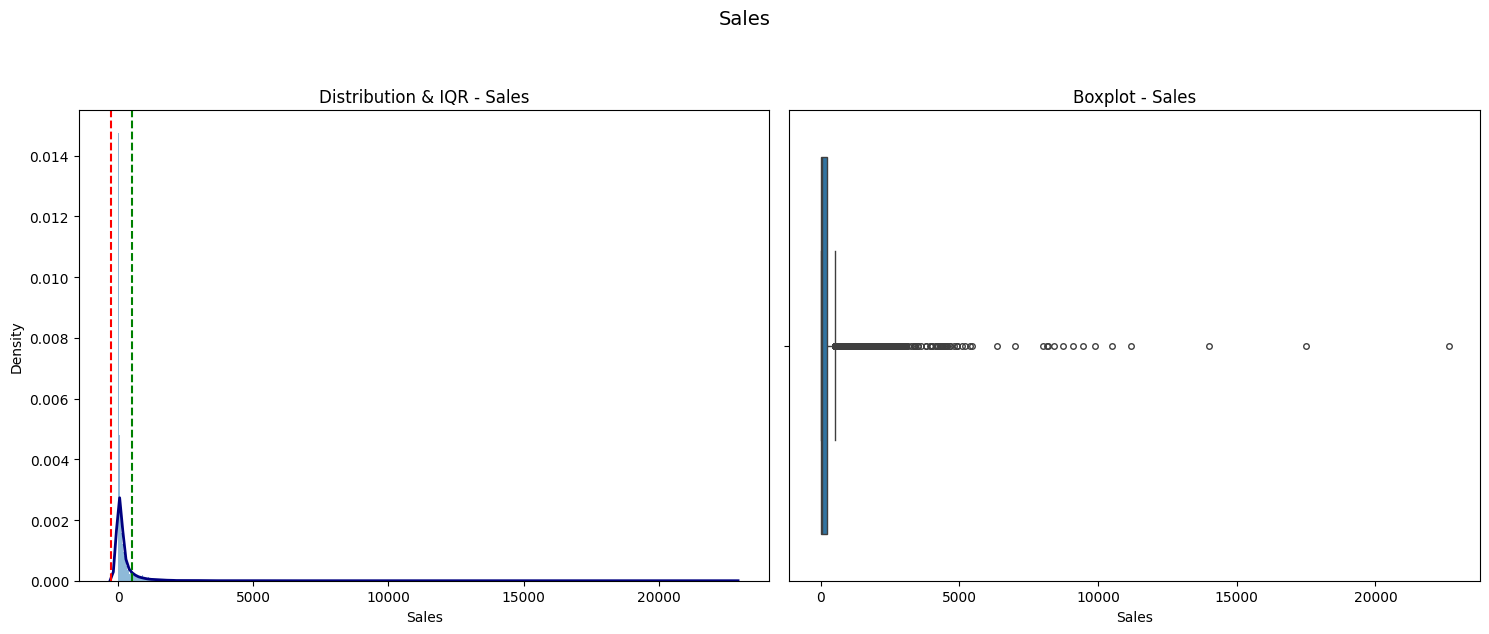

Field     Q1      Q3     IQR  Lower Bound  Upper Bound  Total Outliers
0  Sales  17.28  209.94  192.66      -271.71       498.93            1167

In [43]:
feature = 'Sales'
results = []
s = pd.to_numeric(df[feature], errors='coerce').dropna()

q1, q3 = s.quantile([0.25, 0.75])
iqr = q3 - q1
low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr
mask = (s < low) | (s > high)

# visualisasi
fig, axes = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle(feature, fontsize=14, y=1.05)
axes[0].hist(s, bins='auto', alpha=0.5, density=True)
sns.kdeplot(s, ax=axes[0], color='navy', linewidth=2)
axes[0].axvline(low, color='red', linestyle='--', linewidth=1.5)
axes[0].axvline(high, color='green', linestyle='--', linewidth=1.5)
axes[0].set_title(f"Distribution & IQR - {feature}")
axes[1].set_title(f"Boxplot - {feature}")
sns.boxplot(x=s, ax=axes[1], fliersize=4)
plt.tight_layout()
plt.show()

# simpan ke results
results.append({
    "Field": feature,
    "Q1": round(q1,3),
    "Q3": round(q3,3),
    "IQR": round(iqr,3),
    "Lower Bound": round(low,3),
    "Upper Bound": round(high,3),
    "Total Outliers": int(mask.sum())
})

outlier_summary = pd.DataFrame(results)
outlier_summary

#### Analisis Outlier – Sales

**Ringkasan:**
- **Kuartil & IQR**
  - Q1 = 17.28, Q3 = 209.94, IQR = 192.66
  - Batas bawah = -271.71, Batas atas = 498.93
  - Total outlier = 1.167 data (Sales < -271.71 atau > 498.93)

- **Distribusi (Histogram & KDE)**
  - Mayoritas data **sangat terkonsentrasi di bawah 500**, khususnya di bawah 200.
  - Distribusi **sangat miring ke kanan (right-skewed)** dengan ekor panjang hingga lebih dari 20.000.
  - Hanya sebagian kecil transaksi yang memiliki nilai penjualan sangat besar.

- **Boxplot**
  - Kotak menunjukkan rentang normal (sekitar -270 s/d 500) dengan median di bawah 100.
  - Titik-titik jauh di sebelah kanan whisker merupakan **outlier**, yaitu transaksi dengan nilai penjualan sangat tinggi.

- **Insight Utama**
  - Sebagian besar transaksi adalah **penjualan kecil hingga menengah**, sesuai rentang normal 0 – 500.
  - Outlier dengan nilai ribuan hingga puluhan ribu kemungkinan **pesanan khusus/bundle**.
  - Distribusi yang sangat asimetris membuat **mean tidak representatif**, gunakan median atau metode robust untuk analisis central tendency.

**Kesimpulan:** Variabel *Sales* **tidak terdistribusi normal** karena sangat miring ke kanan dan memiliki banyak outlier penjualan besar yang jauh melebihi rentang normal.

---
#### `Quantity`

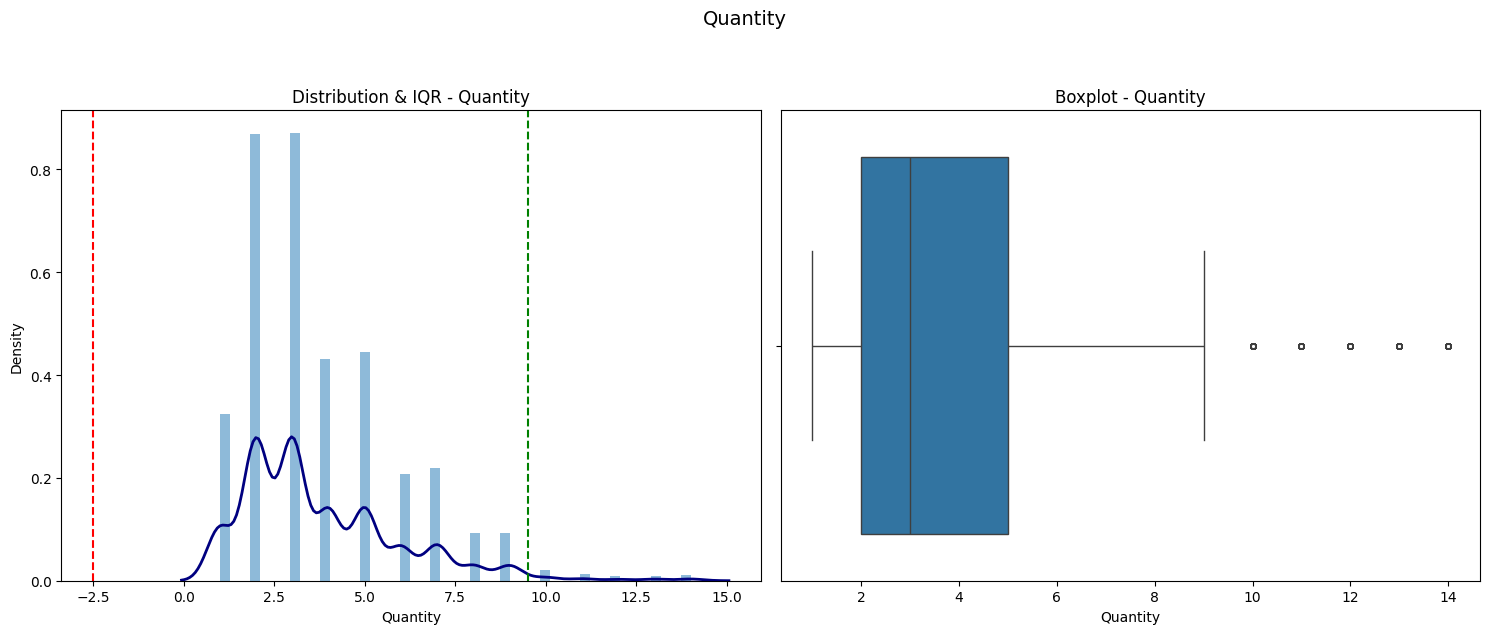

Field   Q1   Q3  IQR  Lower Bound  Upper Bound  Total Outliers
0  Quantity  2.0  5.0  3.0         -2.5          9.5             170

In [44]:
feature = 'Quantity'
results = []
s = pd.to_numeric(df[feature], errors='coerce').dropna()

q1, q3 = s.quantile([0.25, 0.75])
iqr = q3 - q1
low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr
mask = (s < low) | (s > high)

# visualisasi
fig, axes = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle(feature, fontsize=14, y=1.05)
axes[0].hist(s, bins='auto', alpha=0.5, density=True)
sns.kdeplot(s, ax=axes[0], color='navy', linewidth=2)
axes[0].axvline(low, color='red', linestyle='--', linewidth=1.5)
axes[0].axvline(high, color='green', linestyle='--', linewidth=1.5)
axes[0].set_title(f"Distribution & IQR - {feature}")
axes[1].set_title(f"Boxplot - {feature}")
sns.boxplot(x=s, ax=axes[1], fliersize=4)
plt.tight_layout()
plt.show()

# simpan ke results
results.append({
    "Field": feature,
    "Q1": round(q1,3),
    "Q3": round(q3,3),
    "IQR": round(iqr,3),
    "Lower Bound": round(low,3),
    "Upper Bound": round(high,3),
    "Total Outliers": int(mask.sum())
})

outlier_summary = pd.DataFrame(results)
outlier_summary

#### Analisis Outlier – Quantity

**Ringkasan:**
- **Kuartil & IQR**
  - Q1 = 2.0, Q3 = 5.0, IQR = 3.0
  - Batas bawah = -2.5, Batas atas = 9.5
  - Total outlier = 170 data (Quantity < -2.5 atau > 9.5)

- **Distribusi (Histogram & KDE)**
  - Sebagian besar transaksi memiliki jumlah pembelian **antara 2 – 5 unit**.
  - Distribusi **miring ke kanan (right-skewed)** karena ada transaksi dengan jumlah pembelian jauh lebih besar dari mayoritas.
  - Hampir tidak ada nilai negatif; batas bawah negatif hanya hasil perhitungan IQR.

- **Boxplot**
  - Kotak menunjukkan rentang normal 2 – 5 unit, median sekitar 3 unit.
  - Titik-titik di atas 9.5 unit merupakan **outlier** yang menunjukkan pembelian dalam jumlah sangat besar.

- **Insight Utama**
  - Mayoritas transaksi adalah pembelian skala kecil (<=5 unit).
  - Outlier (>=10 unit) kemungkinan **order dalam jumlah besar/bulk** atau **pesanan khusus**.
  - Distribusi yang asimetris membuat median lebih representatif daripada mean sebagai ukuran sentral.

**Kesimpulan:** Variabel *Quantity* **tidak terdistribusi normal** karena miring ke kanan dengan outlier transaksi pembelian besar di atas 9.5 unit.

---

### **Ringkasan Outlier & Rekomendasi**
- Seluruh variabel **tidak terdistribusi normal** dan cenderung **miring (skewed)**, dengan banyak nilai ekstrim (outlier).  
- Profit, Sales, dan Profit Margin memiliki **ekor panjang** dengan rentang yang sangat jauh dari data mayoritas.  
- Discount dan Quantity relatif lebih sempit, tetapi tetap menunjukkan outlier signifikan (diskon >50% dan pembelian >10 unit).

#### Rekomendasi
- **Gunakan median & IQR** sebagai ukuran pemusatan dan sebaran utama karena **mean sangat terpengaruh outlier**.  
- Terapkan **metode robust** seperti log transformation, winsorization, atau trimming bila diperlukan untuk modelling.  
- **Validasi outlier**: pastikan apakah transaksi bernilai besar atau kerugian ekstrem merupakan kejadian bisnis sah (misal pesanan proyek, diskon khusus) atau kesalahan input yang perlu dibersihkan.

**Kesimpulan:**  
Fokuskan analisis pada median dan IQR agar insight tidak bias. Outlier signifikan harus diperiksa lebih lanjut sebelum pemodelan atau pengambilan keputusan bisnis.

---


#### **Uji Normalitas**

In [45]:
from scipy.stats import shapiro, normaltest

target_cols = ['Discount', 'Profit','Profit Margin','Sales', 'Quantity']
results_normality = []

for col in target_cols:
    data = pd.to_numeric(df[col], errors='coerce').dropna()

    # sampling bila jumlah data terlalu besar untuk Shapiro
    if len(data) > 5000:
        data = data.sample(5000, random_state=42)

    # uji Shapiro-Wilk
    stat_shapiro, p_shapiro = shapiro(data)

    # uji D’Agostino & Pearson
    stat_dag, p_dag = normaltest(data)

    # status normal/tidak normal
    status_shapiro = "Normal" if p_shapiro >= 0.05 else "Tidak Normal"
    status_dag = "Normal" if p_dag >= 0.05 else "Tidak Normal"

    # simpan ke list (opsional untuk DataFrame)
    results_normality.append({
        'Column': col,
        'Shapiro p-value': round(p_shapiro, 4),
        'Shapiro Status': status_shapiro,
        'D’Agostino p-value': round(p_dag, 4),
        'D’Agostino Status': status_dag
    })

# jika mau lihat dalam tabel ringkasan
pd.DataFrame(results_normality)


Column  Shapiro p-value Shapiro Status  D’Agostino p-value  \
0       Discount              0.0   Tidak Normal                 0.0   
1         Profit              0.0   Tidak Normal                 0.0   
2  Profit Margin              0.0   Tidak Normal                 0.0   
3          Sales              0.0   Tidak Normal                 0.0   
4       Quantity              0.0   Tidak Normal                 0.0   

  D’Agostino Status  
0      Tidak Normal  
1      Tidak Normal  
2      Tidak Normal  
3      Tidak Normal  
4      Tidak Normal

***Semua kolom numerik (Discount, Profit, Profit Margin , Sales, Quantity) memiliki outlier berdasarkan IQR, terlihat dari histogram dan boxplot. Namun outlier tersebut wajar secara bisnis (misalnya transaksi besar atau diskon khusus) sehingga tidak dihapus atau diubah. Hasil uji normalitas (Shapiro-Wilk dan D’Agostino-Pearson) menunjukkan seluruh kolom tidak berdistribusi normal (p < 0.05). Dengan demikian, seluruh data termasuk outlier akan tetap digunakan dan analisis lanjutan akan memakai metode non-parametris/robust seperti korelasi Spearman agar hasil tetap valid.***

----

## `Mengukur Korelasi Antara Discount dan Profit`

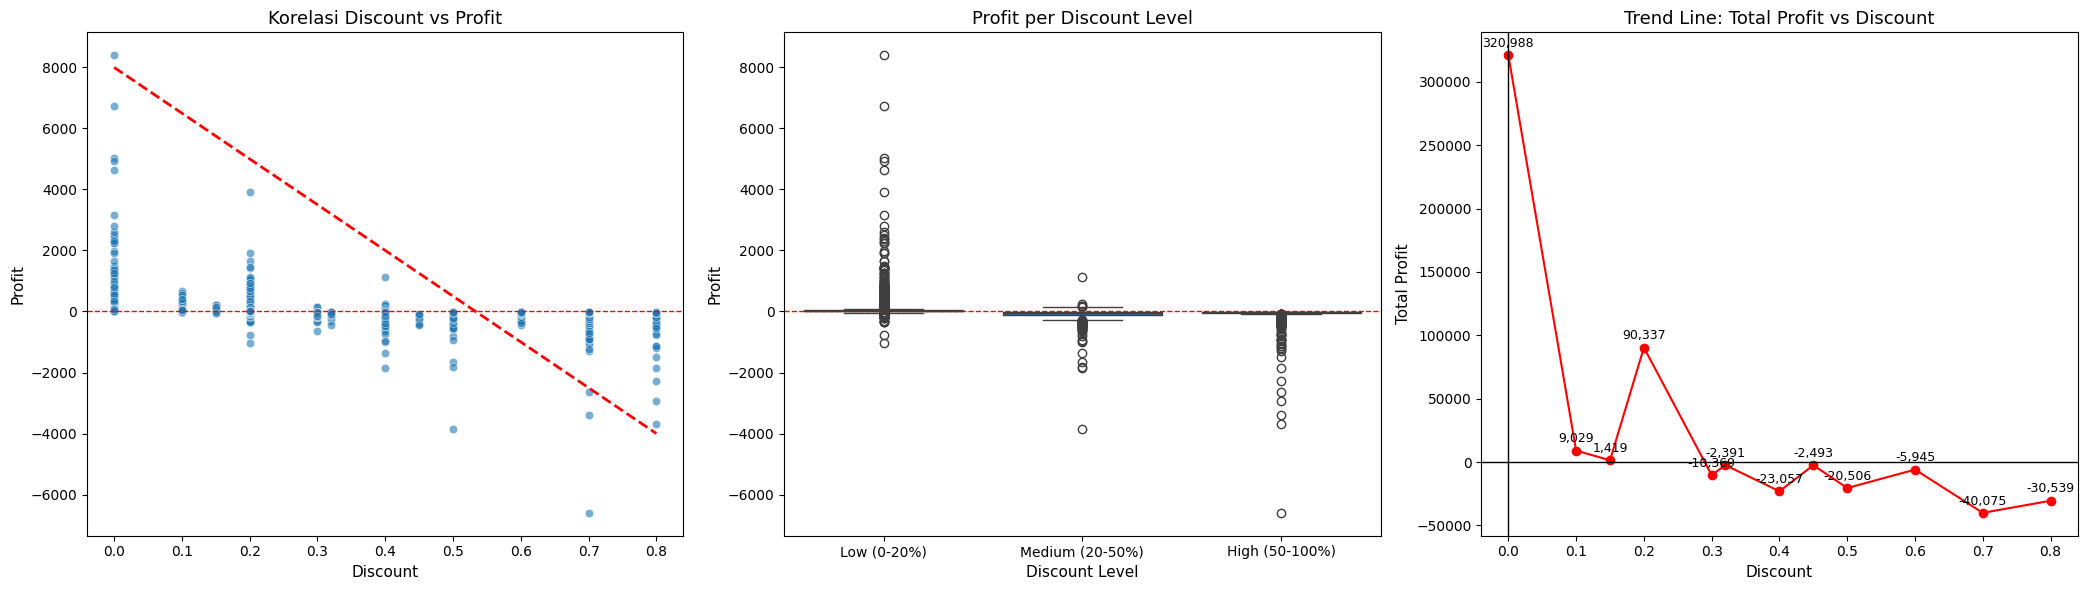

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# === Scatter Plot dengan garis tren manual ===
sns.scatterplot(
    x='Discount', y='Profit', data=df,
    alpha=0.6, ax=axes[0]
)
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)

# Garis tren manual (misal perkiraan hubungan linier)
axes[0].plot(
    [0.0, 0.8],       # titik x awal & akhir
    [8000, -4000],    # titik y awal & akhir
    color='red', linewidth=2, linestyle='--'
)

axes[0].set_title('Korelasi Discount vs Profit', fontsize=13)
axes[0].set_xlabel('Discount', fontsize=11)
axes[0].set_ylabel('Profit', fontsize=11)

# === Boxplot: Profit per Discount Level ===
sns.boxplot(
    x='Discount_Level', y='Profit',
    data=df, ax=axes[1]
)
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].set_title('Profit per Discount Level', fontsize=13)
axes[1].set_xlabel('Discount Level', fontsize=11)
axes[1].set_ylabel('Profit', fontsize=11)

# === Trend Line: Total Profit vs Discount ===
profit_per_disc = df.groupby('Discount', as_index=False)['Profit'].sum()
profit_per_disc = profit_per_disc.sort_values('Discount')

axes[2].plot(profit_per_disc['Discount'],
             profit_per_disc['Profit'],
             color='red', marker='o')  # trend line merah

# Garis sumbu 0 (hanya horizontal & vertical)
axes[2].axhline(y=0, color='black', linewidth=1)
axes[2].axvline(x=0, color='black', linewidth=1)

# Anotasi angka profit di setiap titik
for x, y in zip(profit_per_disc['Discount'], profit_per_disc['Profit']):
    axes[2].annotate(f'{y:,.0f}',
                     xy=(x, y),
                     xytext=(0, 6),
                     textcoords='offset points',
                     ha='center',
                     fontsize=9,
                     color='black')

axes[2].set_title('Trend Line: Total Profit vs Discount', fontsize=13)
axes[2].set_xlabel('Discount', fontsize=11)
axes[2].set_ylabel('Total Profit', fontsize=11)

# Hilangkan grid default di semua subplot
for ax in axes:
    ax.grid(False)

plt.tight_layout()
plt.show()


### Insight Analysis – Discount & Profit Relationship

**Korelasi Discount vs Profit (Scatter Plot)**
- Terlihat **hubungan negatif yang jelas**: semakin tinggi discount, semakin rendah profit.  
- Sebagian besar titik dengan discount >0.3 mulai **mengarah ke profit negatif**.  
- Garis tren merah menegaskan **penurunan tajam profit** seiring kenaikan discount.

**Profit per Discount Level (Boxplot)**
- **Low discount (0–20%)** mendominasi kontribusi profit positif dan memiliki sebaran terluas ke arah profit tinggi.  
- **Medium (20–50%) dan High (50–100%) discount** mayoritas berada di bawah atau mendekati garis 0, menandakan **potensi rugi** yang signifikan.

**Total Profit vs Discount (Trend Line)**
- Profit total tertinggi berada di **discount mendekati 0% (±320K)**.  
- Setelah itu profit langsung **turun drastis**, dengan banyak titik berada di area negatif hingga **-30K** pada discount 0.8.  
- Anotasi angka menguatkan bahwa **kenaikan discount tidak diimbangi oleh kenaikan profit**, bahkan cenderung memicu kerugian.

**Kesimpulan Utama**
- **Program diskon saat ini tidak efektif**: diskon tinggi tidak meningkatkan profit, bahkan memperbesar kerugian.  
- Rekomendasi: fokus pada **low discount segment**, lakukan **evaluasi dan segmentasi** ulang kebijakan diskon untuk menekan kerugian.


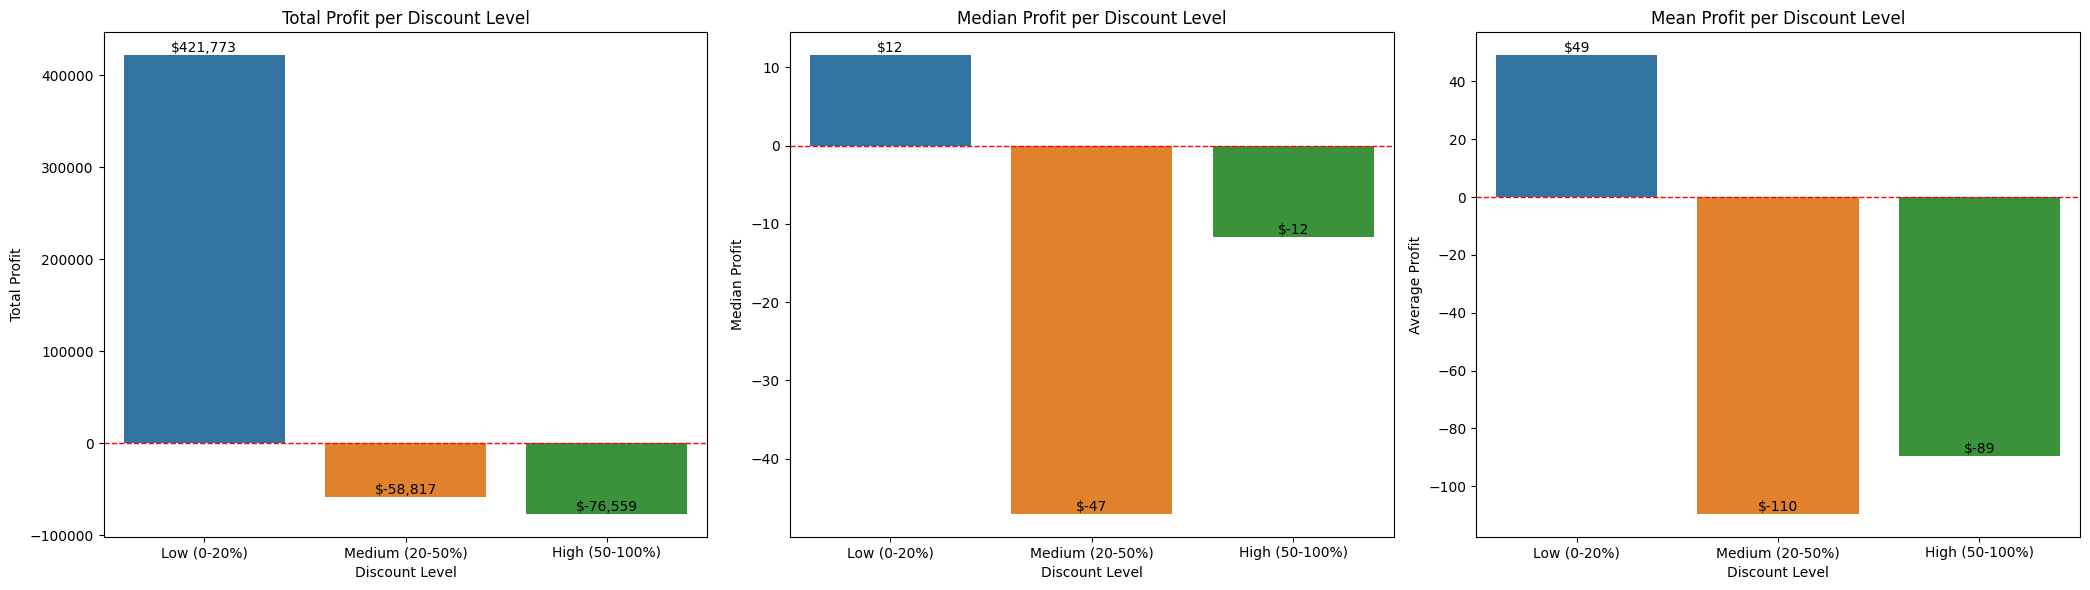

In [47]:
# ringkasan per discount level
total_profit = (
    df.groupby('Discount_Level')['Profit']
      .sum()
      .reindex(labels)
      .reset_index()
)
median_profit = (
    df.groupby('Discount_Level')['Profit']
      .median()
      .reindex(labels)
      .reset_index()
)
avg_profit = (
    df.groupby('Discount_Level')['Profit']
      .mean()
      .reindex(labels)
      .reset_index()
)

fig, axes = plt.subplots(1, 3, figsize=(21,6))

# --- Panel 1: Total Profit ---
sns.barplot(x='Discount_Level', y='Profit', hue='Discount_Level',data=total_profit, ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].set_title("Total Profit per Discount Level")
axes[0].set_xlabel("Discount Level")
axes[0].set_ylabel("Total Profit")

for p in axes[0].patches:
    axes[0].annotate(f"${p.get_height():,.0f}",
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

# --- Panel 2: Median Profit ---
sns.barplot(x='Discount_Level', y='Profit', hue='Discount_Level',data=median_profit, ax=axes[1])
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].set_title("Median Profit per Discount Level")
axes[1].set_xlabel("Discount Level")
axes[1].set_ylabel("Median Profit")

for p in axes[1].patches:
    axes[1].annotate(f"${p.get_height():,.0f}",
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

# --- Panel 3: Mean Profit ---
sns.barplot(x='Discount_Level', y='Profit',hue='Discount_Level', data=avg_profit, ax=axes[2])
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)
axes[2].set_title("Mean Profit per Discount Level")
axes[2].set_xlabel("Discount Level")
axes[2].set_ylabel("Average Profit")

for p in axes[2].patches:
    axes[2].annotate(f"${p.get_height():,.0f}",
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



### **Insight Profit per Discount Level**

#### Ringkasan Temuan
- **Diskon rendah (0–20%)** adalah **satu-satunya level yang memberi profit positif**, baik total, median, maupun mean.
- **Diskon menengah (20–50%) dan tinggi (50–100%)** menunjukkan **total, median, dan mean profit negatif**, artinya rata-rata transaksi rugi.

#### Kesimpulan
Penerapan diskon tinggi **tidak meningkatkan profit**. Sebaliknya, mulai diskon **≥20% justru menyebabkan kerugian signifikan**, baik secara total maupun rata-rata.  
Dengan demikian, strategi diskon yang aman dan menguntungkan adalah **fokus pada rentang 0–20%** dan menghindari diskon di atas 20%.

---

#### **Uji Statistik: Spearman Correlation**

Karena persebaran data ***Discount*** dan ***Profit*** **tidak berdistribusi normal**, korelasi yang tepat untuk mengukur hubungan antara ***Discount*** dan ***Profit*** adalah **Spearman Rank Correlation**.  

Spearman menilai kekuatan dan arah hubungan **monoton** (tidak harus linier).

Hipotesis:
- **H0 (null)** : Tidak ada hubungan antara Discount dan Profit.
- **H1 (alternative)** : Ada hubungan signifikan antara Discount dan Profit.


In [48]:
from scipy.stats import spearmanr
corr, p = spearmanr(df['Discount'], df['Profit'])
print(f"Spearman correlation: {corr:.2f}, p-value: {p:.4f}")

Spearman correlation: -0.54, p-value: 0.0000


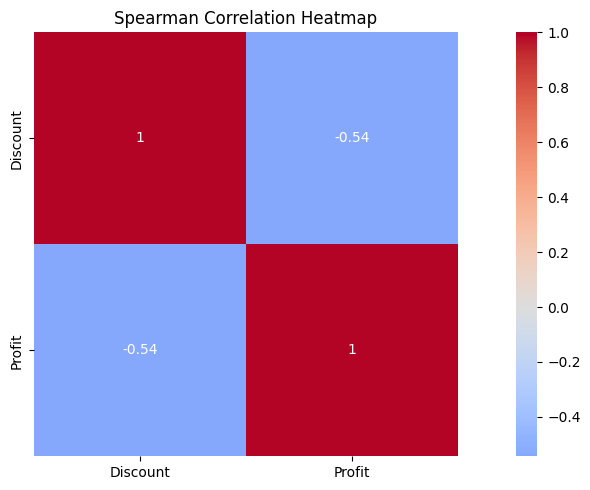

In [49]:
corr = df[['Discount','Profit']].corr(method='spearman')

plt.figure(figsize=(12,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, cbar=True, square=True)
plt.title("Spearman Correlation Heatmap")
plt.tight_layout()
plt.show()

**Hasil Uji Spearman**

- **Koefisien korelasi** : –0.54  
- **p-value** : < 0.05  

Interpretasi:  
Terdapat **hubungan negatif sedang dan signifikan** antara *Discount* dan *Profit*.  
Semakin tinggi diskon yang diberikan, semakin rendah profit yang dihasilkan.

*Hasil ini selaras dengan visualisasi (scatter plot, boxplot, bar chart, dan heatmap) yang semuanya menunjukkan tren penurunan profit seiring kenaikan diskon.*

---

#### **Kesimpulan Korelasi Discount vs Profit**

- **Tren Negatif Jelas:** Semakin tinggi diskon, semakin rendah profit; mulai diskon ≥20% rata-rata transaksi merugi.  
- **Batas Aman:** Diskon 0–20% terbukti paling menguntungkan dengan total, median, dan mean profit positif.  
- **Korelasi:** Spearman -0.54 menegaskan hubungan terbalik yang cukup kuat.

**Penerapan diskon yang lebih besar tidak meningkatkan profit, bahkan cenderung merugi. Strategi harga dan diskon perlu ditinjau ulang agar tidak menghasilkan profit yang negatif.**

---

# **Region & Subregion Mapping**

## EMEA (Europe, Middle East, Africa)

| Subregion | Countries |
|-----------|-----------|
| **UKIR** (United Kingdom & Ireland) | United Kingdom, Ireland |
| **EU-WEST** (Western Europe) | Germany, France, Italy, Spain, Portugal, Belgium, Netherlands, Luxembourg, Austria |
| **EU-EAST** (Eastern Europe) | Poland, Czech Republic, Russia, Ukraine, Croatia, Slovenia, Greece |
| **NOR** (Nordics) | Sweden, Finland, Norway, Denmark, Iceland |
| **MEA** (Middle East & Africa) | Turkey, Saudi Arabia, United Arab Emirates, Qatar, Israel, Egypt, South Africa |


## AMER (Americas)

| Subregion | Countries |
|-----------|-----------|
| **NAMER** (North America) | United States, Canada, Mexico, Costa Rica |
| **LATAM** (Latin America) | Brazil, Chile, Colombia, Argentina |


## APJ (Asia Pacific & Japan)

| Subregion | Countries |
|-----------|-----------|
| **JAPN** (Japan) | Japan |
| **APAC** (Asia Pacific) | Singapore, Philippines, South Korea, China, Indonesia, Taiwan |
| **ANZ** (Australia & New Zealand) | Australia, New Zealand |
| **IND** (India) | India |


## **Menemukan Pengaruh Diskon Besar terhadap Profit Rendah antar wilayah yang paling signifikan**

### `REGION`

- **EMEA (Europe, Middle East, Africa)**

- **AMER (Americas)**

- **APJ (Asia Pacific & Japan)**

In [50]:
region_summary = (
    df.groupby('Region')
      .agg(
          Orders=('Order ID', 'nunique'),
          Total_Profit=('Profit', 'sum'),
          Median_Profit_Margin=('Profit Margin', 'median'),
          Median_Discount=('Discount', 'median'),
          Median_Profit=('Profit','median'),
          Mean_Profit_Margin=('Profit Margin', 'mean'),
          Mean_Discount=('Discount', 'mean'),
          Mean_Profit=('Profit','mean')
      )
      .reset_index()
)
region_summary


Region  Orders  Total_Profit  Median_Profit_Margin  Median_Discount  \
0   AMER    1842   127426.9898                  29.0              0.0   
1    APJ    1069    11513.9869                  12.5              0.2   
2   EMEA    2098   147456.0450                  27.5              0.0   

   Median_Profit  Mean_Profit_Margin  Mean_Discount  Mean_Profit  
0        10.9494           21.874861       0.109359    34.768619  
1         3.6956          -14.997537       0.267223     5.456866  
2         9.0720           16.998146       0.141372    34.950473

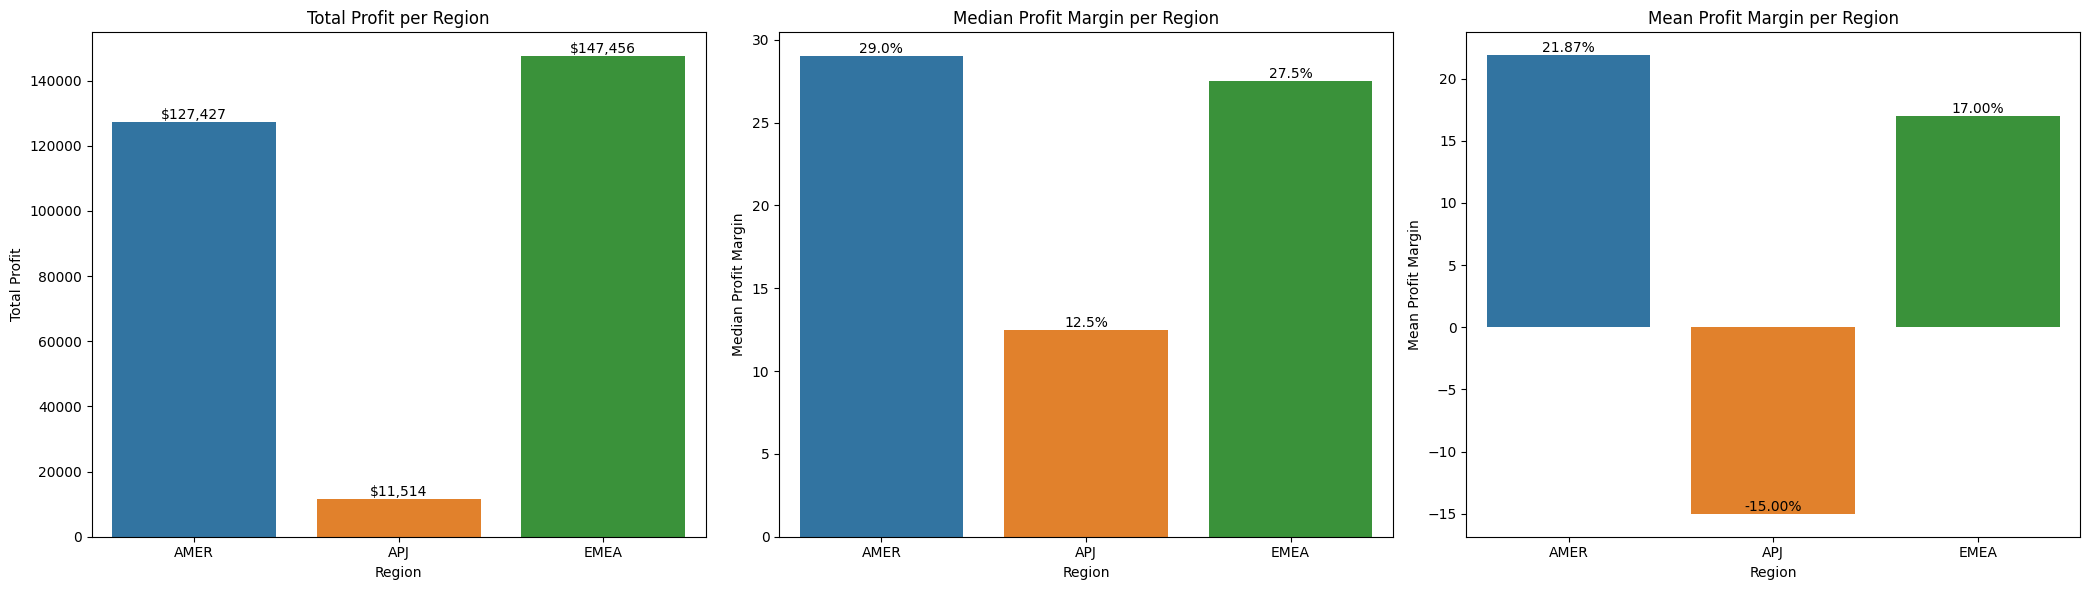

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(21,6))

# Total Profit
sns.barplot(x='Region', y='Total_Profit',hue='Region',
            data=region_summary,  ax=axes[0])
axes[0].set_title('Total Profit per Region')
axes[0].set_ylabel('Total Profit')

for p in axes[0].patches:
    axes[0].annotate(f"${p.get_height():,.0f}",
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

# Median Profit Margin
sns.barplot(x='Region', y='Median_Profit_Margin',hue='Region',
            data=region_summary, ax=axes[1])
axes[1].set_title('Median Profit Margin per Region')
axes[1].set_ylabel('Median Profit Margin')

for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height():,.1f}%",
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

# Average Profit Margin
sns.barplot(x='Region', y='Mean_Profit_Margin',hue='Region',
            data=region_summary, ax=axes[2])
axes[2].set_title('Mean Profit Margin per Region')
axes[2].set_ylabel('Mean Profit Margin')

for p in axes[2].patches:
    axes[2].annotate(f"{p.get_height():,.2f}%",
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


#### Insight Analysis – Profit & Profit Margin by Region

**Total Profit per Region**
- **EMEA** mencatat total profit **tertinggi** \$147,456, diikuti **AMER \$127,427**.  
- **APJ** jauh tertinggal hanya **$11,514**, menjadi **kontributor terendah** terhadap profit perusahaan.

**Median Profit Margin per Region**
- **AMER (29.0%)** dan **EMEA (27.5%)** menunjukkan **kesehatan margin yang seimbang dan kuat**.  
- **APJ hanya 12.5%**, menandakan **profitabilitas median yang lemah**.

**Mean Profit Margin per Region**
- **AMER (21.87%)** dan **EMEA (17.0%)** tetap positif.  
- **APJ negatif (-15.0%)**, mengindikasikan **rata-rata transaksi di APJ cenderung merugi**, meskipun median positif.


#### Kesimpulan Utama
- **APJ merupakan titik kritis**: total profit sangat rendah dan rata-rata margin negatif, menandakan banyak transaksi rugi meski ada beberapa profit di median.  
- **AMER dan EMEA** menjadi pendorong utama profit dan memiliki **struktur margin yang sehat**.  
- **Rekomendasi**: fokus evaluasi pada **strategi harga dan diskon di APJ** untuk menekan kerugian dan meningkatkan profit margin.


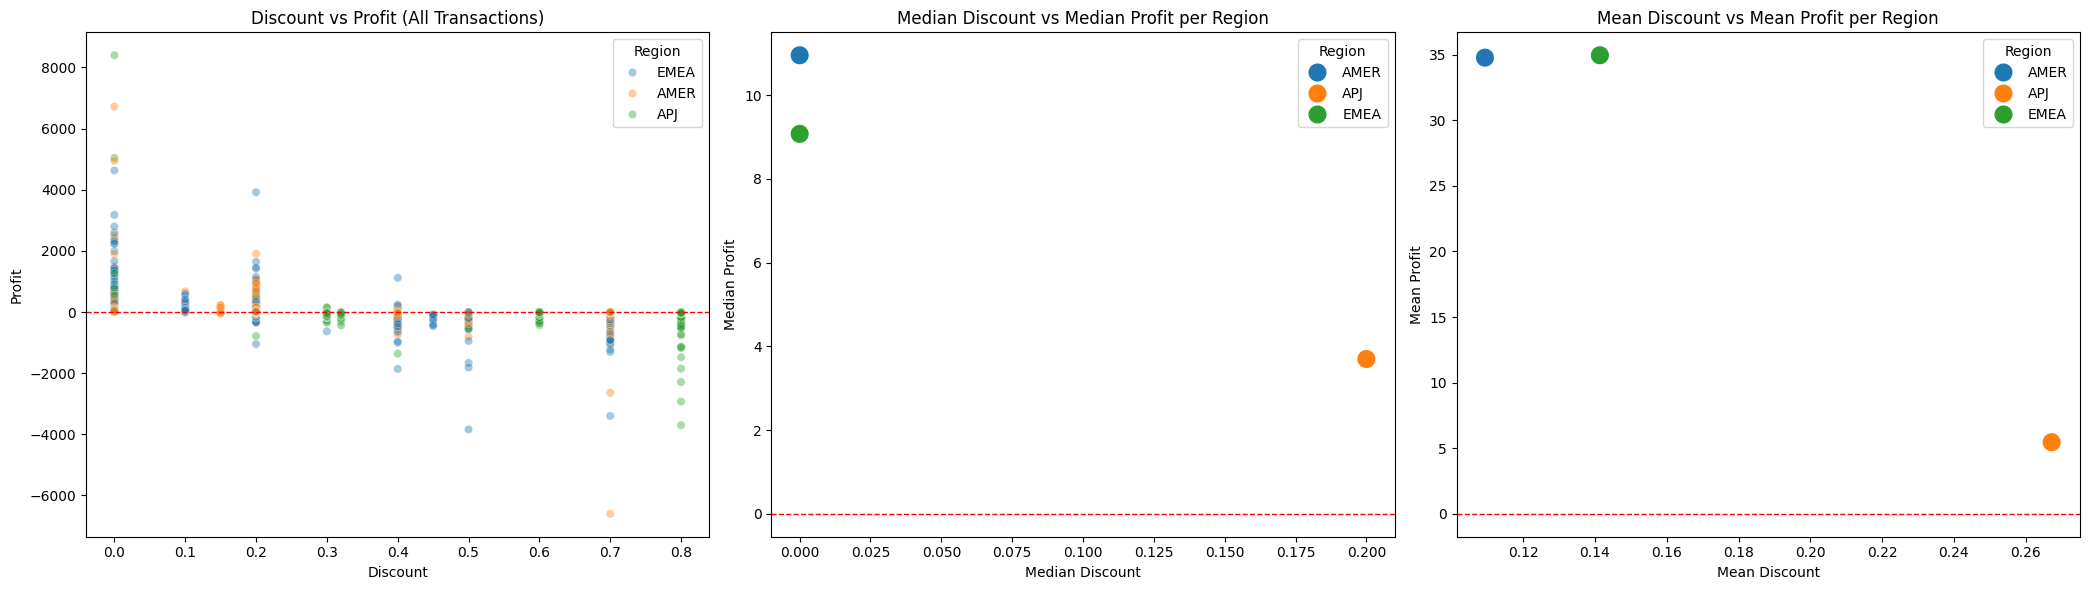

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(21,6))

# Scatter semua transaksi
sns.scatterplot(x='Discount', y='Profit',hue='Region',
                data=df, alpha=0.4, ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].set_title('Discount vs Profit (All Transactions)')
axes[0].set_xlabel('Discount')
axes[0].set_ylabel('Profit')

# Scatter median per region
sns.scatterplot(x='Median_Discount', y='Median_Profit',
                hue='Region', data=region_summary,
                s=200, ax=axes[1])
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].set_title('Median Discount vs Median Profit per Region')
axes[1].set_xlabel('Median Discount')
axes[1].set_ylabel('Median Profit')

# Scatter average per region
sns.scatterplot(x='Mean_Discount', y='Mean_Profit',
                hue='Region', data=region_summary,
                s=200, ax=axes[2])
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)
axes[2].set_title('Mean Discount vs Mean Profit per Region')
axes[2].set_xlabel('Mean Discount')
axes[2].set_ylabel('Mean Profit')

plt.tight_layout()
plt.show()


### Discount vs Profit per Region

#### Insight Penting
- **Tren Konsisten di Semua Region**  
  EMEA, AMER, dan APJ semuanya menunjukkan pola yang sama: **semakin tinggi diskon, semakin rendah profit**, dengan banyak titik profit negatif pada diskon >20%.

- **APJ Paling Bermasalah**  
  - Memiliki **diskon median & rata-rata tertinggi (~0.2 - 0.26)**.  
  - Median & mean profit terendah (sekitar 3–5) dan banyak transaksi rugi di diskon tinggi.  
  - Diskon agresif/tinggi menjadi faktor utama profit rendah.

- **AMER & EMEA Lebih Sehat**  
  - Diskon rata-rata rendah (<0.05) dengan **median & mean profit tinggi**.  
  - Profit tetap positif bahkan pada variasi diskon rendah.

#### Highlight
- **APJ menjadi prioritas utama analisis dan perbaikan**: perlu evaluasi menyeluruh atas strategi diskon, harga, dan model promosi agar profitabilitas dapat ditingkatkan.  
- **AMER & EMEA cukup dipertahankan dan dioptimalkan**, dengan fokus menjaga strategi diskon rendah yang terbukti menghasilkan profit yang stabil.


----

## **Analisis pada Subregion APJ (Asia Pacific & Japan)**

| `Subregion APJ` |
|-----------|
| **JAPN** (Japan) |
| **APAC** (Asia Pacific) |
| **ANZ** (Australia & New Zealand) |
| **IND** (India) |

In [53]:
df_apj = df[df['Region'] == 'APJ'].copy()

In [54]:
subregion_summary = (
    df_apj.groupby('Subregion')
          .agg(
              Orders=('Order ID', 'nunique'),
              Total_Profit=('Profit', 'sum'),
              Median_Profit_Margin=('Profit Margin','median'),
              Median_Discount=('Discount','median'),
              Median_Profit=('Profit','median'),
              Mean_Profit_Margin=('Profit Margin','mean'),
              Mean_Discount=('Discount','mean'),
              Mean_Profit=('Profit','mean')
          )
          .reset_index()
)
subregion_summary

Subregion  Orders  Total_Profit  Median_Profit_Margin  Median_Discount  \
0       ANZ     298   -11450.7709                  5.00              0.2   
1      APAC     211    30311.1778                 33.00              0.0   
2       IND      73    18382.9363                 37.00              0.0   
3      JAPN     487   -25729.3563                  1.25              0.2   

   Median_Profit  Mean_Profit_Margin  Mean_Discount  Mean_Profit  
0         0.6912          -34.349244       0.366919   -21.646070  
1        20.0851           33.626478       0.011409    67.810241  
2        18.7670           34.785235       0.000000   123.375411  
3         0.3336          -34.201105       0.370193   -26.121174

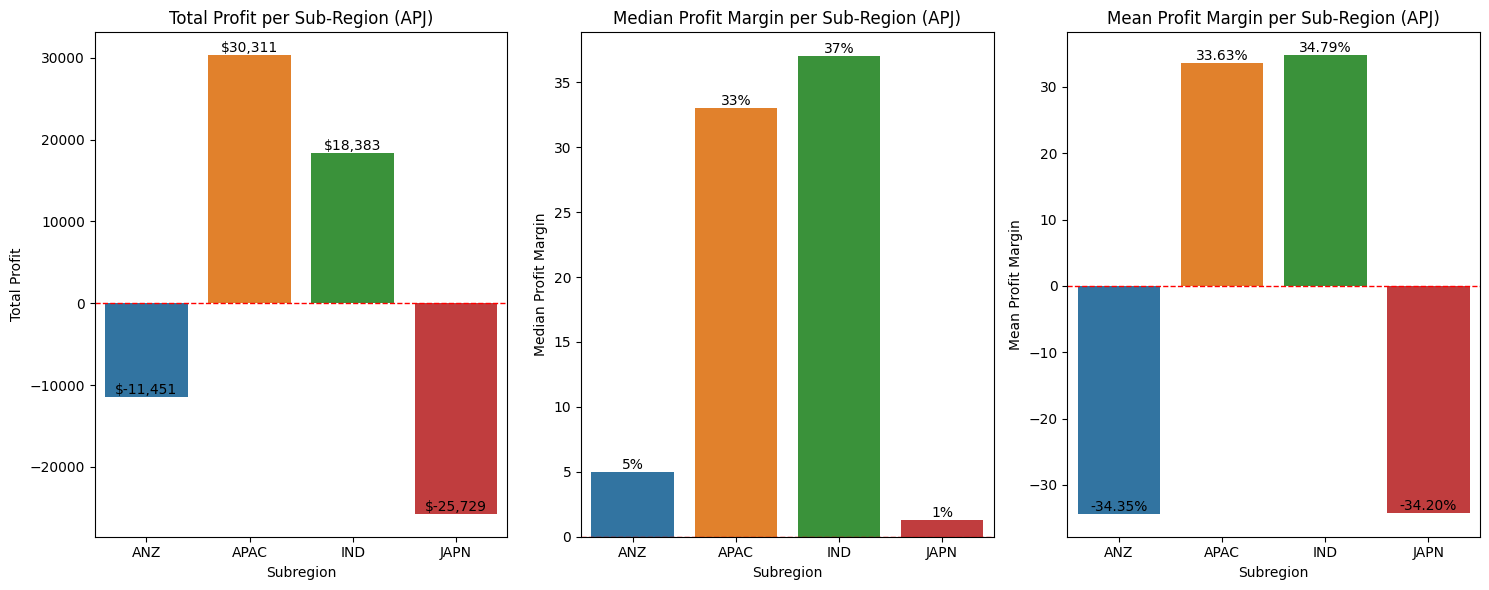

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))

# Subplot 1 Total Profit per
sns.barplot(x='Subregion', y='Total_Profit',hue='Subregion',
            data=subregion_summary,  ax=axes[0])
axes[0].set_title('Total Profit per Sub-Region (APJ)')
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].set_ylabel('Total Profit')

for p in axes[0].patches:
    axes[0].annotate(f"${p.get_height():,.0f}",
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

# Subplot 2 Median Profit Margin per Sub Region
sns.barplot(x='Subregion', y='Median_Profit_Margin',hue='Subregion',
            data=subregion_summary,  ax=axes[1])
axes[1].set_title('Median Profit Margin per Sub-Region (APJ)')
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].set_ylabel('Median Profit Margin')

for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height():,.0f}%",
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

# Subplot 3 Rata-Rata Profit Margin per Sub Region
sns.barplot(x='Subregion', y='Mean_Profit_Margin',hue='Subregion',
            data=subregion_summary, ax=axes[2])
axes[2].set_title('Mean Profit Margin per Sub-Region (APJ)')
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)
axes[2].set_ylabel('Mean Profit Margin')

for p in axes[2].patches:
    axes[2].annotate(f"{p.get_height():,.2f}%",
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

#### Insight – Profit & Profit Margin per Sub-Region (APJ)

- **Kinerja Terbaik: APAC & IND**
  - **Total profit tertinggi**: APAC \$30K, IND ~$18K.
  - **Margin sangat sehat**: median 33–37%, mean 33–35%.
  → Menjadi penggerak profit perusahaan.

- **Kinerja Terburuk: ANZ & JPN**
  - **Total profit negatif**: ANZ -\$11K, JPN -\$26K.
  - **Margin sangat rendah**: median 1–5%, mean sekitar -34%.
  → Menandakan banyak transaksi rugi dan masalah profitabilitas serius.

#### Highlight Penting
- **Prioritas perbaikan di JPN & ANZ**  
  Perlu evaluasi mendalam atas kebijakan diskon, harga, dan struktur biaya untuk menekan kerugian.
  
- **Pertahankan dan optimalkan APAC & IND**  
  Kedua sub-region ini dapat menjadi model praktik terbaik untuk mendongkrak profit APJ secara keseluruhan.


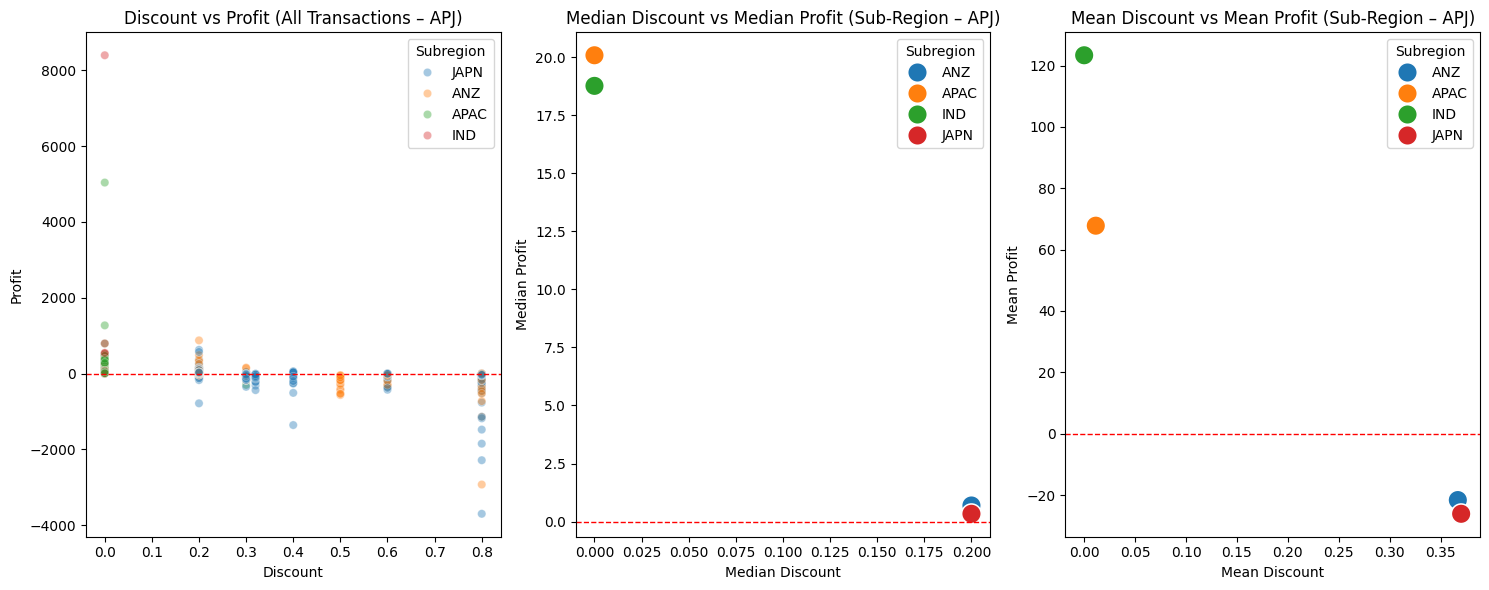

In [92]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))

# Semua transaksi APJ
sns.scatterplot(x='Discount', y='Profit',
                data=df_apj, alpha=0.4, ax=axes[0], hue='Subregion')
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].set_title('Discount vs Profit (All Transactions – APJ)')
axes[0].set_xlabel('Discount')
axes[0].set_ylabel('Profit')

# Median per subregion
sns.scatterplot(x='Median_Discount', y='Median_Profit',
                hue='Subregion', s=200, data=subregion_summary, ax=axes[1])
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].set_title('Median Discount vs Median Profit (Sub-Region – APJ)')
axes[1].set_xlabel('Median Discount')
axes[1].set_ylabel('Median Profit')

# Rata-rata per subregion
sns.scatterplot(x='Mean_Discount', y='Mean_Profit',
                hue='Subregion', s=200, data=subregion_summary, ax=axes[2])
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)
axes[2].set_title('Mean Discount vs Mean Profit (Sub-Region – APJ)')
axes[2].set_xlabel('Mean Discount')
axes[2].set_ylabel('Mean Profit')

plt.tight_layout()
plt.show()


### Ringkasan Analisis – Discount vs Profit Sub-Region (APJ)

- **APAC & IND Unggul**  
  Diskon sangat rendah (median ~0) dengan profit median & mean tinggi.

- **ANZ & JPN Lemah**  
  Diskon lebih tinggi (median ~0.18–0.20) dengan profit median sangat rendah dan mean negatif -> banyak transaksi rugi.

- **Hubungan Discount–Profit**
  - Scatter plot seluruh transaksi menunjukkan pola negatif: semakin tinggi diskon, semakin rendah profit.
  - Pada rata-rata per sub-region, **ANZ** dan **JAPN** memiliki diskon rata-rata tertinggi (~0.35) dan profit rata-rata negatif, menegaskan bahwa diskon tinggi menekan profit.
  - **APAC** dan **IND** memiliki diskon rata-rata rendah dan profit rata-rata positif.

**Kesimpulan:**  
Kerugian terbesar di APJ terutama berasal dari **JAPN** dan **ANZ**, yang memiliki margin negatif dan pengaruh diskon paling kuat. Sub-region **APAC** dan **IND** tetap sehat dan memberikan kontribusi profit positif. Fokus perbaikan strategi diskon sebaiknya diarahkan ke **JAPN** dan **ANZ**.


----

## Analisis Discount Besar dengan Profit Negatif pada Country di Subregion JAPN dan ANZ

#### APJ (Asia Pacific & Japan)

| Subregion | Countries |
|-----------|-----------|
| **JAPN** (Japan) | **Japan** |
| **ANZ** (Australia & New Zealand) | **Australia, New Zealand** |

In [57]:
df_japn = df[(df['Region']=='APJ') & (df['Subregion']=='JAPN')].copy()
df_anz  = df[(df['Region']=='APJ') & (df['Subregion']=='ANZ')].copy()

In [58]:
def country_summary(df_sub):
    return (
        df_sub.groupby('Country')
              .agg(
                  Orders=('Order ID', 'nunique'),
                  Total_Profit=('Profit', 'sum'),
                  Median_Profit_Margin=('Profit Margin', 'median'),
                  Median_Discount=('Discount', 'median'),
                  Median_Profit=('Profit', 'median'),
                  Mean_Profit_Margin=('Profit Margin', 'mean'),
                  Mean_Discount=('Discount', 'mean'),
                  Mean_Profit=('Profit', 'mean')
              )
              .reset_index()
    )

country_japn = country_summary(df_japn)
country_anz  = country_summary(df_anz)


#### **JAPN (Japan)**

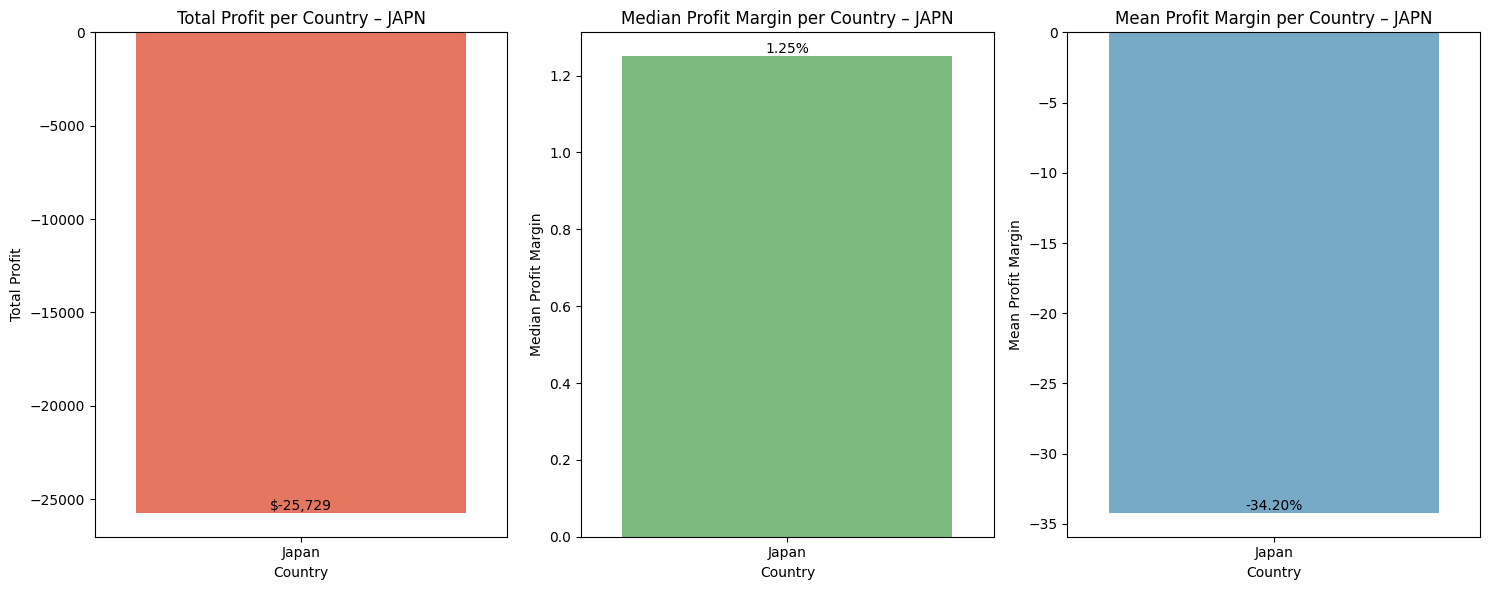

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))

sns.barplot(x='Country', y='Total_Profit', data=country_japn, palette='Reds', ax=axes[0])
axes[0].set_title('Total Profit per Country – JAPN')
axes[0].set_ylabel('Total Profit')
for p in axes[0].patches:
    axes[0].annotate(f"${p.get_height():,.0f}",
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

sns.barplot(x='Country', y='Median_Profit_Margin', data=country_japn, palette='Greens', ax=axes[1])
axes[1].set_title('Median Profit Margin per Country – JAPN')
axes[1].set_ylabel('Median Profit Margin')
for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height():,.2f}%",
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

sns.barplot(x='Country', y='Mean_Profit_Margin', data=country_japn, palette='Blues', ax=axes[2])
axes[2].set_title('Mean Profit Margin per Country – JAPN')
axes[2].set_ylabel('Mean Profit Margin')
for p in axes[2].patches:
    axes[2].annotate(f"{p.get_height():,.2f}%",
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

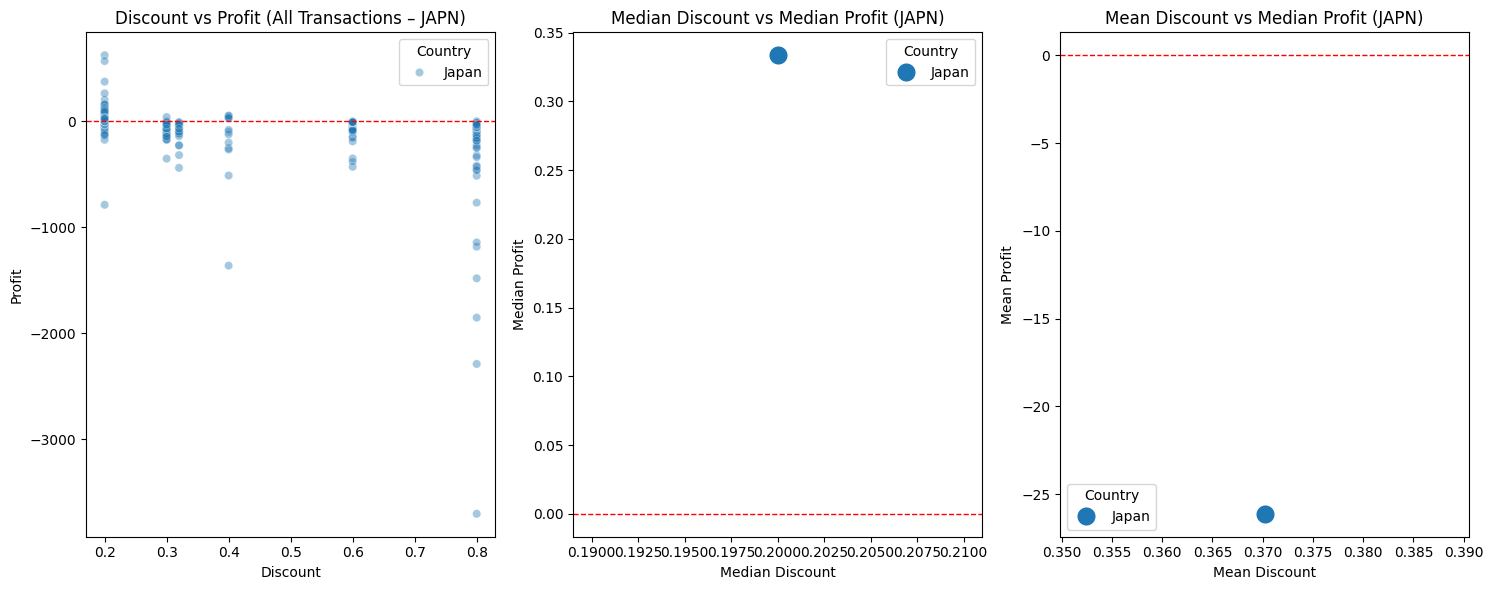

In [91]:
# Scatter Plot Discount vs profit per Country Japn
fig, axes = plt.subplots(1, 3, figsize=(15,6))

# Semua transaksi
sns.scatterplot(x='Discount', y='Profit', data=df_japn, hue='Country',
                alpha=0.4, ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].set_title('Discount vs Profit (All Transactions – JAPN)')
axes[0].set_xlabel('Discount')
axes[0].set_ylabel('Profit')

# Median per country
sns.scatterplot(x='Median_Discount', y='Median_Profit', hue='Country',
                s=200, data=country_japn, ax=axes[1])
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].set_title('Median Discount vs Median Profit (JAPN)')
axes[1].set_xlabel('Median Discount')
axes[1].set_ylabel('Median Profit')

# Rata-Rata per country
sns.scatterplot(x='Mean_Discount', y='Mean_Profit', hue='Country',
                s=200, data=country_japn, ax=axes[2])
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)
axes[2].set_title('Mean Discount vs Median Profit (JAPN)')
axes[2].set_xlabel('Mean Discount')
axes[2].set_ylabel('Mean Profit')


plt.tight_layout()
plt.show()


### Ringkasan Analisis – Japan (JPN) Discount vs Profit

- **Profit Sangat Negatif**
  - Total profit: ** -$25,729** (kerugian besar).
  - Median profit margin **hanya ±1.25%**, sedangkan mean profit margin **-34.2%** → rata-rata transaksi rugi.

- **Diskon Tinggi, Profit Rendah**
  - Median discount sekitar **0.2 (20%)** dan mean discount **~0.37 (37%)**.
  - Scatter plot menunjukkan **semua transaksi dengan diskon ≥ 20% didominasi profit negatif**, beberapa hingga ribuan dolar kerugian.

#### Analisis & Implikasi
- Kombinasi **diskon agresif** sangat menekan profit.
- Median margin mendekati nol menandakan hanya sedikit transaksi untung kecil, sedangkan sebagian besar rugi besar -> **kerugian sistemik**.

#### Rekomendasi & Tindak Lanjut
- **Perbaikan kebijakan diskon**: batasi diskon ≤20% dan hentikan promosi besar yang merugikan.
- **Fokus pemulihan profit**: JPN perlu jadi **prioritas utama** perbaikan dalam region APJ.

**Kesimpulan:**
Japan merupakan satu-satu nya negara di Subregion JAPN dengan **kontributor kerugian terbesar** akibat diskon tinggi dan profit negatif yang mendalam.

---
#### **ANZ (Australia, New Zealand)**

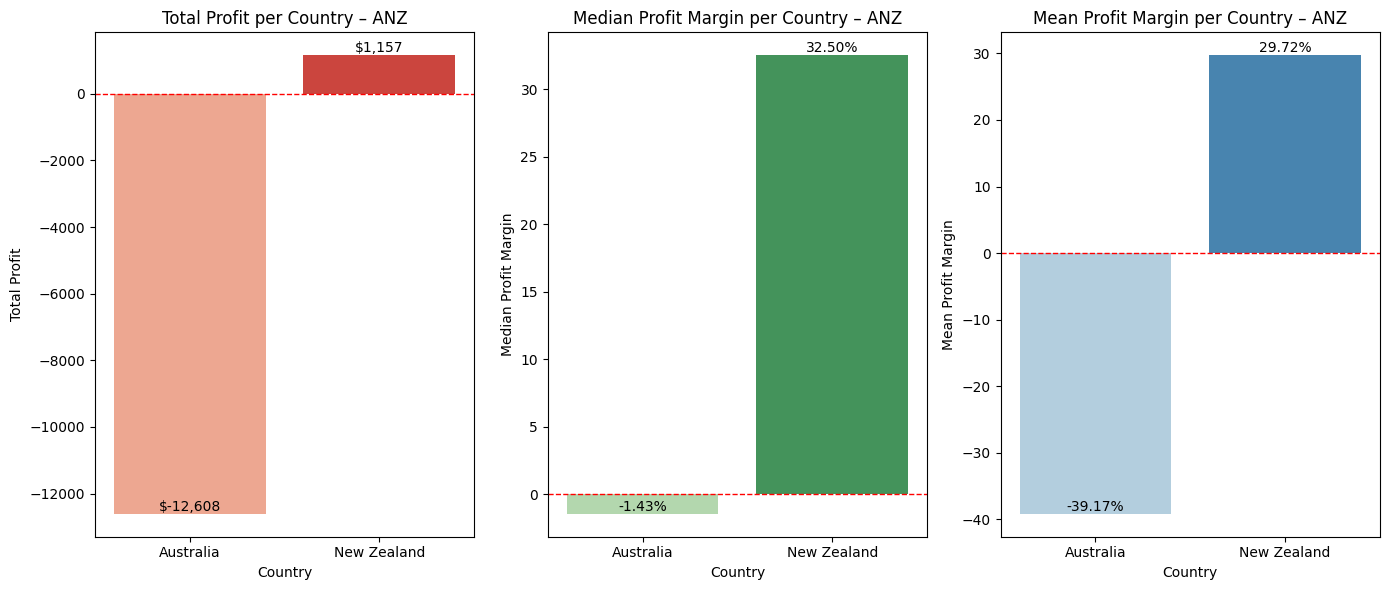

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(14,6))

sns.barplot(x='Country', y='Total_Profit', data=country_anz, palette='Reds', ax=axes[0])
axes[0].set_title('Total Profit per Country – ANZ')
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].set_ylabel('Total Profit')
for p in axes[0].patches:
    axes[0].annotate(f"${p.get_height():,.0f}",
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

sns.barplot(x='Country', y='Median_Profit_Margin', data=country_anz, palette='Greens', ax=axes[1])
axes[1].set_title('Median Profit Margin per Country – ANZ')
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].set_ylabel('Median Profit Margin')
for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height():,.2f}%",
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

sns.barplot(x='Country', y='Mean_Profit_Margin', data=country_anz, palette='Blues', ax=axes[2])
axes[2].set_title('Mean Profit Margin per Country – ANZ')
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)
axes[2].set_ylabel('Mean Profit Margin')
for p in axes[2].patches:
    axes[2].annotate(f"{p.get_height():,.2f}%",
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### Analisis – Profit & Profit Margin (ANZ: Australia & New Zealand)

- **Australia Merugi Besar**
  - Total profit: **-\$12,608**.
  - Median profit margin **-1.43%** dan mean margin **-39.17%** → mayoritas transaksi rugi.
- **New Zealand Menguntungkan**
  - Total profit: **$1,157**.
  - Margin sehat: median **32.5%**, mean **29.7%** → transaksi rata-rata menghasilkan profit.

#### Analisis & Implikasi
- Performa Australia menekan kinerja sub-region ANZ secara keseluruhan.
- New Zealand menjadi **penopang positif**, menunjukkan strategi harga dan diskon yang lebih baik.


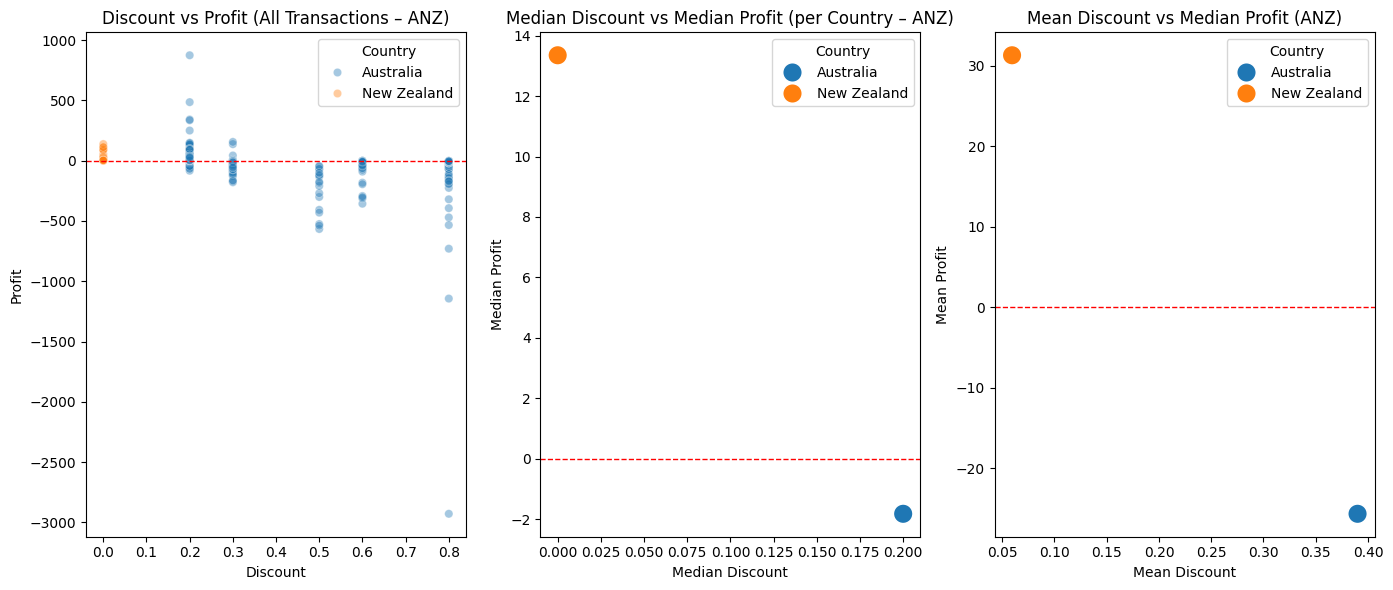

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(14,6))

# Semua transaksi
sns.scatterplot(x='Discount', y='Profit', data=df_anz, hue='Country',
                alpha=0.4, ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].set_title('Discount vs Profit (All Transactions – ANZ)')
axes[0].set_xlabel('Discount')
axes[0].set_ylabel('Profit')

# Rata-rata per country
sns.scatterplot(x='Median_Discount', y='Median_Profit', hue='Country',
                s=200, data=country_anz, ax=axes[1])
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].set_title('Median Discount vs Median Profit (per Country – ANZ)')
axes[1].set_xlabel('Median Discount')
axes[1].set_ylabel('Median Profit')

sns.scatterplot(x='Mean_Discount', y='Mean_Profit', hue='Country',
                s=200, data=country_anz, ax=axes[2])
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)
axes[2].set_title('Mean Discount vs Median Profit (ANZ)')
axes[2].set_xlabel('Mean Discount')
axes[2].set_ylabel('Mean Profit')

plt.tight_layout()
plt.show()




### Analisis – Discount vs Profit (ANZ: Australia & New Zealand)

- **Australia: Diskon Tinggi -> Profit Negatif**
  - Median discount **~0.2 (20%)**, mean discount **~0.37 (37%)**.
  - Scatter plot menunjukkan **semakin tinggi diskon, semakin besar kerugian**, beberapa transaksi rugi hingga ribuan dolar.
  - Median profit **-1.4%**, mean profit margin **-39%**, dengan total profit: **-$12,608** -> indikasi masalah sistemik dalam kebijakan diskon.

- **New Zealand: Diskon Sangat Rendah → Profit Stabil**
  - Median dan mean discount mendekati **0**.
  - Median profit margin **32.5%**, mean margin **29.7%**, total profit **≈ $1,157** → strategi harga & diskon sehat, sebagian besar transaksi untung.

#### Implikasi & Rekomendasi
- **Prioritas Perbaikan: Australia**  
  Evaluasi dan kurangi diskon besar yang menekan profit. Perbaiki pricing dan efisiensi biaya agar margin positif.
  
- **Pertahankan & Replikasi Keberhasilan: New Zealand**  
  Strategi diskon rendah yang menjaga profit tinggi bisa dijadikan model perbaikan untuk Australia maupun sub-region lain.

**Kesimpulan:**  
Kerugian ANZ sebagian besar berasal dari **Australia** akibat kebijakan diskon yang terlalu agresif, sementara **New Zealand menjadi penopang positif** yang harus dijaga dan bisa menjadi benchmark untuk perbaikan.


---
### **Kesimpulan Sub-Region APJ dan ANZ**

#### Sub-Region JPN
- **Kondisi Profit**  
  - Total profit: **–$25,729** dengan mean profit margin **–34.2%**.  
  - Diskon **tinggi (median ±20%, mean ±37%)** -> mayoritas transaksi rugi.
- **Penyebab Utama**  
  - Korelasi negatif kuat antara diskon dan profit; hampir semua transaksi berdiskon tinggi menghasilkan kerugian.

#### Sub-Region ANZ
- **Kondisi Profit**  
  - **Australia**: total profit: **–\$12,608**, mean profit margin **–39%**, median discount **±20%** -> pola rugi serupa JPN.  
  - **New Zealand**: profit positif: **$1,157**, median/mean discount hampir **0**, margin sehat (**median 32.5%**).
- **Penyebab Utama**  
  - Australia mengalami kerugian sistemik karena diskon besar; New Zealand justru menjadi contoh strategi harga dan diskon yang baik.


#### Fokus Lanjutan Analisis Produk & Segmen
- **Prioritas Negara**  
  - **Japan (JPN)** dan **Australia (ANZ)** adalah **negara kritis** karena kerugian besar dan diskon tinggi.
- **Langkah Berikutnya**  
  - Lakukan **analisis mendalam pada level produk dan customer segment** khusus di **Japan** dan **Australia**:
    - Identifikasi produk & segmen pelanggan yang memberikan profit rendah/negatif.
    - Identifikasi proporsi penjualan produk & segmen pelanggan yang menghasilkan profit negatif dan positif.

**Kesimpulan Utama:**  
**Japan dan Australia harus menjadi fokus analisis lanjutan** pada level produk & segmen pelanggan untuk menghentikan kerugian, sementara keberhasilan **New Zealand dan APAC/IND** dapat dijadikan benchmark kebijakan harga dan diskon.


----

## `Identifikasi Produk dan Segment Customer yang menghasilkan profit Negatif di Negara Jepang & Australia`

In [62]:
import folium
import requests

# Filter data untuk Jepang dan Australia
df_folium_japan = df[(df['Region']=='APJ') & (df['Subregion']=='JAPN') & (df['Country']=='Japan')].copy()
df_folium_aus = df[(df['Region']=='APJ') & (df['Subregion']=='ANZ') & (df['Country']=='Australia')].copy()

# --- Data ringkasan untuk Jepang
total_profit_jpn = df_folium_japan['Profit'].sum()
total_qty_jpn = df_folium_japan['Quantity'].sum()
median_margin_jpn = df_folium_japan['Profit Margin'].median()
mean_margin_jpn   = df_folium_japan['Profit Margin'].mean()

# --- Data ringkasan untuk Australia
total_profit_aus = df_folium_aus['Profit'].sum()
total_qty_aus = df_folium_aus['Quantity'].sum()
median_margin_aus = df_folium_aus['Profit Margin'].median()
mean_margin_aus   = df_folium_aus['Profit Margin'].mean()

# --- 2. Pusat peta untuk Australia dan Jepang
# Koordinat untuk Australia dan Jepang
australia_center = [-25.2744, 133.7751]
japan_center = [36.2048, 138.2529]

# Menentukan peta dengan zoom out yang bisa menunjukkan keduanya
m = folium.Map(location=[(australia_center[0] + japan_center[0]) / 2,
                         (australia_center[1] + japan_center[1]) / 2],
               zoom_start=4, tiles='CartoDB positron')

# --- 3. Ambil GeoJSON negara untuk Australia dan Jepang
geojson_url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
geojson_data = requests.get(geojson_url).json()

# Filter untuk Jepang dan Australia
countries_geo = {
    "type": "FeatureCollection",
    "features": [
        f for f in geojson_data['features'] if f['properties']['name'] in ['Japan', 'Australia']
    ]
}

# --- 4. Tambahkan outline merah perbatasan Jepang dan Australia
folium.GeoJson(
    countries_geo,
    name="Country Border",
    style_function=lambda x: {
        'fillColor': 'transparent',
        'color': 'red',
        'weight': 2
    }
).add_to(m)

# --- 5. Tooltip ringkasan untuk Jepang
tooltip_html_jpn = (
    f"<b>Japan</b><br>"
    f"Total Profit: ${total_profit_jpn:,.0f}<br>"
    f"Jumlah Penjualan Produk: {total_qty_jpn:.0f}<br>"
    f"Median Profit Margin: {median_margin_jpn*100:.1f}%<br>"
)

# --- 6. Tooltip ringkasan untuk Australia
tooltip_html_aus = (
    f"<b>Australia</b><br>"
    f"Total Profit: {total_profit_aus:,.0f}<br>"
    f"Jumlah Penjualan Produk: {total_qty_aus:.0f}<br>"
    f"Median Profit Margin: {median_margin_aus*100:.1f}%<br>"
)

# --- 7. Circle marker untuk Jepang
folium.CircleMarker(
    location=japan_center,
    radius=16,
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.7,
    tooltip=tooltip_html_jpn
).add_to(m)

# --- 8. Circle marker untuk Australia
folium.CircleMarker(
    location=australia_center,
    radius=16,
    color='blue',
    fill=True,
    fill_color='blue',
    fill_opacity=0.7,
    tooltip=tooltip_html_aus
).add_to(m)

# --- 9. Tampilkan peta
m

# (Opsional) Simpan ke file HTML
# m.save("japan_australia_profit_map_with_borders.html")


## **JAPAN**

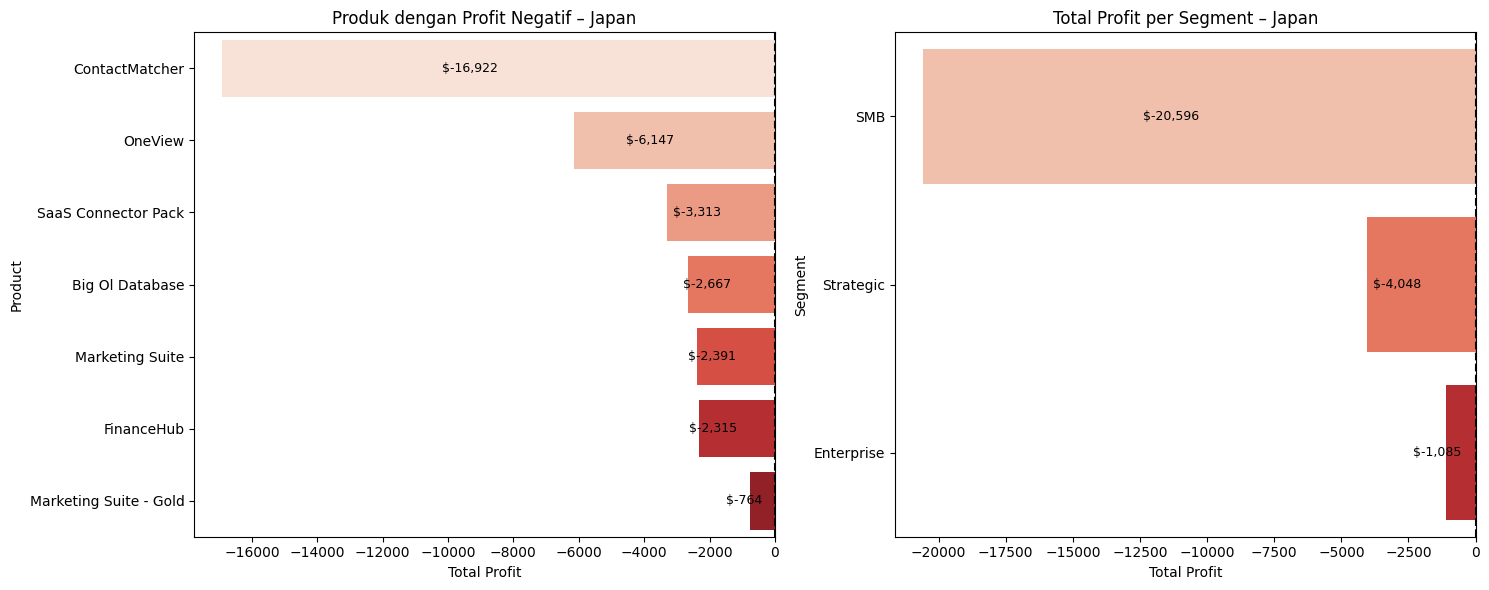

In [63]:

df_japan = df[
    (df['Region'] == 'APJ') &
    (df['Subregion'] == 'JAPN') &
    (df['Country'] == 'Japan')
    #(df['Profit'] <= 0)
].copy()

top_japan_loss = (
    df_japan.groupby('Product', as_index=False)
            .agg(Total_Profit=('Profit','sum'))
            .sort_values('Total_Profit')
            .head(7)
)

# Untuk Japan
segment_profit_japan = (
    df_japan.groupby('Segment', as_index=False)
            .agg(Total_Profit=('Profit','sum'))
            .sort_values('Total_Profit', ascending=True)
)

fig, axes = plt.subplots(1, 2, figsize=(15,6), sharex=False)

# --- Produk dengan Profit Negatif Tertinggi – Japan ---
sns.barplot(
    x='Total_Profit', y='Product',
    data=top_japan_loss, palette='Reds', ax=axes[0]
)
axes[0].axvline(0, color='black', linestyle='--')
axes[0].set_title("Produk dengan Profit Negatif – Japan")
axes[0].set_xlabel("Total Profit")

for i, (val, label) in enumerate(zip(top_japan_loss['Total_Profit'],
                                     top_japan_loss['Product'])):
    axes[0].text(
        x=val/2,
        y=i,
        s=f"${val:,.0f}",
        va='center',
        ha='left' if val >= 0 else 'right',
        color='black',
        fontsize=9
    )

# --- Total Profit per Segment – Japan ---
sns.barplot(
    x='Total_Profit', y='Segment',
    data=segment_profit_japan, palette='Reds', ax=axes[1]
)
axes[1].axvline(0, color='black', linestyle='--')
axes[1].set_title("Total Profit per Segment – Japan")
axes[1].set_xlabel("Total Profit")

for i, (val, label) in enumerate(zip(segment_profit_japan['Total_Profit'],
                                     segment_profit_japan['Segment'])):
    axes[1].text(
        x=val/2,
        y=i,
        s=f"${val:,.0f}",
        va='center',
        ha='left' if val >= 0 else 'right',
        color='black',
        fontsize=9
    )

plt.tight_layout()
plt.show()


#### Insight dari Visualisasi Profit:

1. **Profit Negatif Berdasarkan Produk**:
   - Produk "ContactMatcher" mencatatkan profit negatif terbesar sebesar **-\$16,922** diikuti oleh "OneView" dengan **-$6,147**. Ini menunjukkan bahwa kedua produk tersebut berkinerja buruk.
   - Produk lainnya seperti "SaaS Connector Pack" dan "Big OI Database" juga menunjukkan profit negatif, meskipun dengan angka yang lebih kecil.

2. **Total Profit per Segmen**:
   - Segmen **SMB** paling terpengaruh dengan total kerugian sebesar **\$-20,596**, menunjukkan bahwa segmen ini mungkin perlu ditinjau ulang atau ada perubahan strategi penjualan atau harga yang perlu dilakukan.
   - Segmen **Strategic** mengalami kerugian lebih kecil sebesar **\$-4,048**, sedangkan segmen **Enterprise** relatif lebih sedikit terpengaruh dengan kerugian sebesar **$-1,085**.

#### Kesimpulan:
Visualisasi ini menunjukkan bahwa baik produk tertentu maupun segmen pelanggan memberikan kontribusi besar terhadap angka profit negatif, khususnya pada segmen SMB dan Strategic. Langkah-langkah yang ditargetkan untuk meninjau kembali tawaran produk dan strategi harga, khususnya di segmen SMB, mungkin diperlukan untuk mengurangi kerugian ini.


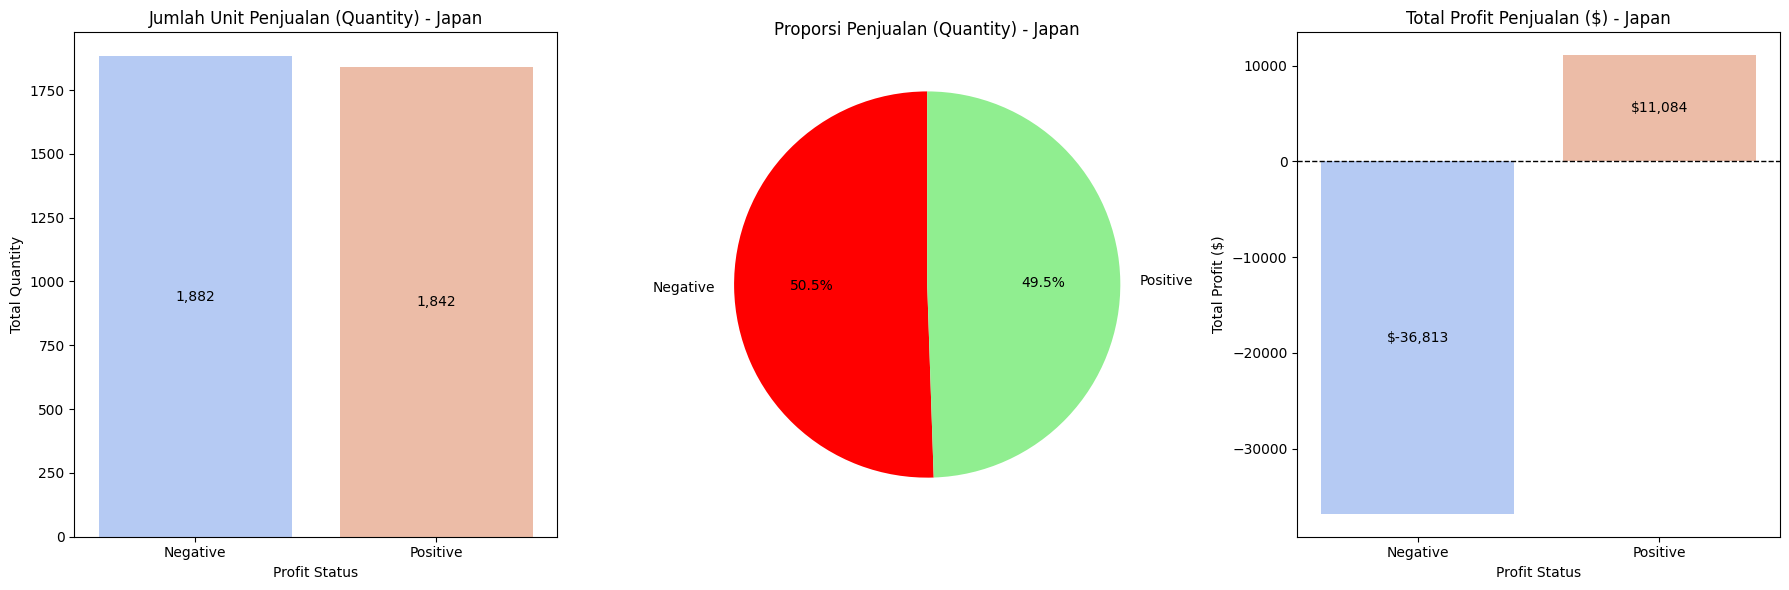

In [64]:
# --- Kategori Profit (Positive / Negative) ---
df_japan['Profit_Status'] = df_japan['Profit'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
order = ['Negative', 'Positive']  # supaya warna & urutan konsisten

# --- Jumlah unit (Quantity) per Profit_Status ---
sum_qty_status = (
    df_japan.groupby('Profit_Status', as_index=False)['Quantity'].sum()
            .set_index('Profit_Status').reindex(order).reset_index()
            .rename(columns={'Quantity': 'Total_Quantity'})
)

# --- Proporsi unit (berdasar Quantity) ---
total_qty = sum_qty_status['Total_Quantity'].sum()
prop_qty_status = sum_qty_status.assign(Proportion = sum_qty_status['Total_Quantity'] / total_qty)

# --- Total (sum) profit per Profit_Status ---
sum_profit_status = (
    df_japan.groupby('Profit_Status', as_index=False)['Profit'].sum()
            .set_index('Profit_Status').reindex(order).reset_index()
            .rename(columns={'Profit': 'Total_Profit'})
)

# --- Visualisasi: 3 Subplot ---
fig, axes = plt.subplots(1, 3, figsize=(18,6))

# 1) Bar: Jumlah UNIT (Quantity) per Profit_Status
sns.barplot(
    x='Profit_Status', y='Total_Quantity',
    data=sum_qty_status, order=order,
    palette='coolwarm', ax=axes[0]
)
axes[0].set_title('Jumlah Unit Penjualan (Quantity) - Japan')
axes[0].set_xlabel('Profit Status'); axes[0].set_ylabel('Total Quantity')
for p in axes[0].patches:
    axes[0].text(
        p.get_x() + p.get_width()/2, p.get_height()/2,
        f"{int(p.get_height()):,}",
        ha='center', va='center'
    )

# 2) Pie: Proporsi UNIT (Quantity) per Profit_Status
axes[1].pie(
    prop_qty_status['Proportion'],
    labels=prop_qty_status['Profit_Status'],
    autopct='%1.1f%%',
    colors=['red', 'lightgreen'],
    startangle=90
)
axes[1].set_title('Proporsi Penjualan (Quantity) - Japan')

# 3) Bar: Total PROFIT per Profit_Status
sns.barplot(
    x='Profit_Status', y='Total_Profit',
    data=sum_profit_status, order=order,
    palette='coolwarm', ax=axes[2]
)
axes[2].axhline(0, color='black', linestyle='--', linewidth=1)
axes[2].set_title('Total Profit Penjualan ($) - Japan')
axes[2].set_xlabel('Profit Status'); axes[2].set_ylabel('Total Profit ($)')
for p in axes[2].patches:
    axes[2].text(
        p.get_x() + p.get_width()/2, p.get_height()/2,
        f"${p.get_height():,.0f}",
        ha='center', va='center'
    )

plt.tight_layout()
plt.show()

#### Insight dari Visualisasi Data Penjualan Jepang

1. **Jumlah Unit Penjualan**:
   - Penjualan produk dengan profit negatif (1,882 unit) hampir setara dengan yang positif (1,842 unit).
   - **Insight**: Volume penjualan serupa, namun profit negatif lebih tinggi, menunjukkan adanya masalah di struktur biaya atau harga produk.

2. **Proporsi Penjualan**:
   - Produk dengan profit negatif: 50.5%, positif: 49.5%.
   - **Insight**: Proporsi hampir seimbang, namun setengah produk menghasilkan kerugian, menunjukkan perlunya optimasi biaya atau harga.

3. **Total Profit**:
   - Profit positif: \$11,084, kerugian negatif: $36,813.
   - **Insight**: Kerugian pada produk dengan profit negatif jauh lebih besar dari profit positif, menandakan perlunya evaluasi lebih dalam pada produk yang merugi.

**Kesimpulan:**

Meskipun jumlah unit yang terjual hampir seimbang antara produk dengan profit positif dan negatif, produk dengan profit negatif menyebabkan kerugian yang signifikan. Perlu adanya evaluasi lebih mendalam pada biaya produksi dan strategi harga untuk mengurangi kerugian dan meningkatkan profitabilitas.

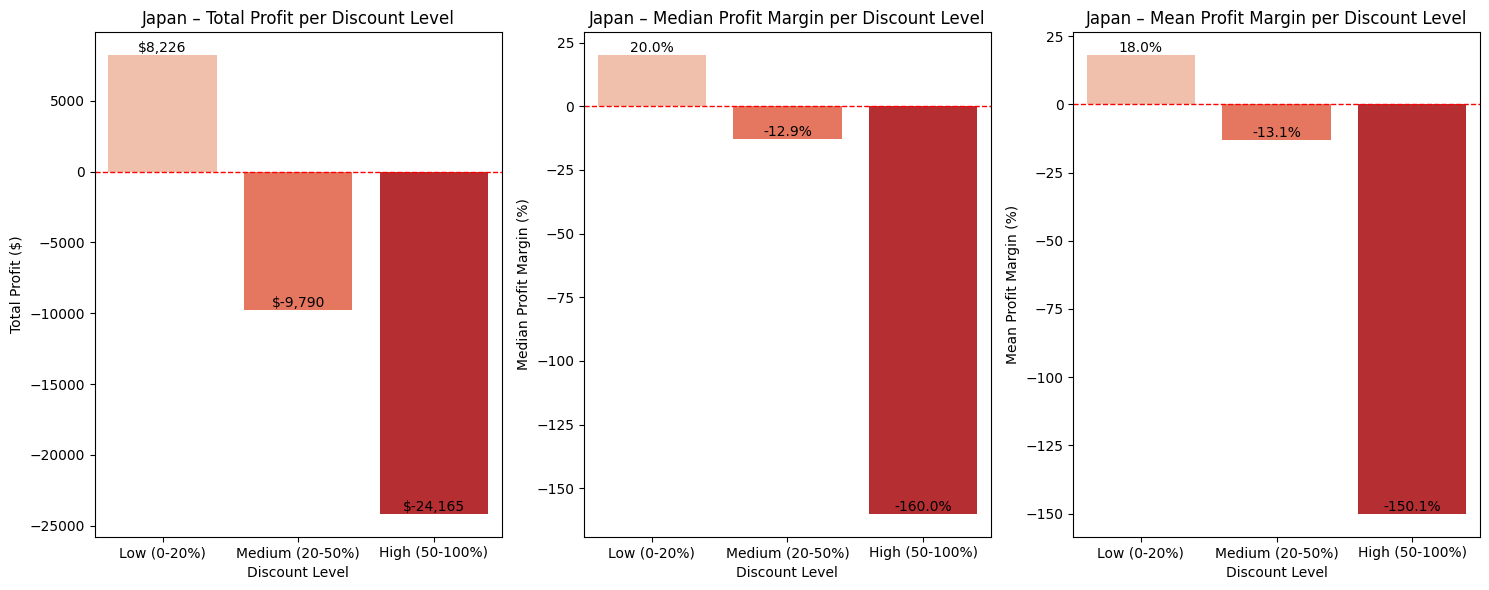

In [66]:
# --- Ringkasan per Discount Level (khusus Japan) ---
total_profit_japan = (
    df_japan.groupby('Discount_Level')['Profit']
            .sum()
            .reindex(labels)
            .reset_index()
)

median_margin_japan = (
    df_japan.groupby('Discount_Level')['Profit Margin']
            .median()
            .reindex(labels)
            .reset_index()
)

mean_margin_japan = (
    df_japan.groupby('Discount_Level')['Profit Margin']
            .mean()
            .reindex(labels)
            .reset_index()
)

# --- Visualisasi ---
fig, axes = plt.subplots(1, 3, figsize=(15,6))

# Panel 1: Total Profit per Discount Level
sns.barplot(x='Discount_Level', y='Profit', hue='Discount_Level',
            data=total_profit_japan, ax=axes[0], palette='Reds')
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].set_title("Japan – Total Profit per Discount Level")
axes[0].set_xlabel("Discount Level")
axes[0].set_ylabel("Total Profit ($)")

for p in axes[0].patches:
    axes[0].annotate(f"${p.get_height():,.0f}",
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

# Panel 2: Median Profit Margin per Discount Level
sns.barplot(x='Discount_Level', y='Profit Margin', hue='Discount_Level',
            data=median_margin_japan, ax=axes[1], palette='Reds')
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].set_title("Japan – Median Profit Margin per Discount Level")
axes[1].set_xlabel("Discount Level")
axes[1].set_ylabel("Median Profit Margin (%)")

for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height():.1f}%",
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

# Panel 3: Mean Profit Margin per Discount Level
sns.barplot(x='Discount_Level', y='Profit Margin', hue='Discount_Level',
            data=mean_margin_japan, ax=axes[2], palette='Reds')
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)
axes[2].set_title("Japan – Mean Profit Margin per Discount Level")
axes[2].set_xlabel("Discount Level")
axes[2].set_ylabel("Mean Profit Margin (%)")

for p in axes[2].patches:
    axes[2].annotate(f"{p.get_height():.1f}%",
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


#### Insight dari Visualisasi Profit Margin dan Profit Total per Level Diskon di Jepang

- **Total Profit**:
  - Pada level diskon **Low (0-20%)**, total profit sebesar **\$8,226**.
  - Pada level diskon **Medium (20-50%)**, total profit menunjukkan angka **negatif** sebesar **-\$9,790**.
  - Pada level diskon **High (50-100%)**, total profit mengalami penurunan yang signifikan, yaitu **-$24,165**.

- **Median Profit Margin**:
  - Pada level diskon **Low (0-20%)**, margin keuntungan median adalah **20%**.
  - Pada level diskon **Medium (20-50%)**, margin keuntungan median menjadi **-12.9%**.
  - Pada level diskon **High (50-100%)**, margin keuntungan median sangat rendah, yaitu **-12.9%**.

- **Mean Profit Margin**:
  - Pada level diskon **Low (0-20%)**, margin keuntungan rata-rata mencapai **18%**.
  - Pada level diskon **Medium (20-50%)**, margin keuntungan rata-rata menunjukkan angka negatif, yaitu **-13.1%**.
  - Pada level diskon **High (50-100%)**, margin keuntungan rata-rata sangat negatif, yaitu **-160.0%**.

**Kesimpulan:**

Pemberian diskon tinggi (**50-100%**) menyebabkan penurunan yang sangat tajam dalam keuntungan, baik dalam hal total profit maupun margin keuntungan. Oleh karena itu, penting untuk lebih berhati-hati dalam memberikan diskon pada level tinggi karena dapat berisiko merugikan perusahaan.


---

### **Analisis Segment Customer Japan**

- **Enterprise**  
  Perusahaan besar dengan skala global atau nasional, memiliki kebutuhan kompleks, volume transaksi tinggi, dan memerlukan solusi yang dapat diintegrasikan lintas divisi serta mendukung kustomisasi mendalam.

- **Strategic**  
  Perusahaan menengah hingga besar yang menjadi **akun prioritas** (key accounts) karena potensi pertumbuhan dan nilai strategisnya tinggi. Biasanya membutuhkan solusi yang fleksibel dan dukungan khusus.

- **SMB (Small and Medium Business)**  
  Usaha kecil dan menengah dengan tim serta anggaran lebih terbatas. Fokus pada solusi yang **cepat diimplementasikan, efisien, dan hemat biaya**, namun tetap dapat berkembang seiring pertumbuhan bisnis.


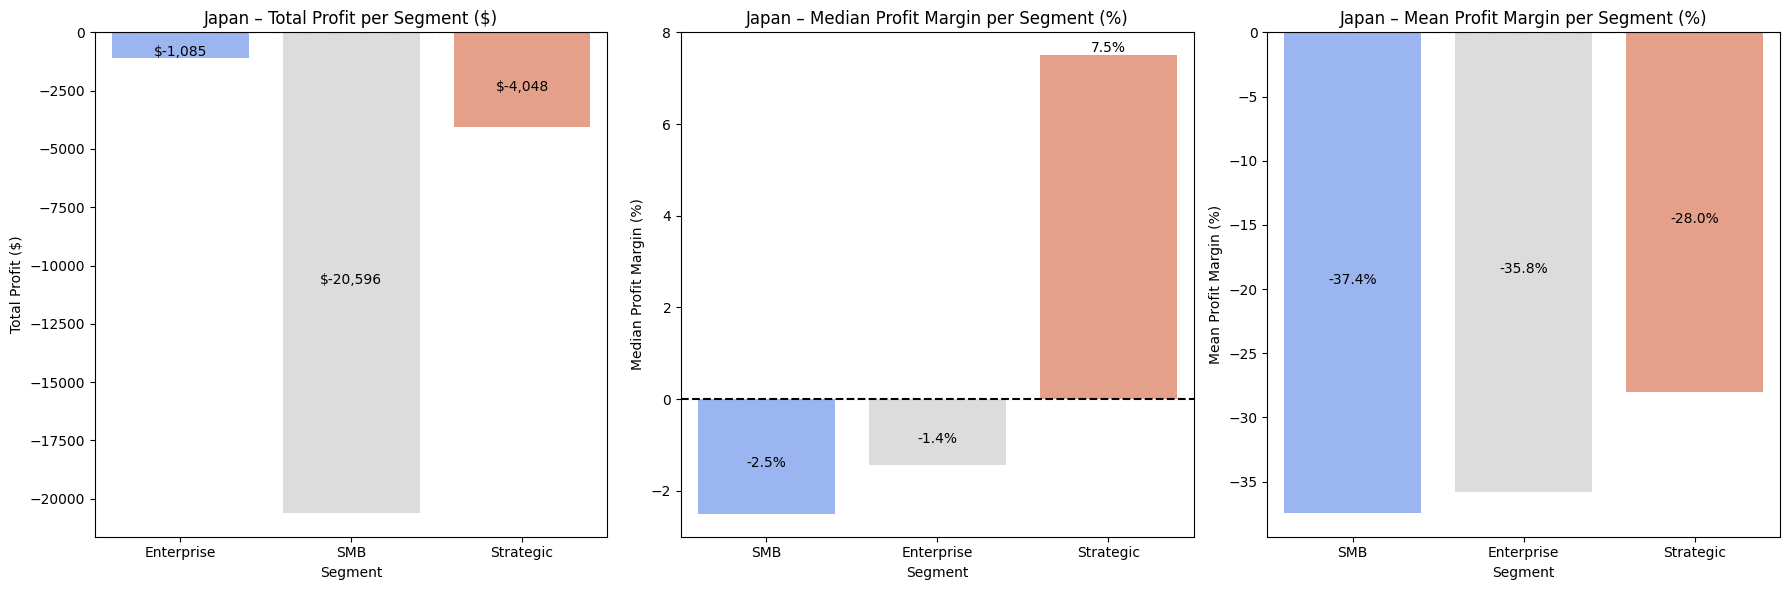

In [67]:
# --- Data: Profit Margin per Segment ---
segment_margin_japan = (
    df_japan.groupby('Segment', as_index=False)
            .apply(lambda g: pd.Series({
                'Median_Profit_Margin': (g['Profit']/g['Sales']).median()*100,
                'Mean_Profit_Margin':   (g['Profit']/g['Sales']).mean()*100
            }))
            .sort_values('Mean_Profit_Margin')
)

# --- Data: Total Profit per Segment ---
total_profit_segment_japan = (
    df_japan.groupby('Segment', as_index=False)['Profit']
            .sum()
            .rename(columns={'Profit': 'Total_Profit'})
)

# --- Visualisasi: 3 Bar Top-Bottom (Segment di X-axis) ---
fig, axes = plt.subplots(1, 3, figsize=(18,6))

# === Total Profit per Segment ===
sns.barplot(
    x='Segment', y='Total_Profit',
    data=total_profit_segment_japan, palette='coolwarm', ax=axes[0]
)
axes[0].axhline(0, color='black', linestyle='--')
axes[0].set_title('Japan – Total Profit per Segment ($)')
axes[0].set_xlabel('Segment')
axes[0].set_ylabel('Total Profit ($)')

# Anotasi di atas batang
for p in axes[0].patches:
    axes[0].text(
        p.get_x() + p.get_width()/2,
        p.get_height()/2 if p.get_height() < 0 else p.get_height(),
        f"${p.get_height():,.0f}",
        ha='center',
        va='bottom' if p.get_height() >= 0 else 'top'
    )

# === Median Profit Margin ===
sns.barplot(
    x='Segment', y='Median_Profit_Margin',
    data=segment_margin_japan, palette='coolwarm', ax=axes[1]
)
axes[1].axhline(0, color='black', linestyle='--')
axes[1].set_title('Japan – Median Profit Margin per Segment (%)')
axes[1].set_xlabel('Segment')
axes[1].set_ylabel('Median Profit Margin (%)')

# Anotasi di atas batang
for p in axes[1].patches:
    axes[1].text(
        p.get_x() + p.get_width()/2,
        p.get_height()/2 if p.get_height() < 0 else p.get_height(),
        f"{p.get_height():.1f}%",
        ha='center',
        va='bottom' if p.get_height() >= 0 else 'top'
    )

# === Mean Profit Margin ===
sns.barplot(
    x='Segment', y='Mean_Profit_Margin',
    data=segment_margin_japan, palette='coolwarm', ax=axes[2]
)
axes[2].axhline(0, color='black', linestyle='--')
axes[2].set_title('Japan – Mean Profit Margin per Segment (%)')
axes[2].set_xlabel('Segment')
axes[2].set_ylabel('Mean Profit Margin (%)')

# Anotasi di atas batang
for p in axes[2].patches:
    axes[2].text(
        p.get_x() + p.get_width()/2,
        p.get_height()/2 if p.get_height() < 0 else p.get_height(),
        f"{p.get_height():.1f}%",
        ha='center',
        va='bottom' if p.get_height() >= 0 else 'top'
    )


plt.tight_layout()
plt.show()

#### Insight dari Analisis Profit dan Margin

1. **Total Profit**:
   - Segment *SMB* memiliki total profit tertinggi dengan **-\$4,048**, sementara segment *Enterprise* dan *Strategic* masing-masing memiliki **-\$20,596** dan **-$1,085**.
   - Ini menunjukkan bahwa segment *SMB* memiliki kerugian terkecil dibandingkan dengan segment lainnya.

2. **Median Profit Margin**:
   - Segment *Strategic* menunjukkan **7,5% median profit margin**, menjadikannya yang paling menguntungkan berdasarkan ukuran ini.
   - Segment *SMB* memiliki **-2,5%** median profit margin, sementara segment *Enterprise* memiliki **-1,4%** yang sedikit lebih buruk.

3. **Mean Profit Margin**:
   - Segment *SMB* menunjukkan mean profit margin terburuk dengan **-37,4%**, yang menunjukkan **kerugian yang sangat tinggi** dibandingkan dengan segment lainnya.
   - Segment *Enterprise* dan *Strategic* masing-masing memiliki mean profit margin **-35,8%** dan **-28,0%**.

Segment *SMB* memiliki **kerugian profit yang sangat tinggi**, terutama terlihat pada mean profit margin yang mencapai **-37,4%**, yang menunjukkan adanya ketidaksesuaian besar dalam profit dibandingkan dengan segment lainnya. Segment *Strategic* meskipun menunjukkan profitabilitas yang lebih baik, namun segment *SMB* memerlukan perhatian serius untuk mengurangi kerugiannya dan meningkatkan profitabilitasnya.


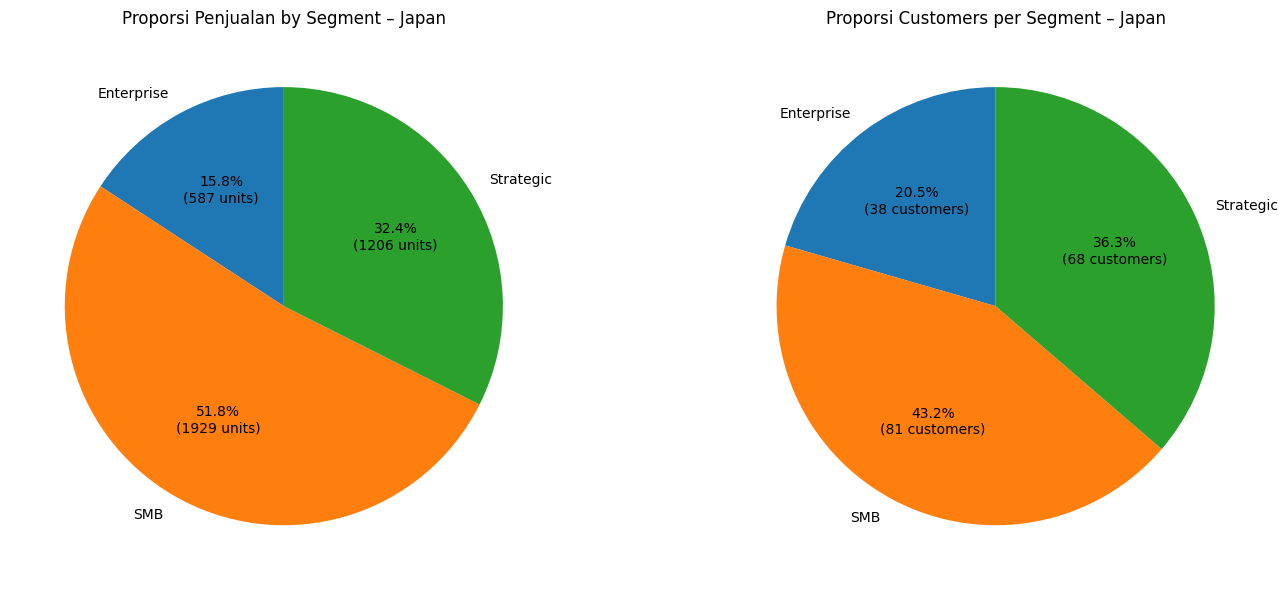

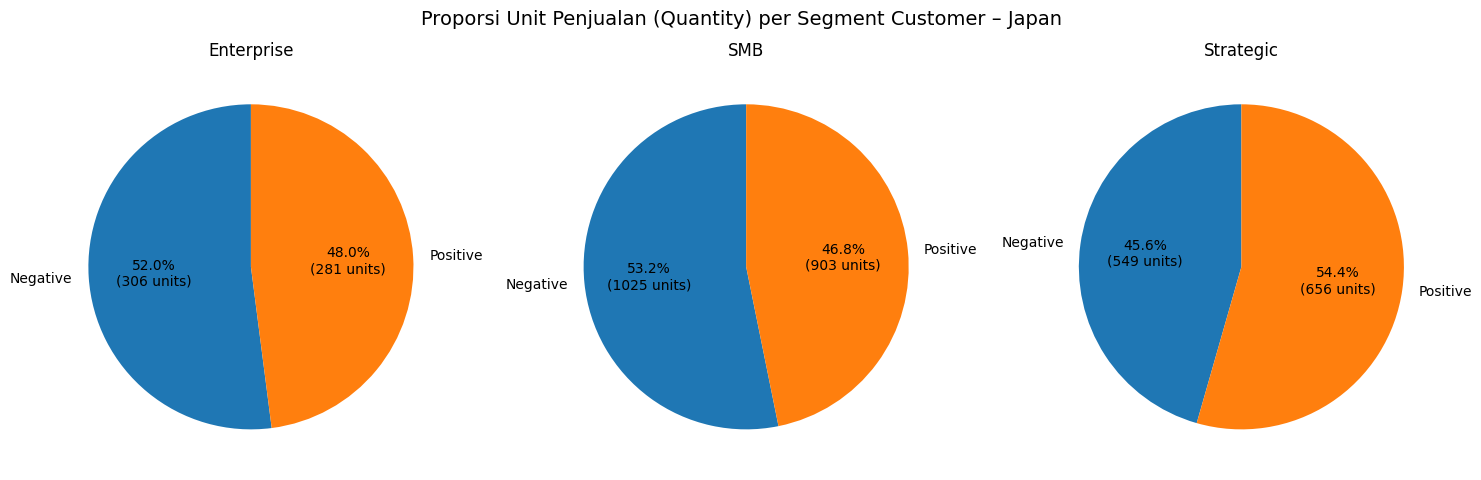

In [69]:
# --- Data: Quantity per Segment di Jepang ---
qty_segment_japan = (
    df_japan.groupby(['Segment'], as_index=False)['Quantity']
            .sum()
)

# --- Data: Jumlah Customer per Segment di Jepang ---
customer_segment_japan = (
    df_japan.groupby(['Segment'], as_index=False)['Customer ID']
            .nunique()
            .rename(columns={'Customer ID': 'Customer_Count'})
)

# --- Visualisasi: Pie Chart Proportion Quantity & Customer per Segment ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- 1. Pie Chart Proportion Quantity per Segment ---
axes[0].pie(
    qty_segment_japan['Quantity'],
    labels=qty_segment_japan['Segment'],
    autopct=lambda p: f'{p:.1f}%\n({int(p * qty_segment_japan["Quantity"].sum() / 100)} units)',
    startangle=90
)
axes[0].set_title("Proporsi Penjualan by Segment – Japan")

# --- 2. Pie Chart Proportion Customer Count per Segment ---
axes[1].pie(
    customer_segment_japan['Customer_Count'],
    labels=customer_segment_japan['Segment'],
    autopct=lambda p: f'{p:.1f}%\n({int(p * customer_segment_japan["Customer_Count"].sum() / 100)} customers)',
    startangle=90
)
axes[1].set_title("Proporsi Customers per Segment – Japan")

# Menampilkan plot
plt.tight_layout()
plt.show()

# --- Data: Quantity Positif dan Negatif per Segment di Jepang ---
qty_segment_japan = (
    df_japan.groupby(['Segment', 'Profit_Status'], as_index=False)['Quantity']
            .sum()
)

# --- Visualisasi: Pie Chart Proportion Positif vs Negatif Quantity per Segment ---
segments = qty_segment_japan['Segment'].unique()
fig, axes = plt.subplots(1, len(segments), figsize=(5*len(segments), 5))

if len(segments) == 1:
    axes = [axes]  # agar iterable walau hanya 1 segment

# Loop untuk masing-masing segment
for ax, seg in zip(axes, segments):
    subset = qty_segment_japan[qty_segment_japan['Segment'] == seg]

    # Pie chart untuk quantity positif vs negatif per segment
    ax.pie(
        subset['Quantity'],
        labels=subset['Profit_Status'],
        autopct=lambda p: f'{p:.1f}%\n({int(p * subset["Quantity"].sum() / 100)} units)',
        startangle=90
    )
    ax.set_title(f"{seg}", fontsize=12)

# Menambahkan judul utama
plt.suptitle("Proporsi Unit Penjualan (Quantity) per Segment Customer – Japan", fontsize=14)
plt.tight_layout()
plt.show()

#### Insight:

1. **Proportion of Sales by Segment**:
   - **SMB** memberikan kontribusi terbesar terhadap penjualan dengan proporsi 51,8% (1929 unit), diikuti oleh **Strategic** dengan 32,4% (1206 unit), dan **Enterprise** dengan 15,8% (587 unit).

2. **Proportion of Customers per Segment**:
   - **SMB** memiliki jumlah pelanggan terbanyak yaitu 43,2% (81 pelanggan), diikuti oleh **Strategic** dengan 36,3% (68 pelanggan), dan **Enterprise** dengan 20,5% (38 pelanggan).

3. **Sales Quantity by Customer Segment**:
   - Semua segmen (Enterprise, SMB, dan Strategic) menunjukkan bahwa **penjualan negatif** lebih tinggi dibandingkan **penjualan positif**, namun **Strategic** memiliki proporsi penjualan positif tertinggi (54,4%).

- **SMB** mendominasi dalam hal volume penjualan total, tetapi pelanggan **Strategic** memberikan proporsi penjualan positif yang lebih seimbang atau bahkan lebih unggul.
- Ada peluang untuk memperbaiki **penjualan negatif** di segmen SMB, yang dapat membantu meningkatkan profitabilitas dan kinerja di seluruh segmen.

---
### **Analisis Produk dengan Profit Negatif - Japan**

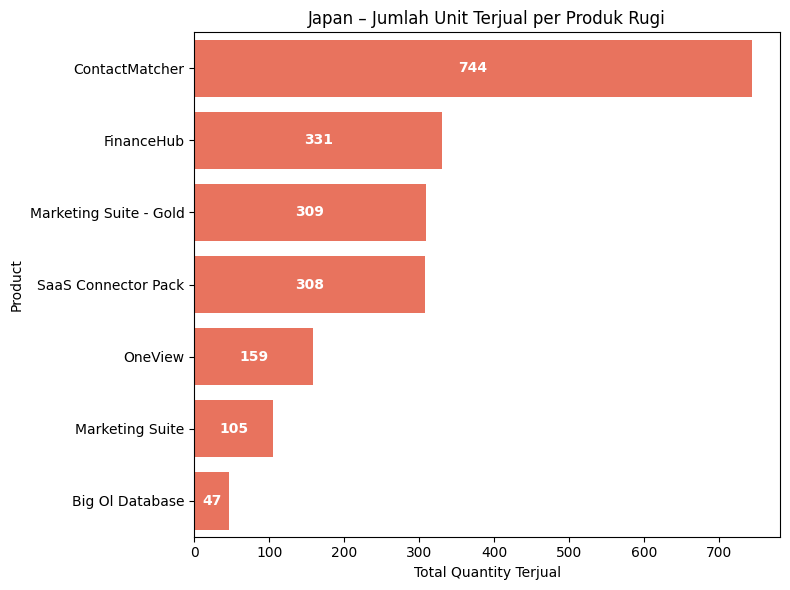

In [70]:
# --- Data: jumlah unit (Quantity) per produk dengan total profit negatif ---
negative_products_qty = (
    df_japan.groupby('Product', as_index=False)
            .agg(Total_Profit=('Profit','sum'),
                 Total_Quantity=('Quantity','sum'))
            .query('Total_Profit < 0')        # hanya produk yang rugi
            .sort_values('Total_Quantity', ascending=False)
)

# --- Visualisasi Horizontal Bar ---
plt.figure(figsize=(8,6))
sns.barplot(
    y='Product', x='Total_Quantity',
    data=negative_products_qty, color='tomato'
)
plt.title('Japan – Jumlah Unit Terjual per Produk Rugi')
plt.xlabel('Total Quantity Terjual')
plt.ylabel('Product')

# Tambahkan anotasi di dalam batang
for p in plt.gca().patches:
    plt.gca().text(
        p.get_width()/2, p.get_y() + p.get_height()/2,
        int(p.get_width()), ha='center', va='center', color='white', fontweight='bold'
    )

plt.tight_layout()
plt.show()


#### Definisi Produk yang menghasilkan Profit Negatif pada AWS SaaS Sales

- **Contact Matcher**  
  Layanan untuk mencocokkan, membersihkan, dan mengelola data kontak pelanggan secara otomatis guna meningkatkan akurasi kampanye penjualan dan pemasaran.

- **OneView**  
  Dashboard terpadu yang menyajikan tampilan menyeluruh atas data penjualan, pelanggan, dan performa bisnis untuk memudahkan analisis dan pengambilan keputusan.

- **SaaS Connector Pack**  
  Paket konektor siap pakai yang menghubungkan aplikasi SaaS lain (CRM, marketing tools, dsb.) agar data dapat disinkronkan secara real-time.

- **Big Ol Database**  
  Basis data skala besar yang andal dan terkelola untuk menyimpan, memproses, dan menganalisis data penjualan dalam volume sangat tinggi.

- **Marketing Suite**  
  Solusi lengkap untuk manajemen pemasaran digital—termasuk automasi email, kampanye, dan pelacakan kinerja—untuk meningkatkan konversi penjualan.

- **Finance Hub**  
  Platform keuangan terpadu yang mengelola laporan pendapatan, arus kas, dan analisis profitabilitas dalam satu sistem.

- **Marketing Suite – Gold**  
  Versi premium dari Marketing Suite dengan fitur lanjutan (misalnya segmentasi mendalam, personalisasi AI, dan dukungan prioritas) untuk kebutuhan pemasaran skala besar.


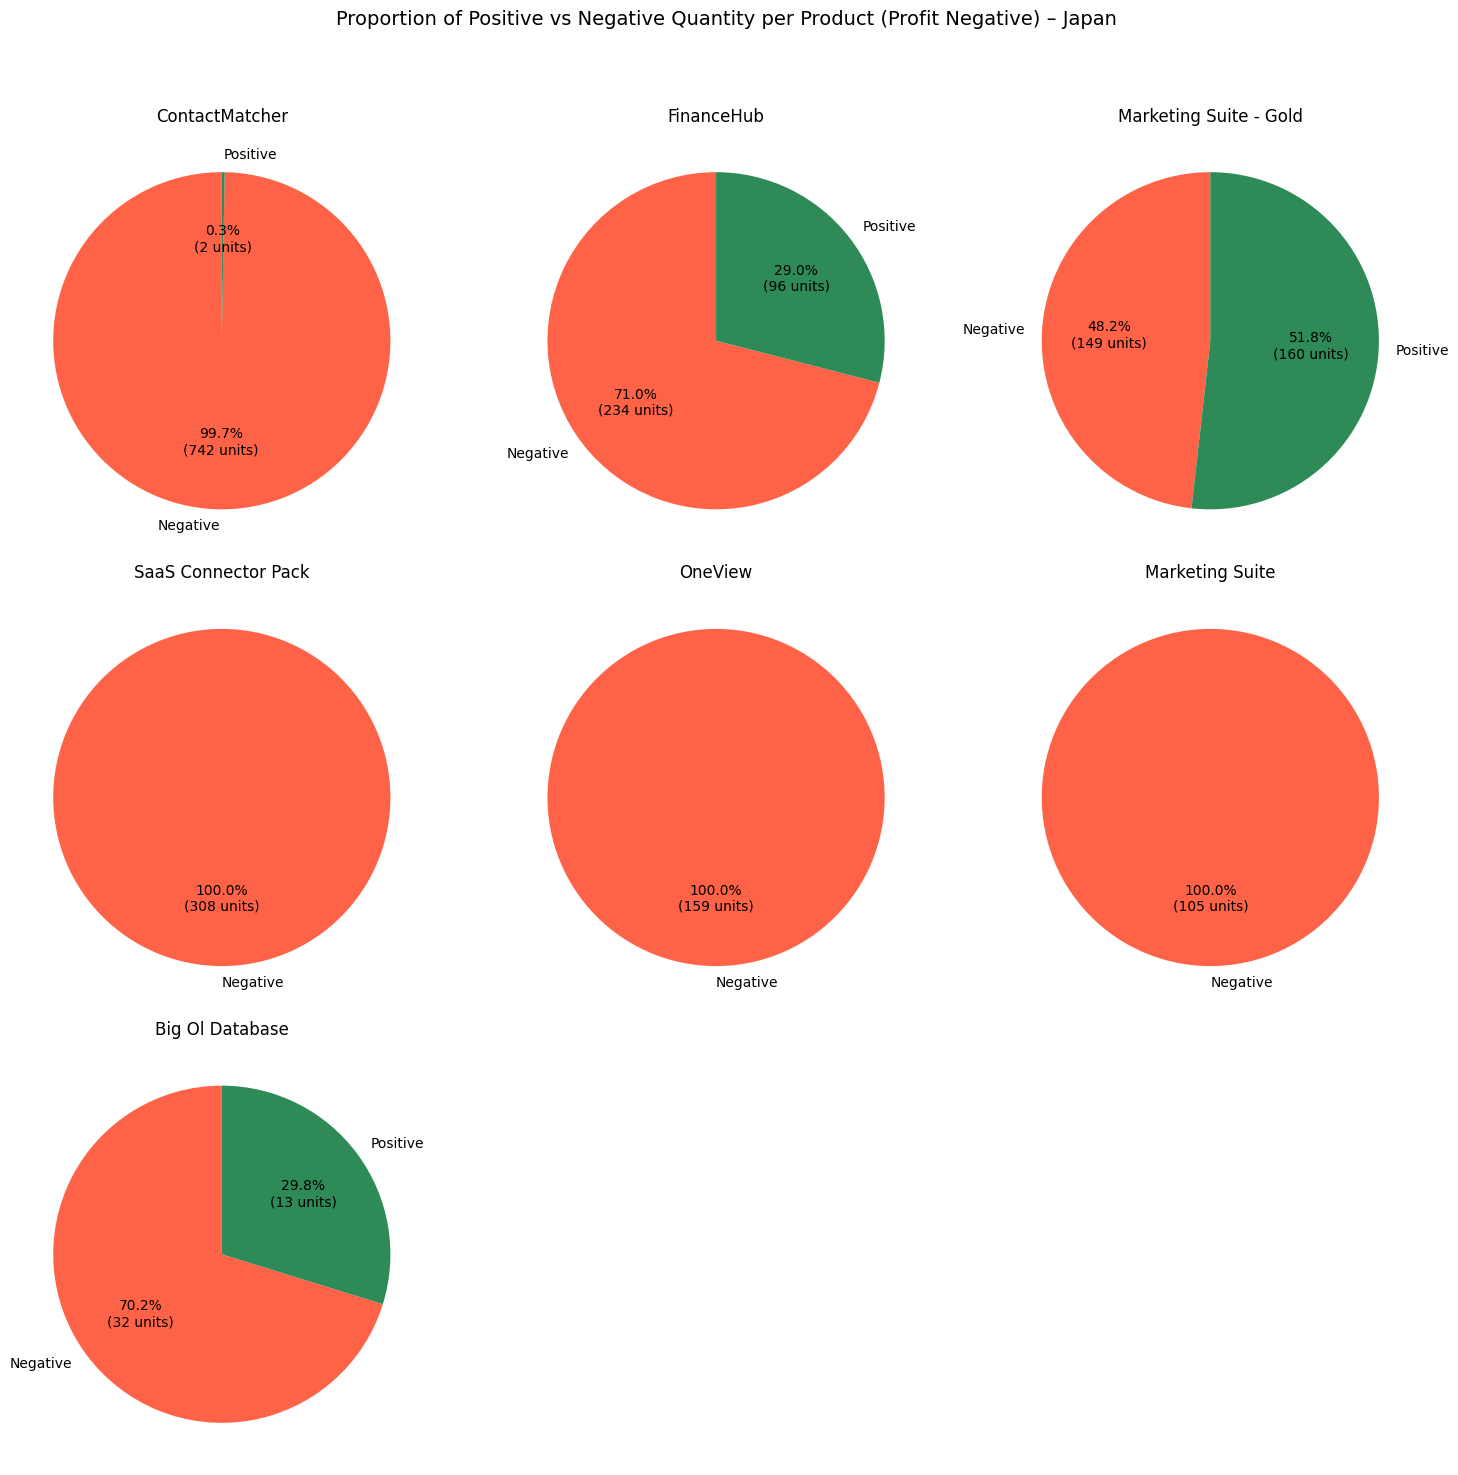

In [71]:
import matplotlib.pyplot as plt

# --- Data: Jumlah unit (Quantity) per produk dengan total profit negatif ---
negative_products_qty = (
    df_japan.groupby('Product', as_index=False)
            .agg(Total_Profit=('Profit', 'sum'),
                 Total_Quantity=('Quantity', 'sum'))
            .query('Total_Profit < 0')  # Hanya produk yang rugi
            .sort_values('Total_Quantity', ascending=False)
)

# --- Data: Proporsi Quantity Positif vs Negatif per Produk ---
qty_by_profit_status = (
    df_japan[df_japan['Product'].isin(negative_products_qty['Product'])]
    .groupby(['Product', 'Profit_Status'], as_index=False)['Quantity']
    .sum()
)

# --- Tentukan jumlah baris dan kolom untuk subplot (3 pie chart per baris) ---
ncols = 3  # Jumlah kolom
nrows = (len(negative_products_qty) + ncols - 1) // ncols  # Menyesuaikan baris agar cukup

# --- Visualisasi: Pie Chart Proporsi Quantity Positif vs Negatif per Produk ---
fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))

# Rata-rata 1 baris = 3 pie, pastikan axes menjadi iterable
axes = axes.flatten()

for i, product in enumerate(negative_products_qty['Product']):
    subset = qty_by_profit_status[qty_by_profit_status['Product'] == product]
    axes[i].pie(
        subset['Quantity'],
        labels=subset['Profit_Status'],
        autopct=lambda p: f'{p:.1f}%\n({int(p * subset["Quantity"].sum() / 100)} units)',
        startangle=90,
        colors=['tomato', 'seagreen']  # Merah untuk negatif, hijau untuk positif
    )
    axes[i].set_title(product, fontsize=12)

# Menghapus subplot yang kosong
for j in range(i + 1, len(axes)):  # Hapus sumbu subplot yang tidak digunakan
    fig.delaxes(axes[j])

# Menambahkan judul utama
plt.suptitle("Proportion of Positive vs Negative Quantity per Product (Profit Negative) – Japan", fontsize=14)

# Menyusun layout agar tidak saling tumpang tindih
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Memberikan ruang untuk judul utama
plt.show()


#### Wawasan dari Visualisasi

- **Produk dengan 100% Penjualan Negatif:**
  - **SaaS Connector Pack**: Semua unit dari produk ini menunjukkan status profit negatif (100%). Hal ini menunjukkan bahwa produk ini sangat kurang performanya dan mungkin memerlukan perombakan strategi atau evaluasi ulang.
  - **OneView**: Semua unit dari produk ini juga menunjukkan profit negatif (100%), menandakan bahwa produk ini sepenuhnya tidak menguntungkan dan memerlukan perhatian segera untuk memperbaiki kinerjanya.
  - **Marketing Suite**: Sama halnya, produk ini juga menunjukkan 100% profit negatif, yang menunjukkan bahwa produk ini tidak memberikan hasil yang diinginkan di pasar.

- **Produk dengan Penjualan Positif**:
  - **FinanceHub**, **Marketing Suite - Gold**, dan **Big Ol Database** menghasilkan profit positif meskipun ada unit dengan profit negatif. Fokus pada peningkatan kinerja unit yang negatif dapat meningkatkan profit secara keseluruhan.

- **Kinerja Penjualan yang Membutuhkan Perhatian:**
  - **Produk-produk seperti SaaS Connector Pack, OneView, dan Marketing Suite**, yang menunjukkan 100% penjualan negatif, perlu mendapatkan perhatian serius dari tim manajemen. Penurunan performa yang total ini bisa disebabkan oleh banyak faktor, seperti masalah dalam strategi pemasaran, kualitas produk, atau kesesuaian dengan kebutuhan pasar.
  - Untuk **FinanceHub** dan **Big Ol Database**, yang meskipun menunjukkan mayoritas penjualan negatif, masih ada sebagian unit yang menunjukkan profit positif (29% untuk FinanceHub dan 29.8% untuk Big Ol Database). Produk-produk ini menunjukkan potensi untuk perbaikan dan bisa menjadi fokus untuk upaya peningkatan.
  - Fokus perbaikan harus diberikan kepada produk yang menunjukkan **penurunan total** seperti SaaS Connector Pack dan OneView, karena mereka menunjukkan **kegagalan total di seluruh unit** dan membutuhkan evaluasi mendalam untuk menemukan akar masalah dan solusi yang tepat.

*Wawasan ini menyoroti pentingnya memberikan perhatian lebih kepada produk dengan penjualan 100% negatif, seperti **SaaS Connector Pack, OneView, dan Marketing Suite**, yang jelas membutuhkan strategi baru untuk memperbaiki kinerjanya. Penurunan total dalam penjualan tersebut memerlukan perhatian langsung dan perbaikan yang lebih mendalam.*

---
## **Australia**

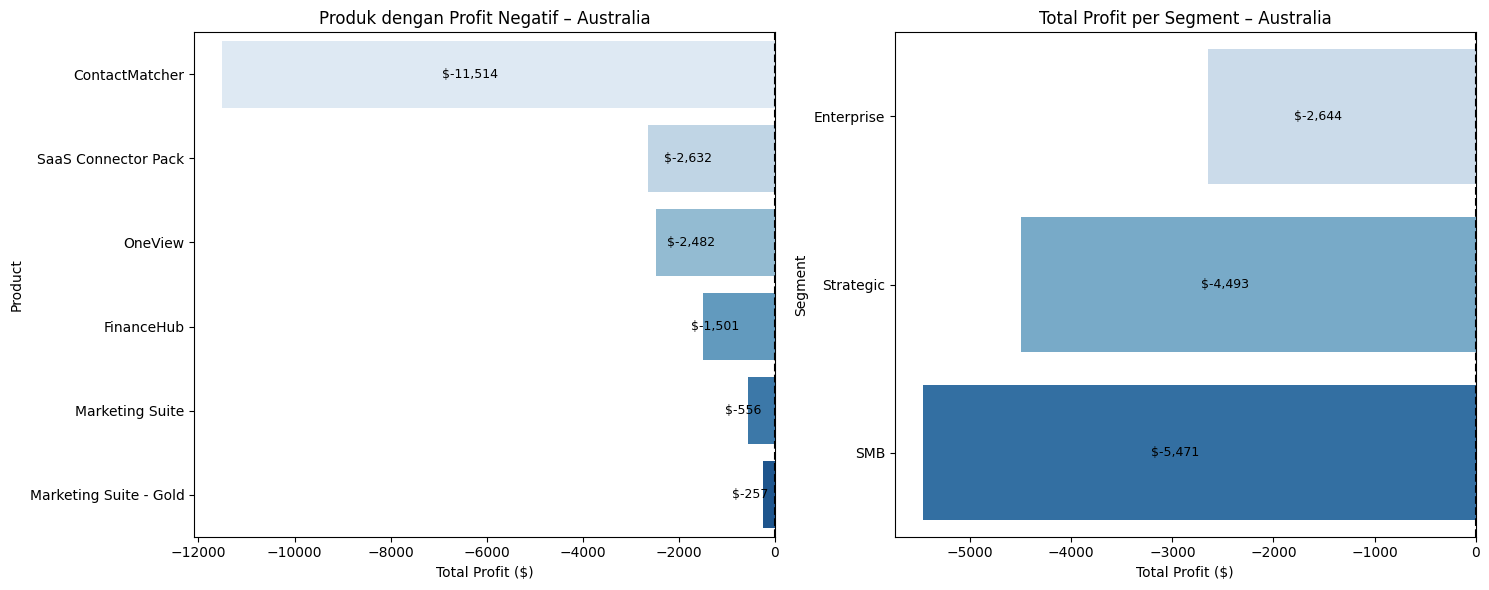

In [72]:
# === Filter Data untuk Australia ===
df_aus = df[
    (df['Region'] == 'APJ') &
    (df['Subregion'] == 'ANZ') &
    (df['Country'] == 'Australia')
].copy()

# === Produk dengan Total Profit Terendah (Negatif) ===
top7_aus_loss = (
    df_aus.groupby('Product', as_index=False)
           .agg(Total_Profit=('Profit','sum'))
           .sort_values('Total_Profit')
           .head(6)
)

# === Total Profit per Segment ===
segment_profit_aus = (
    df_aus.groupby('Segment', as_index=False)
          .agg(Total_Profit=('Profit','sum'))
          .sort_values('Total_Profit', ascending=False)
)

# === Visualisasi ===
fig, axes = plt.subplots(1, 2, figsize=(15,6), sharex=False)

# --- Produk dengan Profit Negatif Tertinggi – Australia ---
sns.barplot(
    x='Total_Profit', y='Product',
    data=top7_aus_loss, palette='Blues', ax=axes[0]
)
axes[0].axvline(0, color='black', linestyle='--')
axes[0].set_title("Produk dengan Profit Negatif – Australia")
axes[0].set_xlabel("Total Profit ($)")

# Anotasi nilai di batang
for i, (val, label) in enumerate(zip(top7_aus_loss['Total_Profit'],
                                     top7_aus_loss['Product'])):
    axes[0].text(
        x=val/2,
        y=i,
        s=f"${val:,.0f}",
        va='center',
        ha='left' if val >= 0 else 'right',
        color='black',
        fontsize=9
    )

# --- Chart 2: Total Profit per Segment – Australia ---
sns.barplot(
    x='Total_Profit', y='Segment',
    data=segment_profit_aus, palette='Blues', ax=axes[1]
)
axes[1].axvline(0, color='black', linestyle='--')
axes[1].set_title("Total Profit per Segment – Australia")
axes[1].set_xlabel("Total Profit ($)")

# Anotasi nilai di batang
for i, (val, label) in enumerate(zip(segment_profit_aus['Total_Profit'],
                                     segment_profit_aus['Segment'])):
    axes[1].text(
        x=val/2,
        y=i,
        s=f"${val:,.0f}",
        va='center',
        ha='left' if val >= 0 else 'right',
        color='black',
        fontsize=9
    )

plt.tight_layout()
plt.show()


#### Insight dari Visualisasi Profit - Australia

1. **Produk dengan Profit Negatif**:
   - Produk dengan profit negatif tertinggi adalah **ContactMatcher** dengan kerugian **\$11.514**.
   - Produk lain yang mengalami kerugian signifikan termasuk **SaaS Connector Pack** dan **OneView**, dengan kerugian masing-masing **\$2.632** dan **$2.482**.

2. **Profit per Segmen**:
   - Segmen **Enterprise** melaporkan profit negatif sebesar **\$2.644**.
   - Segmen **Strategic** menunjukkan kerugian yang lebih besar sebesar **\$4.493**, sementara segmen **SMB** mengalami kerugian terbesar yaitu **$5.471**.
   
*Visualisasi ini menunjukkan bahwa kerugian profit terjadi di semua kategori produk dan segmen, dengan segmen **SMB** dan **Strategic** menghadapi kerugian terbesar. Hal ini menunjukkan perlunya perubahan strategi atau peninjauan kembali di area tersebut untuk mengurangi kerugian dan meningkatkan profitabilitas.*

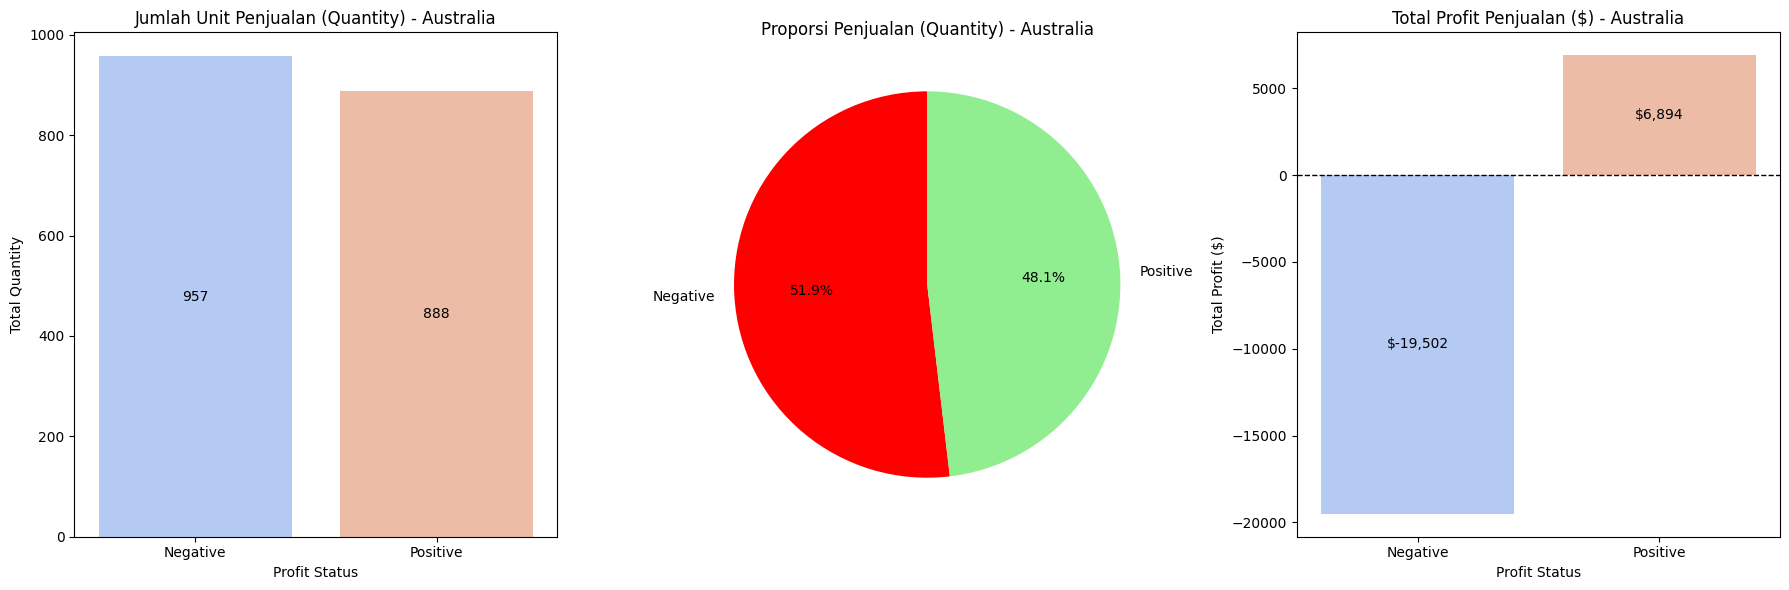

In [73]:
# --- Kategori Profit (Positive / Negative) ---
df_aus['Profit_Status'] = df_aus['Profit'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
order = ['Negative', 'Positive']  # supaya warna & urutan konsisten

# --- Jumlah unit (Quantity) per Profit_Status ---
sum_qty_status = (
    df_aus.groupby('Profit_Status', as_index=False)['Quantity'].sum()
            .set_index('Profit_Status').reindex(order).reset_index()
            .rename(columns={'Quantity': 'Total_Quantity'})
)

# --- Proporsi unit (berdasar Quantity) ---
total_qty = sum_qty_status['Total_Quantity'].sum()
prop_qty_status = sum_qty_status.assign(Proportion = sum_qty_status['Total_Quantity'] / total_qty)

# --- Total (sum) profit per Profit_Status ---
sum_profit_status = (
    df_aus.groupby('Profit_Status', as_index=False)['Profit'].sum()
            .set_index('Profit_Status').reindex(order).reset_index()
            .rename(columns={'Profit': 'Total_Profit'})
)

# --- Visualisasi: 3 Subplot ---
fig, axes = plt.subplots(1, 3, figsize=(18,6))

# 1) Bar: Jumlah UNIT (Quantity) per Profit_Status
sns.barplot(
    x='Profit_Status', y='Total_Quantity',
    data=sum_qty_status, order=order,
    palette='coolwarm', ax=axes[0]
)
axes[0].set_title('Jumlah Unit Penjualan (Quantity) - Australia')
axes[0].set_xlabel('Profit Status'); axes[0].set_ylabel('Total Quantity')
for p in axes[0].patches:
    axes[0].text(
        p.get_x() + p.get_width()/2, p.get_height()/2,
        f"{int(p.get_height()):,}",
        ha='center', va='center'
    )

# 2) Pie: Proporsi UNIT (Quantity) per Profit_Status
axes[1].pie(
    prop_qty_status['Proportion'],
    labels=prop_qty_status['Profit_Status'],
    autopct='%1.1f%%',
    colors=['red', 'lightgreen'],
    startangle=90
)
axes[1].set_title('Proporsi Penjualan (Quantity) - Australia')

# 3) Bar: Total PROFIT per Profit_Status
sns.barplot(
    x='Profit_Status', y='Total_Profit',
    data=sum_profit_status, order=order,
    palette='coolwarm', ax=axes[2]
)
axes[2].axhline(0, color='black', linestyle='--', linewidth=1)
axes[2].set_title('Total Profit Penjualan ($) - Australia')
axes[2].set_xlabel('Profit Status'); axes[2].set_ylabel('Total Profit ($)')
for p in axes[2].patches:
    axes[2].text(
        p.get_x() + p.get_width()/2, p.get_height()/2,
        f"${p.get_height():,.0f}",
        ha='center', va='center'
    )

plt.tight_layout()
plt.show()

### Insight dari Visualisasi Penjualan (Australia)

- Meskipun jumlah unit terjual dengan status profit negatif lebih tinggi (957 unit dibandingkan 888 unit untuk profit positif), proporsi total profit negatif jauh lebih besar, yaitu -\$19,502, dibandingkan dengan profit positif yang hanya sebesar +$6,894.
  
- Sekitar 51,9% penjualan menghasilkan profit negatif, sementara 48,1% penjualan menghasilkan profit positif. Hal ini menunjukkan bahwa meskipun ada lebih banyak unit terjual dengan kerugian, penjualan dengan profit positif memberikan kontribusi yang lebih besar pada total profit.

- Penjualan dengan status profit negatif masih mendominasi dari sisi volume, namun keuntungan bersih lebih banyak berasal dari penjualan dengan profit positif.


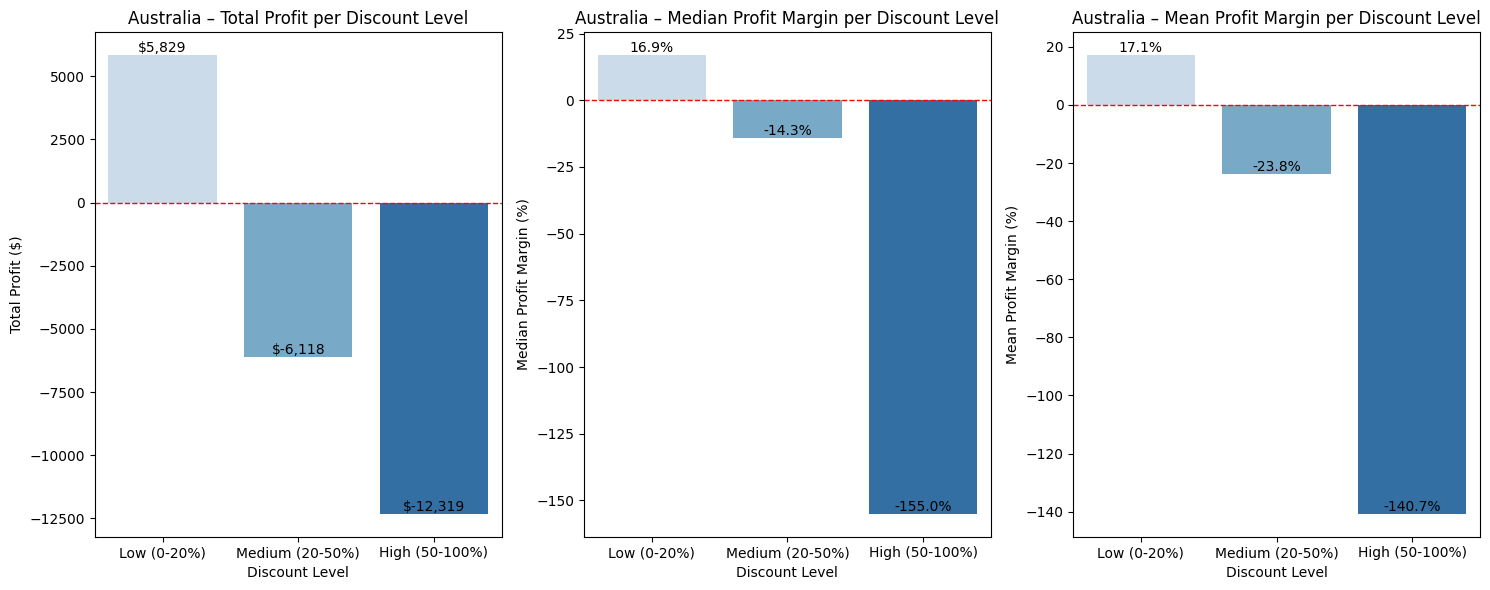

In [75]:
# --- Ringkasan per Discount Level (khusus Australia) ---
total_profit_aus = (
    df_aus.groupby('Discount_Level')['Profit']
          .sum()
          .reindex(labels)
          .reset_index()
)

median_margin_aus = (
    df_aus.groupby('Discount_Level')['Profit Margin']
          .median()
          .reindex(labels)
          .reset_index()
)

mean_margin_aus = (
    df_aus.groupby('Discount_Level')['Profit Margin']
          .mean()
          .reindex(labels)
          .reset_index()
)

# --- Visualisasi ---
fig, axes = plt.subplots(1, 3, figsize=(15,6))

# Panel 1: Total Profit per Discount Level
sns.barplot(x='Discount_Level', y='Profit', hue='Discount_Level',
            data=total_profit_aus, ax=axes[0], palette='Blues')
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].set_title("Australia – Total Profit per Discount Level")
axes[0].set_xlabel("Discount Level")
axes[0].set_ylabel("Total Profit ($)")

for p in axes[0].patches:
    axes[0].annotate(f"${p.get_height():,.0f}",
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

# Panel 2: Median Profit Margin per Discount Level
sns.barplot(x='Discount_Level', y='Profit Margin', hue='Discount_Level',
            data=median_margin_aus, ax=axes[1], palette='Blues')
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].set_title("Australia – Median Profit Margin per Discount Level")
axes[1].set_xlabel("Discount Level")
axes[1].set_ylabel("Median Profit Margin (%)")

for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height():.1f}%",
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

# Panel 3: Mean Profit Margin per Discount Level
sns.barplot(x='Discount_Level', y='Profit Margin', hue='Discount_Level',
            data=mean_margin_aus, ax=axes[2], palette='Blues')
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)
axes[2].set_title("Australia – Mean Profit Margin per Discount Level")
axes[2].set_xlabel("Discount Level")
axes[2].set_ylabel("Mean Profit Margin (%)")

for p in axes[2].patches:
    axes[2].annotate(f"{p.get_height():.1f}%",
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


#### Insight dari Grafik

- **Total Profit**:
  - Tingkat diskon "Rendah" (0-20%) menghasilkan profit total positif, sementara "Tinggi" (50-100%) menunjukkan kerugian terbesar.

- **Margin Profit Median**:
  - Tingkat diskon "Rendah" memiliki margin profit median positif, sedangkan "Tinggi" menunjukkan kerugian median yang sangat besar.

- **Margin Profit Rata-Rata**:
  - Diskon "Rendah" memberikan margin profit rata-rata positif, sementara "Tinggi" mencatatkan margin profit rata-rata yang sangat negatif.

- Meningkatkan tingkat diskon secara signifikan memengaruhi profitabilitas, dengan tingkat diskon yang lebih tinggi mengarah pada kerugian besar.
- Tingkat diskon "Tinggi" memberikan dampak negatif terhadap total profit dan margin profit, yang menunjukkan perlunya pengendalian lebih baik terhadap strategi pemberian diskon.

---

### **Analisis Segment Customer Australia**

- **Enterprise**  
  Perusahaan besar dengan skala global atau nasional, memiliki kebutuhan kompleks, volume transaksi tinggi, dan memerlukan solusi yang dapat diintegrasikan lintas divisi serta mendukung kustomisasi mendalam.

- **Strategic**  
  Perusahaan menengah hingga besar yang menjadi **akun prioritas** (key accounts) karena potensi pertumbuhan dan nilai strategisnya tinggi. Biasanya membutuhkan solusi yang fleksibel dan dukungan khusus.

- **SMB (Small and Medium Business)**  
  Usaha kecil dan menengah dengan tim serta anggaran lebih terbatas. Fokus pada solusi yang **cepat diimplementasikan, efisien, dan hemat biaya**, namun tetap dapat berkembang seiring pertumbuhan bisnis.


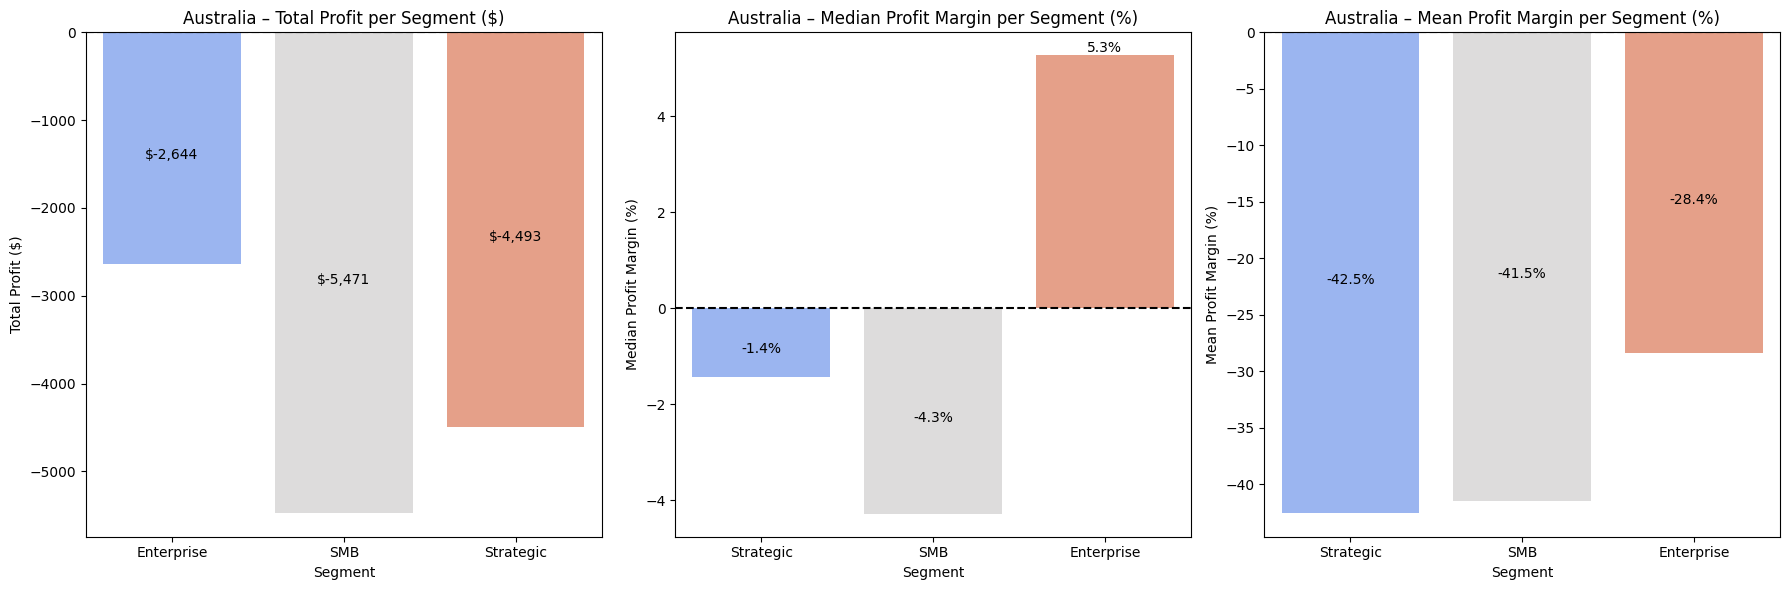

In [76]:
# --- Data: Profit Margin per Segment ---
segment_margin_aus = (
    df_aus.groupby('Segment', as_index=False)
          .apply(lambda g: pd.Series({
              'Median_Profit_Margin': (g['Profit']/g['Sales']).median()*100,
              'Mean_Profit_Margin':   (g['Profit']/g['Sales']).mean()*100
          }))
          .sort_values('Mean_Profit_Margin')
)

# --- Data: Total Profit per Segment ---
total_profit_segment_aus = (
    df_aus.groupby('Segment', as_index=False)['Profit']
          .sum()
          .rename(columns={'Profit': 'Total_Profit'})
)

# --- Visualisasi: 3 Bar Top-Bottom (Segment di X-axis) ---
fig, axes = plt.subplots(1, 3, figsize=(18,6))

# === Total Profit per Segment ===
sns.barplot(
    x='Segment', y='Total_Profit',
    data=total_profit_segment_aus, palette='coolwarm', ax=axes[0]
)
axes[0].axhline(0, color='black', linestyle='--')
axes[0].set_title('Australia – Total Profit per Segment ($)')
axes[0].set_xlabel('Segment')
axes[0].set_ylabel('Total Profit ($)')

# Anotasi di atas batang
for p in axes[0].patches:
    axes[0].text(
        p.get_x() + p.get_width()/2,
        p.get_height()/2 if p.get_height() < 0 else p.get_height(),
        f"${p.get_height():,.0f}",
        ha='center',
        va='bottom' if p.get_height() >= 0 else 'top'
    )

# === Median Profit Margin ===
sns.barplot(
    x='Segment', y='Median_Profit_Margin',
    data=segment_margin_aus, palette='coolwarm', ax=axes[1]
)
axes[1].axhline(0, color='black', linestyle='--')
axes[1].set_title('Australia – Median Profit Margin per Segment (%)')
axes[1].set_xlabel('Segment')
axes[1].set_ylabel('Median Profit Margin (%)')

# Anotasi di atas batang
for p in axes[1].patches:
    axes[1].text(
        p.get_x() + p.get_width()/2,
        p.get_height()/2 if p.get_height() < 0 else p.get_height(),
        f"{p.get_height():.1f}%",
        ha='center',
        va='bottom' if p.get_height() >= 0 else 'top'
    )

# === Mean Profit Margin ===
sns.barplot(
    x='Segment', y='Mean_Profit_Margin',
    data=segment_margin_aus, palette='coolwarm', ax=axes[2]
)
axes[2].axhline(0, color='black', linestyle='--')
axes[2].set_title('Australia – Mean Profit Margin per Segment (%)')
axes[2].set_xlabel('Segment')
axes[2].set_ylabel('Mean Profit Margin (%)')

# Anotasi di atas batang
for p in axes[2].patches:
    axes[2].text(
        p.get_x() + p.get_width()/2,
        p.get_height()/2 if p.get_height() < 0 else p.get_height(),
        f"{p.get_height():.1f}%",
        ha='center',
        va='bottom' if p.get_height() >= 0 else 'top'
    )

plt.tight_layout()
plt.show()

#### Insight Analisis Profit per Segment di Australia

- **Total Profit per Segment**:
  - Segment **Enterprise** memiliki profit total positif sebesar **\$2,644**, sementara **SMB** dan **Strategic** mencatatkan kerugian masing-masing **-\$5,471** dan **-$4,493**.
  
- **Median Profit Margin per Segment**:
  - Segment **Strategic** menunjukkan profit margin median negatif sebesar **-1.4%**, sedangkan **SMB** memiliki **-4.3%**, dan **Enterprise** mencatatkan profit margin positif **5.3%**.

- **Mean Profit Margin per Segment**:
  - Segment **Enterprise** menunjukkan kerugian terbesar dengan **-42.5%**, diikuti oleh **SMB** dengan **-41.5%**, dan **Strategic** yang juga mengalami kerugian **-28.4%**.

#### Kesimpulan
- **Enterprise** merupakan segment yang lebih menguntungkan dalam hal profit total dan margin median, meskipun kerugian besar masih terjadi pada margin rata-rata.
- **SMB** dan **Strategic** masing-masing menunjukkan hasil yang kurang menguntungkan dengan margin negatif di hampir semua metrik yang dianalisis.

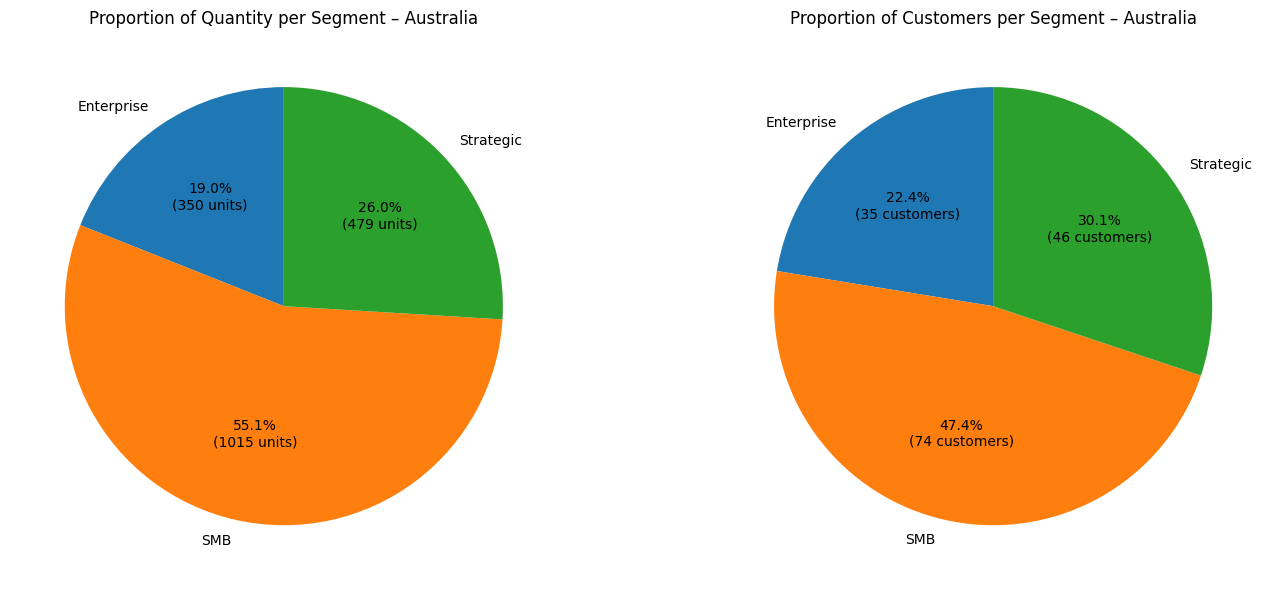

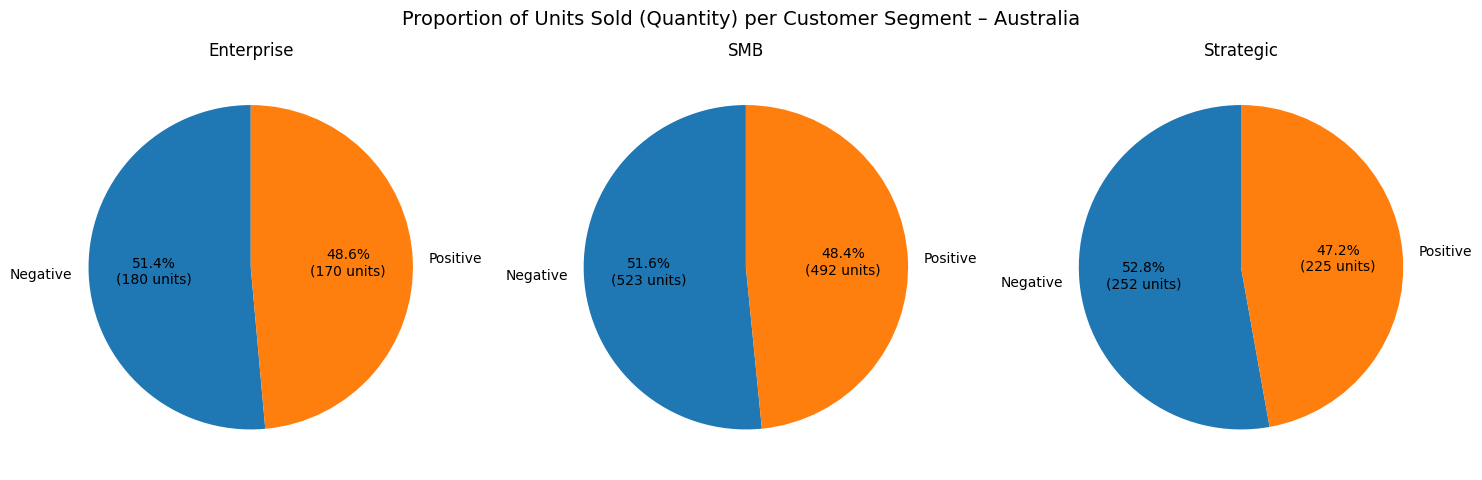

In [78]:
# --- Data: Quantity per Segment di Australia ---
qty_segment_aus = (
    df_aus.groupby(['Segment'], as_index=False)['Quantity']
          .sum()
)

# --- Data: Jumlah Customer per Segment di Australia ---
customer_segment_aus = (
    df_aus.groupby(['Segment'], as_index=False)['Customer ID']
          .nunique()
          .rename(columns={'Customer ID': 'Customer_Count'})
)

# --- Visualisasi: Pie Chart Proportion Quantity & Customer per Segment ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- 1. Pie Chart Proportion Quantity per Segment ---
axes[0].pie(
    qty_segment_aus['Quantity'],
    labels=qty_segment_aus['Segment'],
    autopct=lambda p: f'{p:.1f}%\n({int(p * qty_segment_aus["Quantity"].sum() / 100)} units)',
    startangle=90
)
axes[0].set_title("Proportion of Quantity per Segment – Australia")

# --- 2. Pie Chart Proportion Customer Count per Segment ---
axes[1].pie(
    customer_segment_aus['Customer_Count'],
    labels=customer_segment_aus['Segment'],
    autopct=lambda p: f'{p:.1f}%\n({int(p * customer_segment_aus["Customer_Count"].sum() / 100)} customers)',
    startangle=90
)
axes[1].set_title("Proportion of Customers per Segment – Australia")

# Menampilkan plot
plt.tight_layout()
plt.show()

# --- Data: Quantity Positif dan Negatif per Segment di Australia ---
qty_segment_aus = (
    df_aus.groupby(['Segment', 'Profit_Status'], as_index=False)['Quantity']
          .sum()
)

# --- Visualisasi: Pie Chart Proportion Positif vs Negatif Quantity per Segment ---
segments = qty_segment_aus['Segment'].unique()
fig, axes = plt.subplots(1, len(segments), figsize=(5 * len(segments), 5))

if len(segments) == 1:
    axes = [axes]  # agar iterable walau hanya 1 segment

# Loop untuk masing-masing segment
for ax, seg in zip(axes, segments):
    subset = qty_segment_aus[qty_segment_aus['Segment'] == seg]

    # Pie chart untuk quantity positif vs negatif per segment
    ax.pie(
        subset['Quantity'],
        labels=subset['Profit_Status'],
        autopct=lambda p: f'{p:.1f}%\n({int(p * subset["Quantity"].sum() / 100)} units)',
        startangle=90
    )
    ax.set_title(f"{seg}", fontsize=12)

# Menambahkan judul utama
plt.suptitle("Proportion of Units Sold (Quantity) per Customer Segment – Australia", fontsize=14)
plt.tight_layout()
plt.show()


#### Analisis Insight:

1. **Proporsi Kuantitas per Segmen:**
   - **SMB**: 55,1% (1015 unit) - Dominasi terbanyak.
   - **Strategis**: 26% (479 unit) - Permintaan cukup signifikan.
   - **Enterprise**: 19% (350 unit) - Terendah.

2. **Proporsi Pelanggan per Segmen:**
   - **SMB**: 47,4% (74 pelanggan) - Jumlah pelanggan terbesar.
   - **Strategis**: 30,1% (46 pelanggan) - Pelanggan lebih sedikit namun kontribusi unit tinggi.
   - **Enterprise**: 22,4% (35 pelanggan) - Pelanggan terkecil namun kontribusi unit cukup besar.

3. **Kuantitas Terjual Berdasarkan Status Profit:**
   - Setiap segmen (Enterprise, SMB, Strategis) menunjukkan keseimbangan antara **negatif** dan **positif**, dengan kecenderungan lebih banyak unit dengan status negatif.

- **SMB** dominan dalam volume penjualan dan pelanggan, namun ada risiko pada profitabilitas.
- Fokus perlu diarahkan pada **Strategis** dan **Enterprise** untuk meningkatkan profitabilitas dan penjualan.


---
### **Analisis Produk dengan Profit Negatif - Japan**

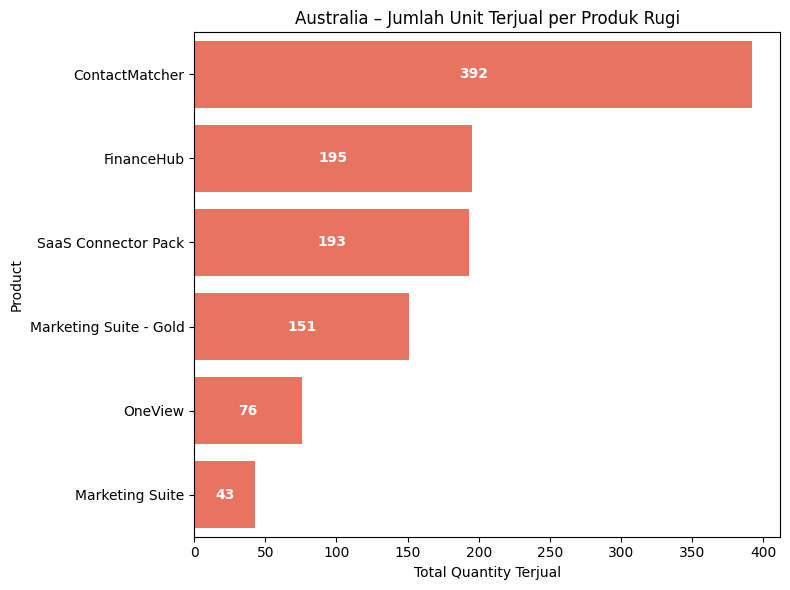

In [79]:
# --- Data: jumlah unit (Quantity) per produk dengan total profit negatif di Australia ---
negative_products_qty_aus = (
    df_aus.groupby('Product', as_index=False)
          .agg(Total_Profit=('Profit', 'sum'),
               Total_Quantity=('Quantity', 'sum'))
          .query('Total_Profit < 0')  # hanya produk yang rugi
          .sort_values('Total_Quantity', ascending=False)
)

# --- Visualisasi Horizontal Bar ---
plt.figure(figsize=(8, 6))
sns.barplot(
    y='Product', x='Total_Quantity',
    data=negative_products_qty_aus, color='tomato'
)
plt.title('Australia – Jumlah Unit Terjual per Produk Rugi')
plt.xlabel('Total Quantity Terjual')
plt.ylabel('Product')

# Tambahkan anotasi di dalam batang
for p in plt.gca().patches:
    plt.gca().text(
        p.get_width()/2, p.get_y() + p.get_height()/2,
        int(p.get_width()), ha='center', va='center', color='white', fontweight='bold'
    )

plt.tight_layout()
plt.show()


#### Definisi Produk yang menghasilkan Profit Negatif pada AWS SaaS Sales

- **Contact Matcher**  
  Layanan untuk mencocokkan, membersihkan, dan mengelola data kontak pelanggan secara otomatis guna meningkatkan akurasi kampanye penjualan dan pemasaran.

- **OneView**  
  Dashboard terpadu yang menyajikan tampilan menyeluruh atas data penjualan, pelanggan, dan performa bisnis untuk memudahkan analisis dan pengambilan keputusan.

- **SaaS Connector Pack**  
  Paket konektor siap pakai yang menghubungkan aplikasi SaaS lain (CRM, marketing tools, dsb.) agar data dapat disinkronkan secara real-time.

- **Marketing Suite**  
  Solusi lengkap untuk manajemen pemasaran digital—termasuk automasi email, kampanye, dan pelacakan kinerja—untuk meningkatkan konversi penjualan.

- **Finance Hub**  
  Platform keuangan terpadu yang mengelola laporan pendapatan, arus kas, dan analisis profitabilitas dalam satu sistem.

- **Marketing Suite – Gold**  
  Versi premium dari Marketing Suite dengan fitur lanjutan (misalnya segmentasi mendalam, personalisasi AI, dan dukungan prioritas) untuk kebutuhan pemasaran skala besar.


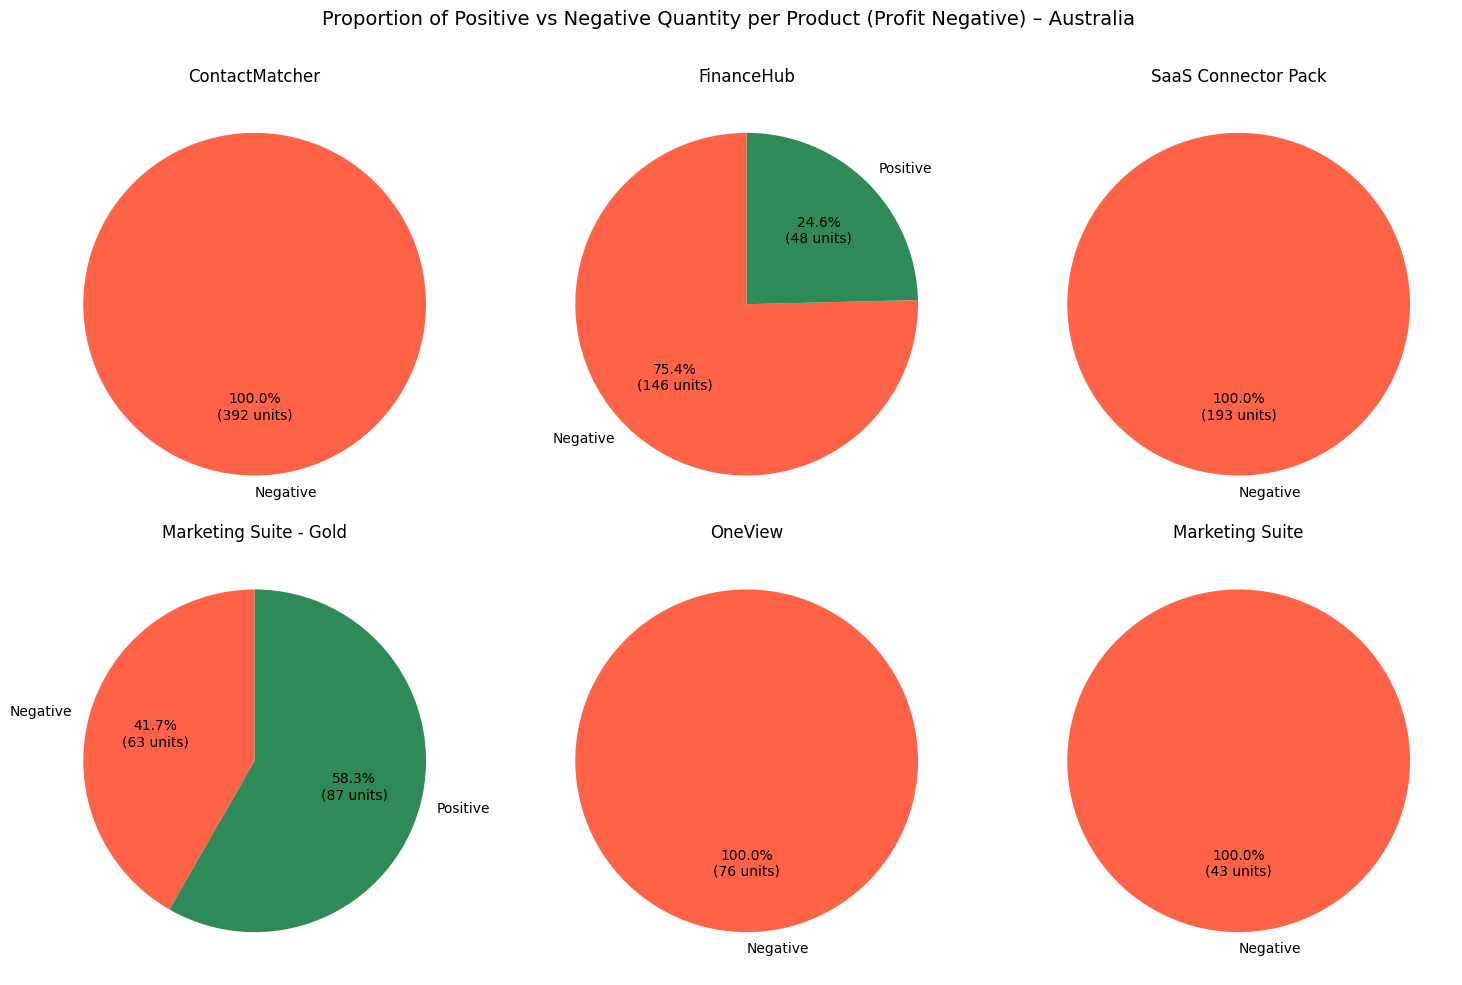

In [80]:
# --- Data: Jumlah unit (Quantity) per produk dengan total profit negatif di Australia ---
negative_products_qty_aus = (
    df_aus.groupby('Product', as_index=False)
          .agg(Total_Profit=('Profit', 'sum'),
               Total_Quantity=('Quantity', 'sum'))
          .query('Total_Profit < 0')  # Hanya produk yang rugi
          .sort_values('Total_Quantity', ascending=False)
)

# --- Data: Proporsi Quantity Positif vs Negatif per Produk ---
qty_by_profit_status_aus = (
    df_aus[df_aus['Product'].isin(negative_products_qty_aus['Product'])]
    .groupby(['Product', 'Profit_Status'], as_index=False)['Quantity']
    .sum()
)

# --- Tentukan jumlah baris dan kolom untuk subplot (3 pie chart per baris) ---
ncols = 3  # Jumlah kolom
nrows = (len(negative_products_qty_aus) + ncols - 1) // ncols  # Menyesuaikan baris agar cukup

# --- Visualisasi: Pie Chart Proporsi Quantity Positif vs Negatif per Produk ---
fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))

# Rata-rata 1 baris = 3 pie, pastikan axes menjadi iterable
axes = axes.flatten()

for i, product in enumerate(negative_products_qty_aus['Product']):
    subset = qty_by_profit_status_aus[qty_by_profit_status_aus['Product'] == product]
    axes[i].pie(
        subset['Quantity'],
        labels=subset['Profit_Status'],
        autopct=lambda p: f'{p:.1f}%\n({int(p * subset["Quantity"].sum() / 100)} units)',
        startangle=90,
        colors=['tomato', 'seagreen']  # Merah untuk negatif, hijau untuk positif
    )
    axes[i].set_title(product, fontsize=12)

# Menghapus subplot yang kosong
for j in range(i + 1, len(axes)):  # Hapus sumbu subplot yang tidak digunakan
    fig.delaxes(axes[j])

# Menambahkan judul utama
plt.suptitle("Proportion of Positive vs Negative Quantity per Product (Profit Negative) – Australia", fontsize=14)

# Menyusun layout agar tidak saling tumpang tindih
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Memberikan ruang untuk judul utama
plt.show()


#### Insight Analisis Visualisasi Proposi Kuantitas Positif vs Negatif per Produk (Profit Negatif)

1. **ContactMatcher**:
   - Semua unit (392 unit) menunjukkan profit negatif, tanpa ada kontribusi dari unit dengan profit positif. Hal ini menunjukkan bahwa produk ini mengalami kerugian total pada semua unit yang terjual.

2. **FinanceHub**:
   - Sebagian besar unit (75.4% atau 146 unit) mengalami profit negatif, namun sekitar 24.6% (48 unit) menunjukkan profit positif. Ini menunjukkan bahwa meskipun mayoritas produk tidak menguntungkan, masih ada segmen yang berhasil menghasilkan profit.

3. **SaaS Connector Pack**:
   - Semua unit (193 unit) juga mengalami profit negatif, menunjukkan bahwa produk ini tidak memberikan kontribusi positif terhadap profit pada saat ini.

4. **Marketing Suite - Gold**:
   - Unit yang mengalami profit negatif sebanyak 41.7% (63 unit), sementara 58.3% (87 unit) menghasilkan profit positif. Ini menandakan adanya ketidakseimbangan, namun masih ada potensi keuntungan yang cukup besar di antara unit yang positif.

5. **OneView dan Marketing Suite**:
   - Kedua produk ini hanya memiliki unit dengan profit negatif, yaitu 100% dari masing-masing 76 dan 43 unit yang dijual, menunjukkan bahwa produk ini sepenuhnya tidak menguntungkan pada periode ini.

- Produk seperti **ContactMatcher** dan **SaaS Connector Pack** menunjukkan kerugian sepenuhnya, sedangkan produk lain seperti **FinanceHub** dan **Marketing Suite - Gold** menunjukkan adanya potensi profit meskipun sebagian besar unitnya mengalami kerugian.


---

# Kesimpulan Insight

1. **Diskon yang terlalu tinggi menekan profit**
   - Analisis menunjukkan bahwa diskon di atas **20%** secara konsisten terkait dengan profit negatif.  
   - Hal ini terlihat pada scatter plot dan boxplot profit per discount level, baik secara keseluruhan maupun per region.

2. **Wilayah/Subregion kritis**
   - **APJ** adalah region dengan total profit paling rendah dibanding region lain, meskipun masih positif.  
   - Subregion **ANZ** dan **JAPN** menunjukkan **profit negatif**, dengan **Japan dan Australia** sebagai kontributor utama.  

3. **Produk dan segment yang bermasalah**
   - Beberapa **produk** memiliki hampir seluruh transaksi yang menghasilkan profit negatif.  
   - **Segment SMB di Japan** memberikan kontribusi kerugian terbesar, segment lain juga merugi tetapi lebih kecil.  
   - Proporsi transaksi merugi sangat tinggi pada beberapa produk dan segment, menunjukkan ketidakefektifan strategi diskon saat ini.

4. **Polarisasi performa**
   - Segment dan produk tertentu masih menghasilkan profit positif, sedangkan lainnya rugi.  
   - Distribusi ini menunjukkan peluang untuk **memfokuskan diskon secara selektif** agar tidak menekan margin secara keseluruhan.

---

### Rekomendasi Strategis

1. **Strategi Diskon**
   - Batasi diskon maksimum untuk produk atau segment yang menunjukkan risiko kerugian tinggi, misalnya diskon **tidak lebih dari 20%**.  
   - Terapkan **dynamic discounting**, di mana besaran diskon disesuaikan dengan margin historis produk dan segment.  
   - Hindari pemberian diskon merata tanpa memperhitungkan profitabilitas, dan prioritaskan diskon hanya pada transaksi atau pelanggan yang terbukti menguntungkan.

2. **Strategi Produk**
   - Hentikan sementara diskon untuk produk yang **100% transaksinya merugi**.  
   - Tinjau ulang harga pokok, biaya operasional, dan strategi bundling produk tersebut agar margin dapat meningkat.  
   - Identifikasi produk yang memiliki potensi margin tinggi tetapi mendapat diskon berlebihan, lalu sesuaikan kebijakan harga dan promosi.

3. **Strategi Segment Pelanggan**
   - Fokus mitigasi kerugian pada **segment SMB di Japan**, karena segment ini menyumbang kerugian terbesar.  
   - Evaluasi ulang struktur kontrak, minimum order, dan program loyalitas untuk meningkatkan profitabilitas.  
   - Segment lain yang masih menguntungkan tetap dapat menerima diskon, tetapi dengan kontrol yang lebih ketat.

4. **Strategi Region/Subregion**
   - Sesuaikan strategi diskon dan promosi per subregion berdasarkan kinerja profit.  
   - Di subregion JAPN dan ANZ, lebih konservatif dalam pemberian diskon, sementara di wilayah yang profitabilitasnya lebih tinggi, diskon dapat diterapkan dengan batas yang lebih fleksibel.  
   - Implementasikan monitoring per region untuk mengidentifikasi dan menindaklanjuti potensi kerugian dengan cepat.

5. **Monitoring dan Kontrol**
   - Buat dashboard **Profit vs Discount** untuk semua transaksi, produk, dan segment.  
   - Pasang **alert otomatis** untuk produk atau segment yang consistently menghasilkan profit negatif.  
   - Lakukan review berkala untuk menyesuaikan strategi diskon dan harga, sehingga profitabilitas dapat dipertahankan tanpa kehilangan daya saing.

---

**Ringkasan Insight:**  
Analisis menunjukkan bahwa **diskon besar tidak selalu meningkatkan penjualan menguntungkan**, malah menekan profit di beberapa wilayah dan segment. Fokus strategi harus pada **kontrol diskon**, **identifikasi produk/segment berisiko**, **penyesuaian harga per subregion**, dan **monitoring performa secara real-time** untuk memastikan profitabilitas. Pendekatan selektif ini memungkinkan perusahaan **menjaga margin** sekaligus tetap kompetitif di pasar.
